In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
import rdkit.Chem as Chem
import matplotlib.pyplot as plt

In [2]:
df_bznsn=pd.read_csv(r"./Data/Reduction_potential_213BzNSN.csv")

In [3]:
print(df_bznsn.columns)
print(df_bznsn.shape)

Index(['SMILES', 'Ered(V)'], dtype='object')
(1569, 2)


In [4]:
df_bznsn.head()

SMILES  Ered(V)
0   Cc1c2c(cc3nsnc13)N(C)CCN2CCN(C)C     1.27
1       CCN1CCN(CCOC)c2c1cc1nsnc1c2C     1.27
2   CCNc1c2c(cc3nsnc13)N(C)CCN2C(C)C     1.24
3    CCCN1CCN(CC)c2cc3nsnc3c(NCC)c21     1.22
4  CCNc1c2c(cc3nsnc13)N(CC)CCN2C(C)C     1.20

In [5]:
df_bznsn.describe()

Ered(V)
count  1569.000000
mean      1.402199
std       0.171699
min       0.780000
25%       1.290000
50%       1.430000
75%       1.520000
max       1.870000

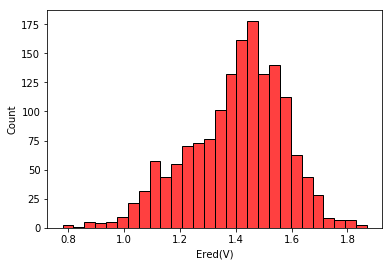

In [6]:
sns.histplot(x='Ered(V)',data=df_bznsn,color="red")
plt.savefig("./Figures/Ered_histogram.png",dpi=300)

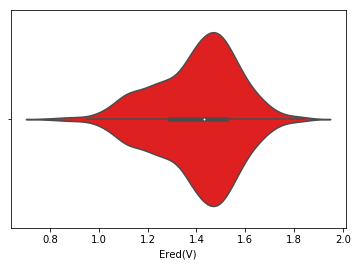

In [7]:
sns.violinplot(data=df_bznsn,x="Ered(V)",color="red")
plt.savefig("./Figures/Ered_violin.png",dpi=300)

*In order to gain a better insight into our distribution, let's calculate how big is that negative skew and how much the distribution deviates from a Gaussian (normal) distribution. We'll use two values: skewness and kurtosis*

Skewness and kurtosis can be defined as follows:

- Skew is how much a distribution is pushed left or right, a measure of asymmetry in the distribution. We can think about skew as if someone was pushing the tail of a normal distribution.
- Kurtosis quantifies how much of the distribution is in the tail. It is a simple and commonly used statistical test for normality. A good analogy is to think about punching the peak or top of the distribution and making it spread to the tails.

# Skewness
*Skewness is a measure of the asymmetry of a dataset or distribution. This value can be positive or negative. A negative skew typically indicates that the tail is on the left side of the distribution. A positive value typically indicates that the tail is on the right.*

In [8]:
from scipy.stats import skew, kurtosis, kurtosistest, skewtest
skew_val = skew(df_bznsn['Ered(V)'])
kurtosis_val = kurtosis(df_bznsn['Ered(V)'])
print(f'Skewness = {skew_val}')
print(f'Kurtosis = {kurtosis_val}')

Skewness = -0.4838408659309784
Kurtosis = 0.06786167584492775


# Kurtosis
*In Fisher’s definiton, the kurtosis of the normal distribution is zero*

*Sources:*
- https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.kurtosis.html
- https://www.statology.org/can-kurtosis-be-negative/

- If a distribution has a kurtosis of 0, then it is equal to the normal distribution
- If a distribution has positive kurtosis, it is said to be leptokurtic, which means that it has a sharper peak and heavier tails compared to a normal distribution. 
  - This simply means that fewer data values are located near the mean and more data values are located on the tails.
- If a distribution has negative kurtosis, it is said to be platykurtic, which means that it has a flatter peak and thinner tails compared to a normal distribution.
  - This simply means that more data values are located near the mean and less data values are located on the tails.


*let's confirm the hypothesis that our distribution is not normal. by running different normality tests, such as D'Agostino-Pearson , Shapiro-Wilk and Anderson tests.*

In [9]:
from scipy.stats import normaltest, shapiro, anderson

*The D'Agostino-Pearson normality test measures how far a distribution is from normality by computing skew and kurtosis. In this test, the null hypothesis (H0) is that our distribution is normal. We can use the k2 statistic and the p-value to reject or not H0.*

In [10]:
print("D'Agostino K2")
k2, p = normaltest(df_bznsn['Ered(V)'])
print(f'Statistics={k2}, p={p}')
# interpret
alpha = 0.05 #95% confidence interval
if p > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')

D'Agostino K2
Statistics=56.13962807213393, p=6.448142938599895e-13
Sample does not look Gaussian (reject H0)


*The Shapiro-Wilk normality test calculates a W statistics to check if a sample comes from a normal distribution. In this test, the null hypothesis (H0) is that our distribution is normal. We can use the W statistic and the p-value to reject or not H0.*

In [11]:
print("Shapiro-Wilk")
w_stat, p = shapiro(df_bznsn['Ered(V)'])
print(f'Statistics={w_stat}, p={p}')
# interpret
alpha = 0.05
if p > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')

Shapiro-Wilk
Statistics=0.979914128780365, p=5.2115470684614695e-14
Sample does not look Gaussian (reject H0)


*The Anderson-Darling normality test measures if a sample comes from a specific distribution (e.g. normal). It measures the distance between the cumulative probability distribution between the sample and a specific distribution. The test is a modified version of the nonparametric goodness-of-fit Kolmogorov-Smirnov test. In this test, the null hypothesis (H0) is that our distribution is normal. We can use the A statistic and the p-value to reject or not H0. In reality, the scipy function returns a range of critical values that allows us to interpret if H0 should be rejected.*

In [12]:
print("Anderson-Darling")
result  = anderson(df_bznsn['Ered(V)'])
print(f'A statistic = {result.statistic}')
p = 0
for i in range(len(result.critical_values)):
	sl, cv = result.significance_level[i], result.critical_values[i]
	if result.statistic < result.critical_values[i]:
		print(f'{sl:.3f}: {cv:.3f}, data looks normal (fail to reject H0)')
	else:
		print(f'{sl:.3f}: {cv:.3f}, data does not look normal (reject H0)')

Anderson-Darling
A statistic = 12.321368796150637
15.000: 0.575, data does not look normal (reject H0)
10.000: 0.654, data does not look normal (reject H0)
5.000: 0.785, data does not look normal (reject H0)
2.500: 0.916, data does not look normal (reject H0)
1.000: 1.089, data does not look normal (reject H0)


# IQR

In [13]:
Q1_bznsnred=df_bznsn["Ered(V)"].quantile(0.25)
Q3_bznsnred=df_bznsn["Ered(V)"].quantile(0.75)
IQR_bznsnred=Q3_bznsnred-Q1_bznsnred
lowlim_red, uplim_red = Q1_bznsnred-1.5*IQR_bznsnred, Q3_bznsnred+1.5*IQR_bznsnred
print(f"bznsnone: Q1 = %0.2f, Q3 = %0.2f, IQR = %0.2f, lowL = %0.2f,  upL = %0.2f " %(Q1_bznsnred,Q3_bznsnred,IQR_bznsnred, lowlim_red, uplim_red))

bznsnone: Q1 = 1.29, Q3 = 1.52, IQR = 0.23, lowL = 0.95,  upL = 1.86 


**Molecules out of the [Q1 - 1.5 x IQR, Q3 + 1.5 x IQR] range**

In [14]:
df_bznsn_outlier_iqr = df_bznsn[(df_bznsn["Ered(V)"]<lowlim_red)|(df_bznsn["Ered(V)"]>uplim_red)]

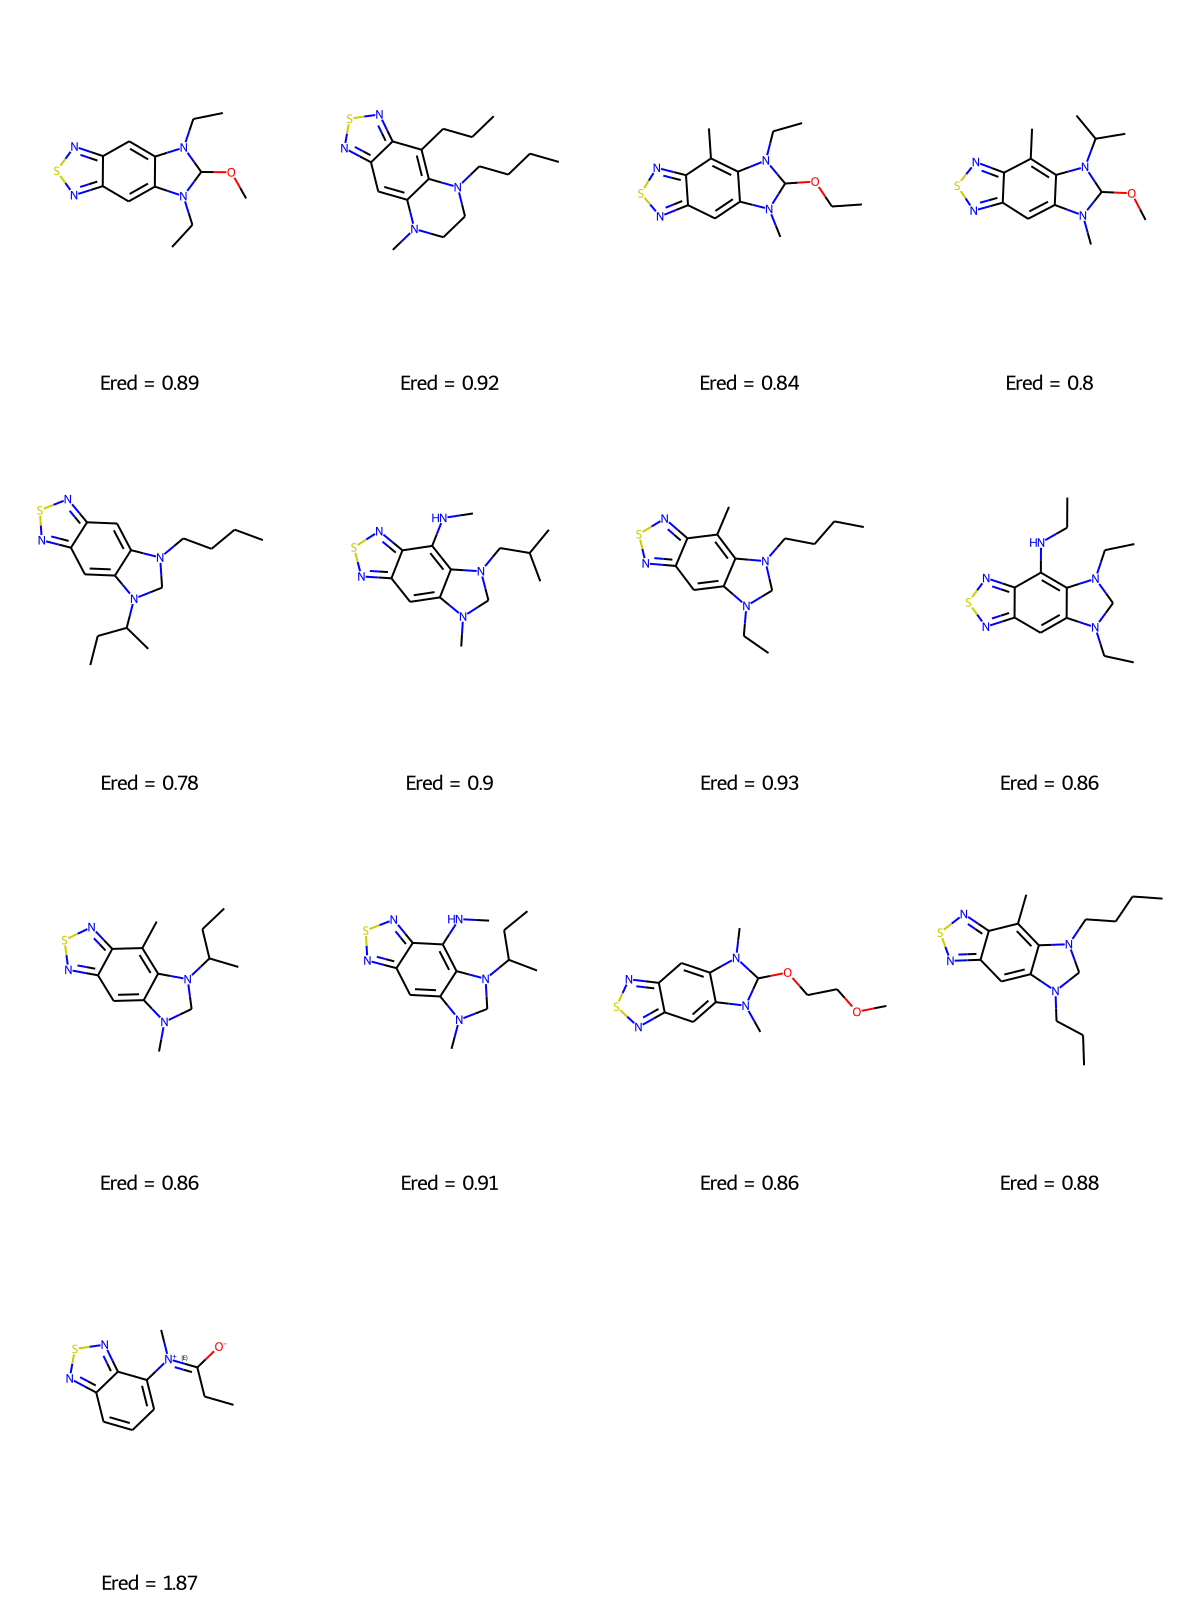

In [15]:
import datamol as dm
mols=[Chem.MolFromSmiles(x) for x in df_bznsn_outlier_iqr["SMILES"]]
legend_=["Ered = "+str(x) for x in df_bznsn_outlier_iqr["Ered(V)"]]
dm.to_image(mols,legends=legend_,legend_fontsize=20,outfile="./Figures/out_of_IQR.png",use_svg=False,mol_size=(300,400))

# Generate 2D Molecular Descriptors with the RDKit

In [16]:
from rdkit.Chem import Descriptors

In [17]:
desc_list = [desc[0] for desc in Descriptors._descList]
print(len(desc_list))
print(desc_list)

208
['MaxEStateIndex', 'MinEStateIndex', 'MaxAbsEStateIndex', 'MinAbsEStateIndex', 'qed', 'MolWt', 'HeavyAtomMolWt', 'ExactMolWt', 'NumValenceElectrons', 'NumRadicalElectrons', 'MaxPartialCharge', 'MinPartialCharge', 'MaxAbsPartialCharge', 'MinAbsPartialCharge', 'FpDensityMorgan1', 'FpDensityMorgan2', 'FpDensityMorgan3', 'BCUT2D_MWHI', 'BCUT2D_MWLOW', 'BCUT2D_CHGHI', 'BCUT2D_CHGLO', 'BCUT2D_LOGPHI', 'BCUT2D_LOGPLOW', 'BCUT2D_MRHI', 'BCUT2D_MRLOW', 'BalabanJ', 'BertzCT', 'Chi0', 'Chi0n', 'Chi0v', 'Chi1', 'Chi1n', 'Chi1v', 'Chi2n', 'Chi2v', 'Chi3n', 'Chi3v', 'Chi4n', 'Chi4v', 'HallKierAlpha', 'Ipc', 'Kappa1', 'Kappa2', 'Kappa3', 'LabuteASA', 'PEOE_VSA1', 'PEOE_VSA10', 'PEOE_VSA11', 'PEOE_VSA12', 'PEOE_VSA13', 'PEOE_VSA14', 'PEOE_VSA2', 'PEOE_VSA3', 'PEOE_VSA4', 'PEOE_VSA5', 'PEOE_VSA6', 'PEOE_VSA7', 'PEOE_VSA8', 'PEOE_VSA9', 'SMR_VSA1', 'SMR_VSA10', 'SMR_VSA2', 'SMR_VSA3', 'SMR_VSA4', 'SMR_VSA5', 'SMR_VSA6', 'SMR_VSA7', 'SMR_VSA8', 'SMR_VSA9', 'SlogP_VSA1', 'SlogP_VSA10', 'SlogP_VSA11', 

*Add more molecular properties with the rdMolDescriptors*

In [18]:
from rdkit.Chem import rdMolDescriptors 

def smi_to_mol_prop(smi,property_names = list(rdMolDescriptors.Properties.GetAvailableProperties())):
    """
    This function will return a numpy array with all molecular properties of a SMILES string
    Input (smi): a SMILES string
    Output: np.array()
    eg. df['mol_prop'] = df.SMILES.apply(smi2molprop)
    output: each row of df['mol_prop'] will have a np.array with all molecular props.
    """
    property_getter = rdMolDescriptors.Properties(property_names)
    
    mol = Chem.MolFromSmiles(smi)
    props = None
    if mol:
        props = np.array(property_getter.ComputeProperties(mol))
    return props

In [19]:
properties=list(rdMolDescriptors.Properties.GetAvailableProperties())

In [20]:
# desc_list_unique=[x for x in properties if x not in desc_list]
# desc_list_unique=desc_list_unique+desc_list
# print(len(desc_list_unique))

*Generate descriptors for each molecule*

In [21]:
from rdkit.ML.Descriptors import MoleculeDescriptors

calc = MoleculeDescriptors.MolecularDescriptorCalculator(desc_list)

rdkit_desc = [calc.CalcDescriptors(Chem.MolFromSmiles(x)) for x in df_bznsn["SMILES"]]

*Store data in the pandas DataFrame*

In [22]:
df_2Ddescp = pd.DataFrame(rdkit_desc,columns=desc_list)
print(df_2Ddescp.shape)
df_2Ddescp.head()

(1569, 208)


MaxEStateIndex  MinEStateIndex  MaxAbsEStateIndex  MinAbsEStateIndex  \
0        4.456023        1.020889           4.456023           1.020889   
1        5.243940        0.748371           5.243940           0.748371   
2        4.487068        0.475834           4.487068           0.475834   
3        4.513689        0.897986           4.513689           0.897986   
4        4.512897        0.476118           4.512897           0.476118   

        qed    MolWt  HeavyAtomMolWt  ExactMolWt  NumValenceElectrons  \
0  0.861773  291.424         270.256  291.151767                  108   
1  0.864637  292.408         272.248  292.135782                  108   
2  0.941806  291.424         270.256  291.151767                  108   
3  0.918901  305.451         282.267  305.167417                  114   
4  0.939652  305.451         282.267  305.167417                  114   

   NumRadicalElectrons  ...  fr_sulfide  fr_sulfonamd  fr_sulfone  \
0                    0  ...           0             0           0   
1                    0  ...           0             0           0   
2                    0  ...           0             0           0   
3                    0  ...           0             0           0   
4                    0  ...           0             0           0   

   fr_term_acetylene  fr_tetrazole  fr_thiazole  fr_thiocyan  fr_thiophene  \
0                  0             0            0            0             0   
1                  0             0            0            0             0   
2                  0             0            0            0             0   
3                  0             0            0            0             0   
4                  0             0            0            0             0   

   fr_unbrch_alkane  fr_urea  
0                 0        0  
1                 0        0  
2                 0        0  
3                 0        0  
4                 0        0  

[5 rows x 208 columns]

In [23]:
df_molprop=pd.DataFrame(df_bznsn["SMILES"].apply(lambda x:smi_to_mol_prop(x,property_names=properties)).to_list(),columns=properties)
df_molprop.head()

exactmw      amw  lipinskiHBA  lipinskiHBD  NumRotatableBonds  NumHBD  \
0  291.151767  291.424          5.0          0.0                3.0     0.0   
1  292.135782  292.408          5.0          0.0                4.0     0.0   
2  291.151767  291.424          5.0          1.0                3.0     1.0   
3  305.167417  305.451          5.0          1.0                5.0     1.0   
4  305.167417  305.451          5.0          1.0                4.0     1.0   

   NumHBA  NumHeavyAtoms  NumAtoms  NumHeteroatoms  ...      chi0n     chi1n  \
0     6.0           20.0      41.0             6.0  ...  12.550094  6.943478   
1     6.0           20.0      40.0             6.0  ...  12.218235  7.005867   
2     6.0           20.0      41.0             6.0  ...  12.473124  7.140155   
3     6.0           21.0      44.0             6.0  ...  13.017094  7.826711   
4     6.0           21.0      44.0             6.0  ...  13.180230  7.716276   

      chi2n     chi3n     chi4n  hallKierAlpha     kappa1    kappa2    kappa3  \
0  3.990306  3.990306  2.790050          -1.40  13.577001  5.179478  2.226066   
1  3.984172  3.984172  2.920064          -1.40  13.577001  5.535354  2.125124   
2  3.855243  3.855243  2.834057          -1.56  13.424314  5.086989  1.984487   
3  4.029118  4.029118  3.102774          -1.56  14.380319  6.052915  2.413726   
4  4.100912  4.100912  3.083301          -1.56  14.380319  5.673993  2.310895   

        Phi  
0  3.516089  
1  3.757675  
2  3.414467  
3  4.144898  
4  3.885421  

[5 rows x 43 columns]

*Combine two descriptor dataframes and remove duplicate and all zero columns*

In [24]:
Xdata_bznsn=pd.concat([df_molprop,df_2Ddescp],axis=1)
print(Xdata_bznsn.shape)
Xdata_bznsn.head()

(1569, 251)


exactmw      amw  lipinskiHBA  lipinskiHBD  NumRotatableBonds  NumHBD  \
0  291.151767  291.424          5.0          0.0                3.0     0.0   
1  292.135782  292.408          5.0          0.0                4.0     0.0   
2  291.151767  291.424          5.0          1.0                3.0     1.0   
3  305.167417  305.451          5.0          1.0                5.0     1.0   
4  305.167417  305.451          5.0          1.0                4.0     1.0   

   NumHBA  NumHeavyAtoms  NumAtoms  NumHeteroatoms  ...  fr_sulfide  \
0     6.0           20.0      41.0             6.0  ...           0   
1     6.0           20.0      40.0             6.0  ...           0   
2     6.0           20.0      41.0             6.0  ...           0   
3     6.0           21.0      44.0             6.0  ...           0   
4     6.0           21.0      44.0             6.0  ...           0   

   fr_sulfonamd  fr_sulfone  fr_term_acetylene  fr_tetrazole  fr_thiazole  \
0             0           0                  0             0            0   
1             0           0                  0             0            0   
2             0           0                  0             0            0   
3             0           0                  0             0            0   
4             0           0                  0             0            0   

   fr_thiocyan  fr_thiophene  fr_unbrch_alkane  fr_urea  
0            0             0                 0        0  
1            0             0                 0        0  
2            0             0                 0        0  
3            0             0                 0        0  
4            0             0                 0        0  

[5 rows x 251 columns]

*Remove zero columns*

In [25]:
print(f"Initial Xdata_bznsn shape = %d x %d" %Xdata_bznsn.shape)
Xdata_bznsn=Xdata_bznsn.drop(Xdata_bznsn.columns[Xdata_bznsn.eq(0).all()],axis=1)
print(f"Xdata_bznsn shape (now) = %d x %d" %Xdata_bznsn.shape)

Initial Xdata_bznsn shape = 1569 x 251
Xdata_bznsn shape (now) = 1569 x 164


*Remove duplicate columns*

In [26]:
print(f"Initial Xdata_bznsn shape = %d x %d" %Xdata_bznsn.shape)
Xdata_bznsn=Xdata_bznsn.loc[:,~Xdata_bznsn.columns.duplicated()].copy()
print(f"Xdata_bznsn shape (now) = %d x %d" %Xdata_bznsn.shape)

Initial Xdata_bznsn shape = 1569 x 164
Xdata_bznsn shape (now) = 1569 x 156


In [27]:
all_descriptors=Xdata_bznsn.columns
print(len(all_descriptors))

156


# Feature correlation

In [28]:
def remove_corr_features(Xdata,corr_cutoff = 0.75):
    """
    This function will drop highly correlated features
    Output: a pd.Dataframe 
    """
    cor_matrix=Xdata.corr().abs()
    upper_tri = cor_matrix.where(np.triu(np.ones(cor_matrix.shape),k=1).astype(np.bool_))

    to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > corr_cutoff)]
    print(f"Dropped %d features with correlation coeff. > %0.2f" %(len(to_drop),corr_cutoff))

    Xdata=Xdata.drop(columns=to_drop,axis=1)
    print(f"Remaining features %d" %(Xdata.shape[1]))
    return Xdata

In [29]:
Xdata_bznsn_uncorr=remove_corr_features(Xdata=Xdata_bznsn, corr_cutoff=0.75)
print(Xdata_bznsn_uncorr.shape)

Dropped 105 features with correlation coeff. > 0.75
Remaining features 51
(1569, 51)


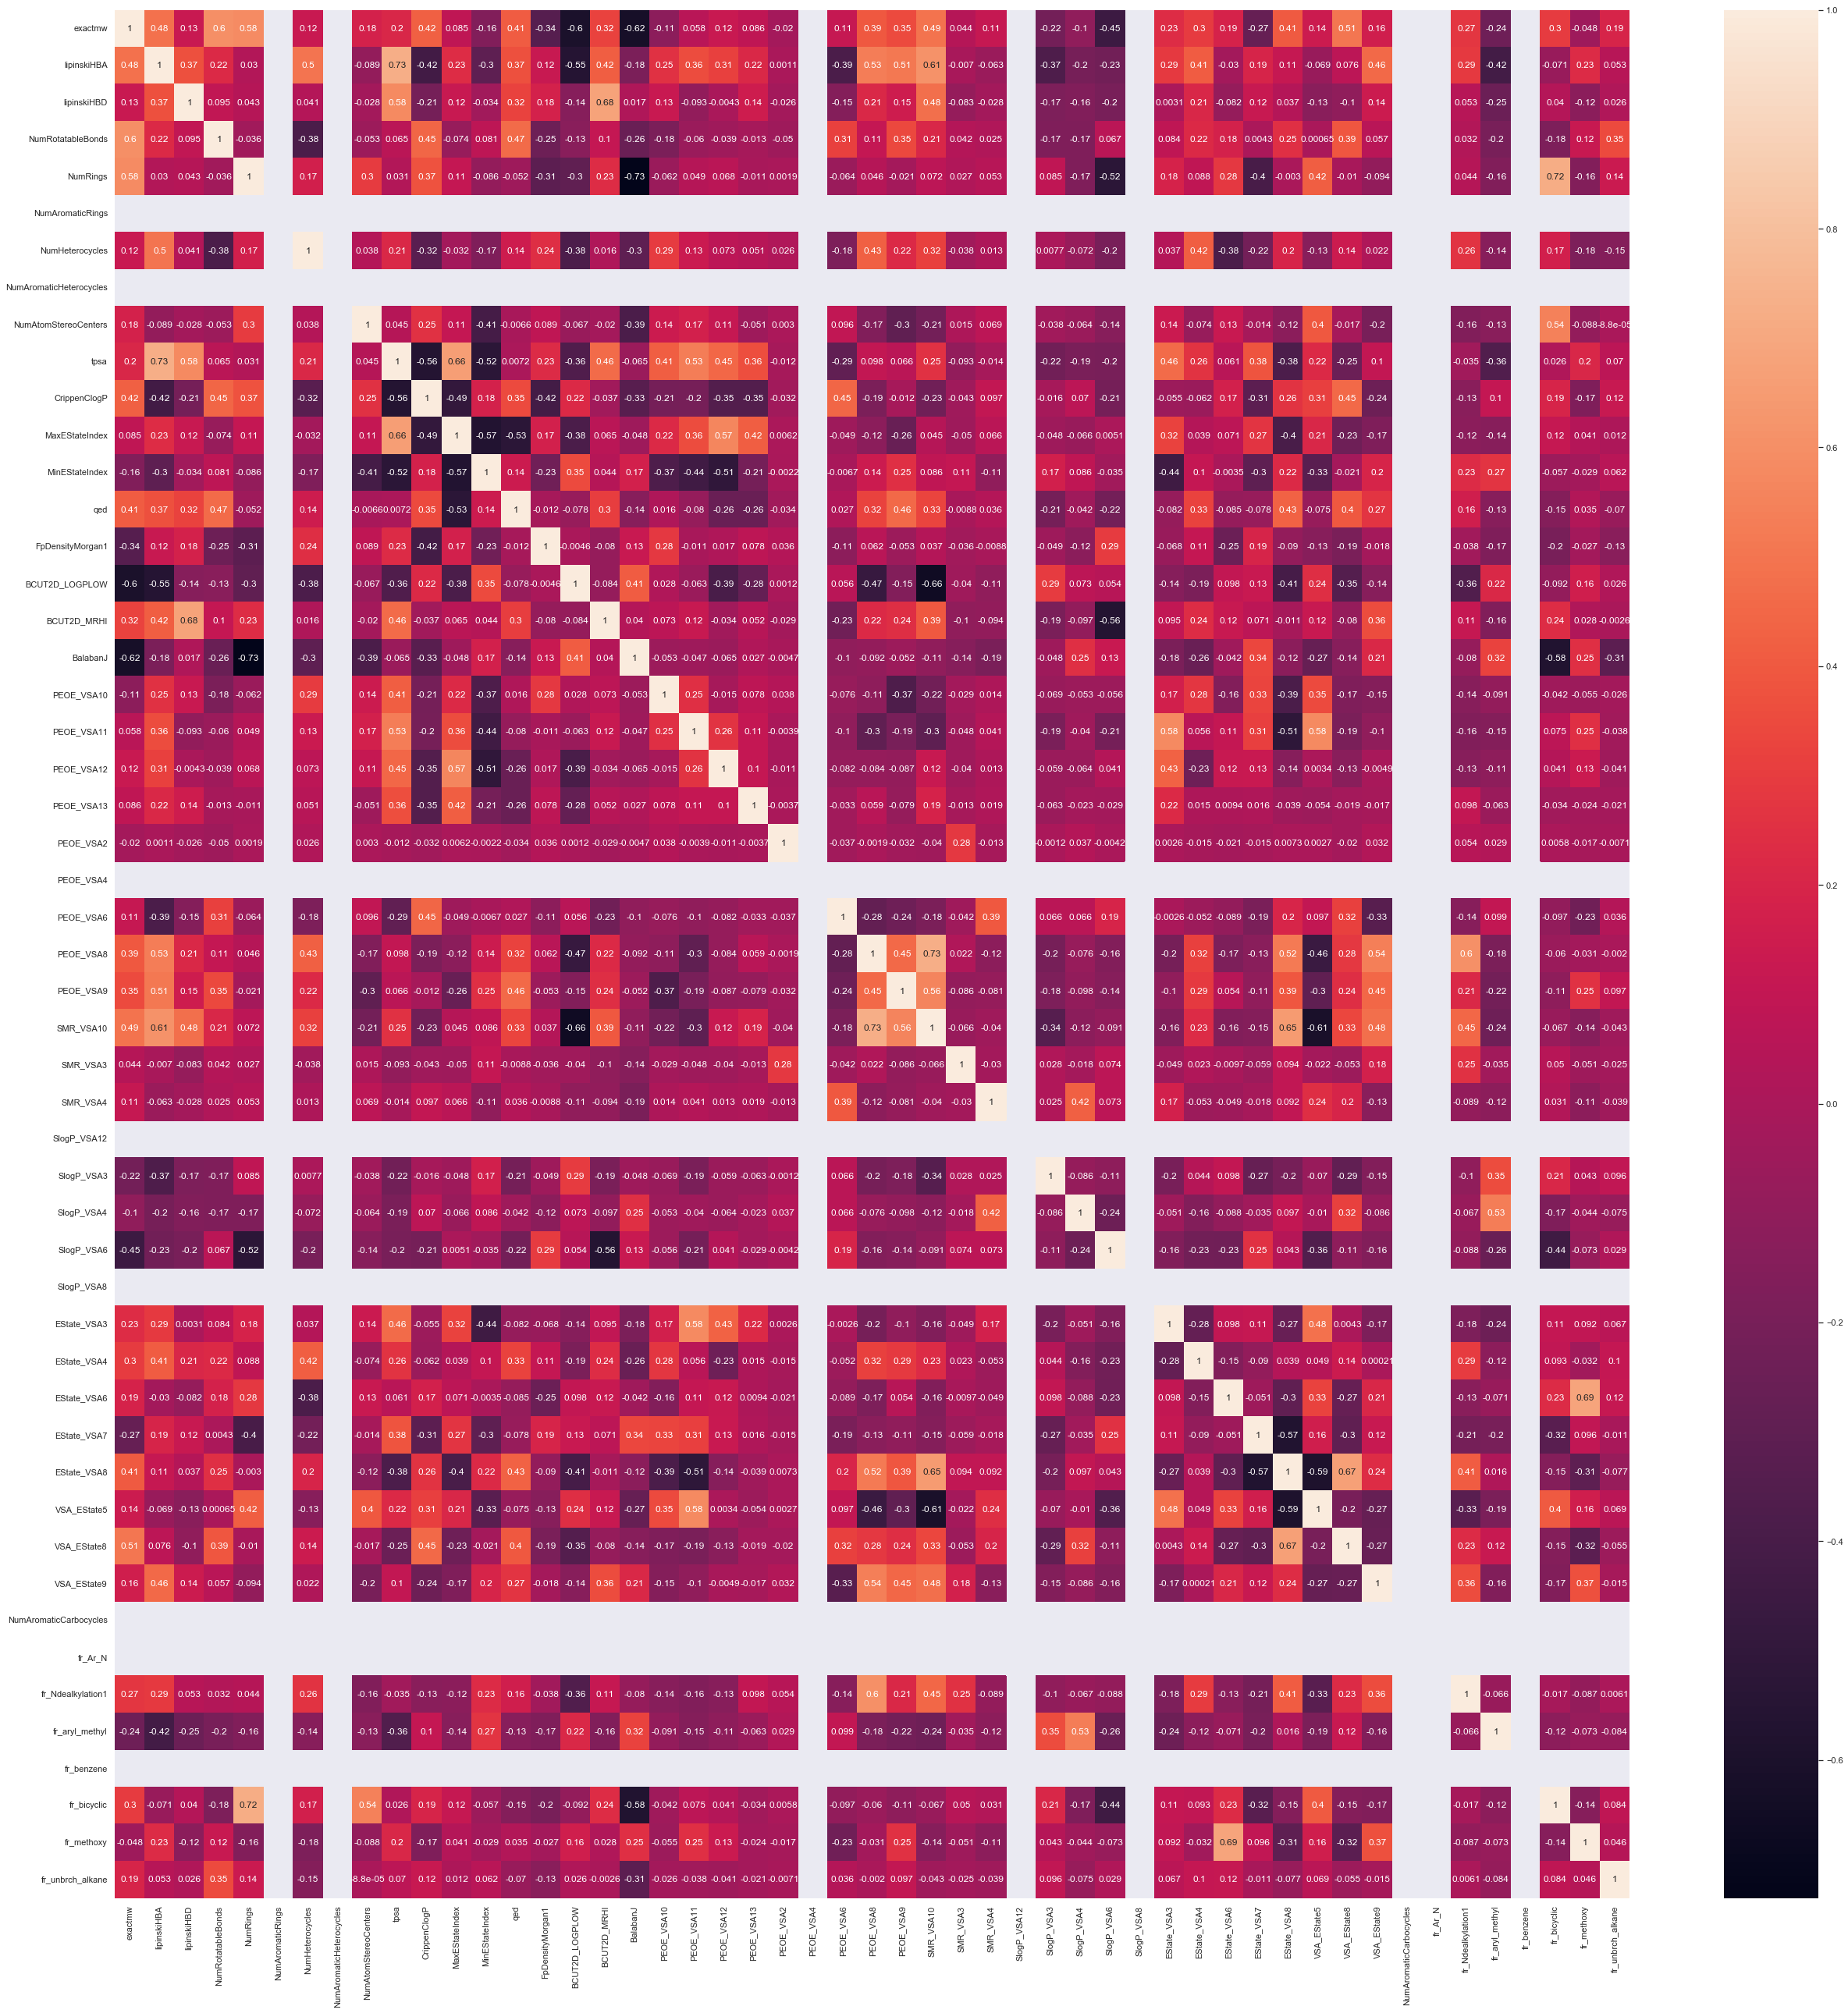

In [30]:
corr = Xdata_bznsn_uncorr.corr('pearson')
sns.set(rc={"figure.figsize":(36, 36)}) 
sns.heatmap(corr, annot=True)
plt.tight_layout()
plt.savefig("./Figures/Corr_heatmap_feature.png",dpi=300)
# plt.savefig("heatmap_corr_annot.png",dpi=300)
# plt.show()

# Features correlation with the dependent target variable 

In [31]:
import seaborn as sns
from scipy import stats
from scipy.stats import norm

In [32]:
target = 'Ered(V)'
descriptors=Xdata_bznsn_uncorr.columns

C:\Users\jaina\AppData\Roaming\Python\Python37\site-packages\scipy\stats\stats.py:4023: PearsonRConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(PearsonRConstantInputWarning())


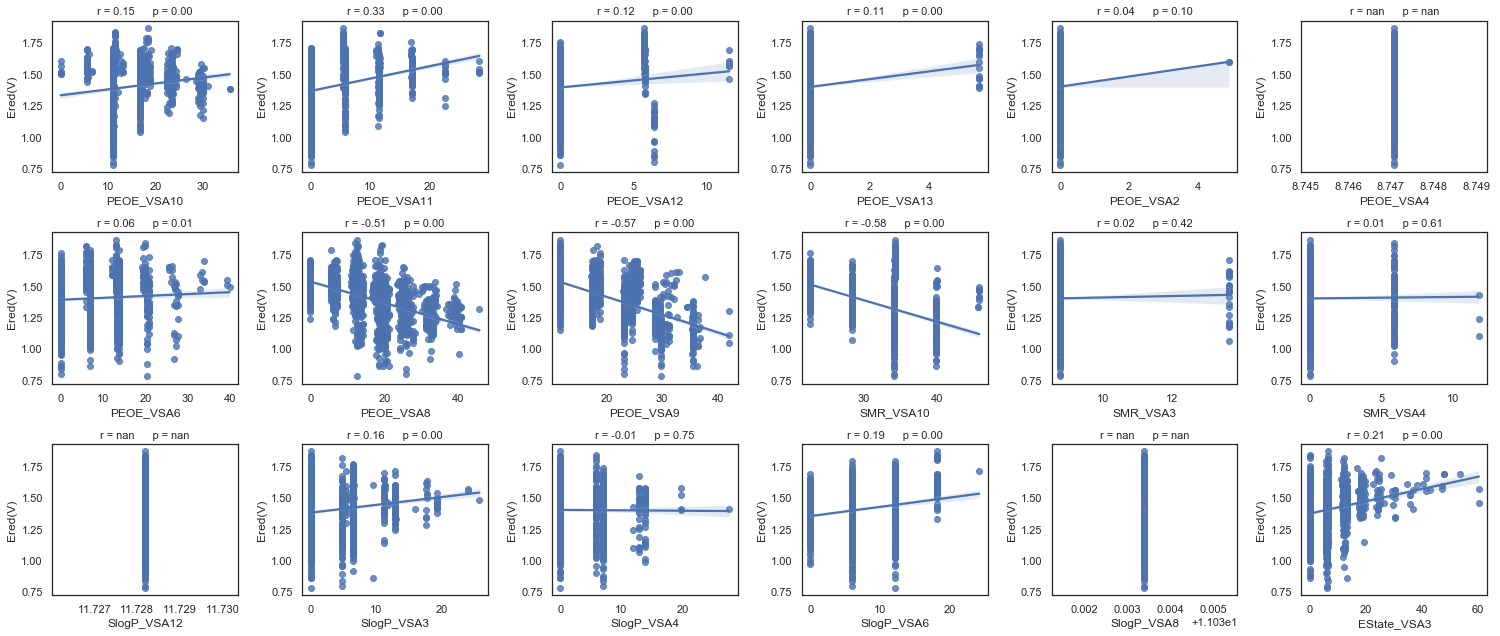

In [33]:
nr_rows = 3
nr_cols = 6
sns.set(style='white')
fig, axs = plt.subplots(nr_rows, nr_cols, figsize=(nr_cols*3.5,nr_rows*3))

for r in range(0,nr_rows):
    
    for c in range(0,nr_cols):  
        i = r*nr_cols+c+18
        
        if i < len(descriptors):
            
            sns.regplot(x=Xdata_bznsn_uncorr[descriptors[i]], y=df_bznsn[target], ax = axs[r][c])
            
            stp = stats.pearsonr(Xdata_bznsn_uncorr[descriptors[i]], df_bznsn[target])

            # str_title = "Pearson’s correlation coefficient (r) = " + "{0:.2f}".format(stp[0]) + "      " "Two-tailed p-value (p) = " + "{0:.2f}".format(stp[1])
            str_title = "r = " + "{0:.2f}".format(stp[0]) + "      " "p = " + "{0:.2f}".format(stp[1])
            axs[r][c].set_title(str_title,fontsize=11)
            
plt.tight_layout()    
plt.savefig("./Figures/Ered_desc2.png",dpi=300)
# plt.show()  

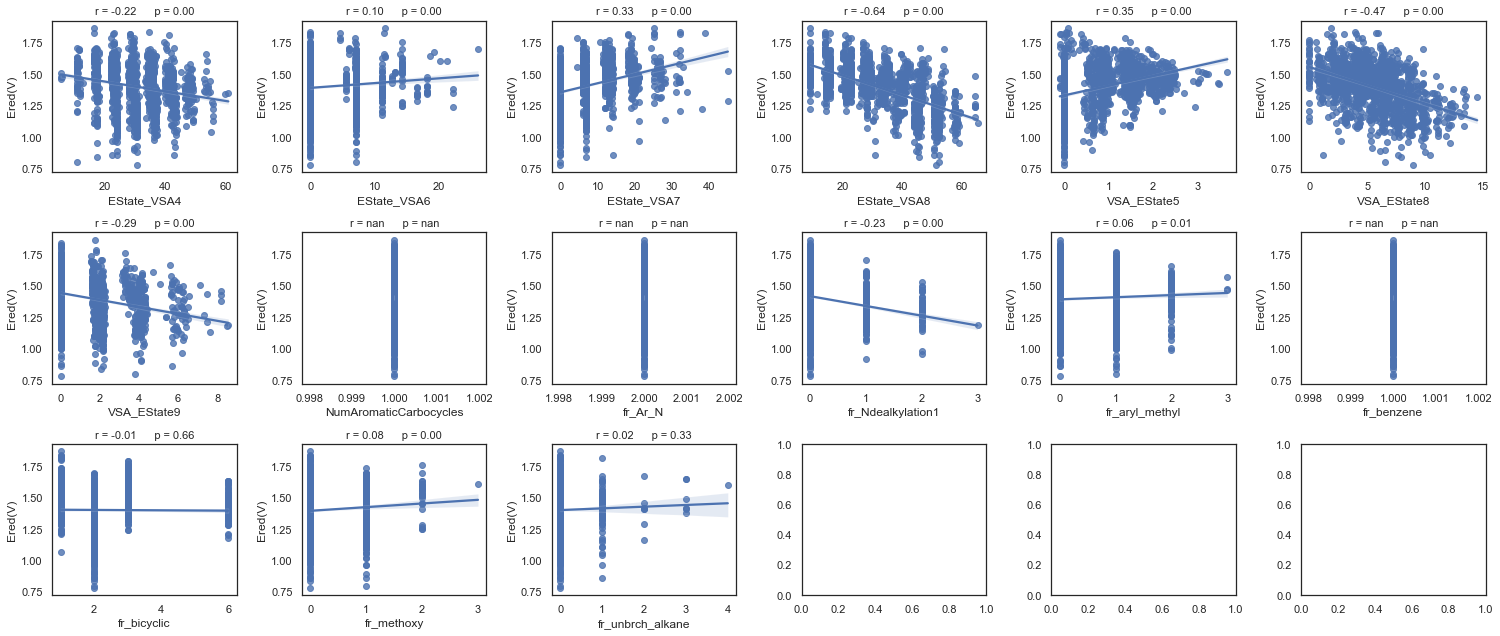

In [34]:
nr_rows = 3
nr_cols = 6

fig, axs = plt.subplots(nr_rows, nr_cols, figsize=(nr_cols*3.5,nr_rows*3))

for r in range(0,nr_rows):
    
    for c in range(0,nr_cols):  
        i = r*nr_cols+c+18+18
        
        if i < len(descriptors):
            
            sns.regplot(x=Xdata_bznsn_uncorr[descriptors[i]], y=df_bznsn[target], ax = axs[r][c])
            
            stp = stats.pearsonr(Xdata_bznsn_uncorr[descriptors[i]], df_bznsn[target])

            # str_title = "Pearson’s correlation coefficient (r) = " + "{0:.2f}".format(stp[0]) + "      " "Two-tailed p-value (p) = " + "{0:.2f}".format(stp[1])
            str_title = "r = " + "{0:.2f}".format(stp[0]) + "      " "p = " + "{0:.2f}".format(stp[1])
            axs[r][c].set_title(str_title,fontsize=11)
            
plt.tight_layout()    
plt.savefig("./Figures/Ered_desc3.png",dpi=300)
# plt.show()  

# Outliers Detection

*Method1: Using mean and std to find outliers*

*The first outlier detection method we'll use is based on the mean and standard deviation of our data. In this method, a point is considered outlier if it's 2 std below or above the mean of our sample.*

In [35]:
c = 2
def get_outliers(data,feature_name, c=2):
    mean, std = data[feature_name].mean(),data[feature_name].std()
    bounds = mean - (c*std), mean + (c*std)
    outliers = data[~data[feature_name].between(*bounds)]
    
    non_outliers = data.iloc[data.index.difference(outliers.index)]
    
    return bounds, outliers, non_outliers

In [36]:
outliers = []

for i in descriptors:
    outliers.append(get_outliers(data=Xdata_bznsn_uncorr,feature_name= i, c=2)[1])

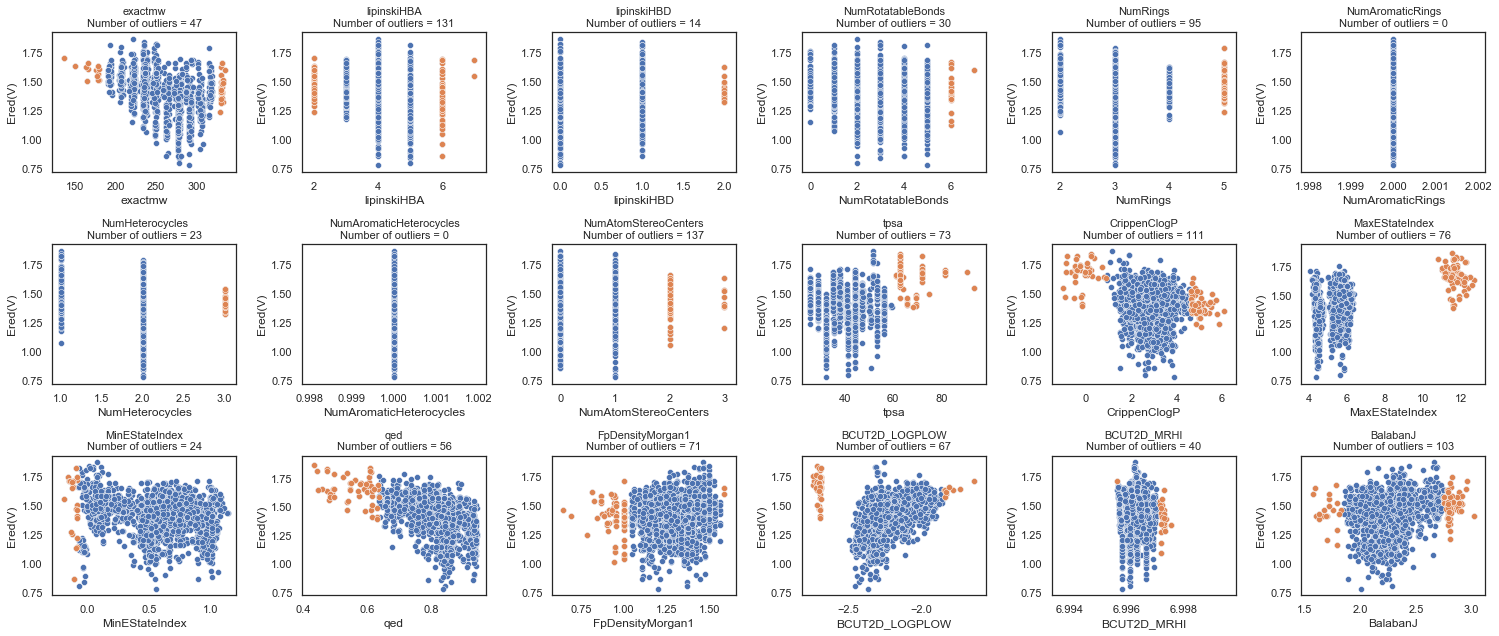

In [37]:
nr_rows=3;nr_cols=6
target='Ered(V)'
fig, axs = plt.subplots(nr_rows, nr_cols, figsize=(nr_cols*3.5,nr_rows*3))

for r in range(0,nr_rows):
    for c in range(0,nr_cols):  
        i = r*nr_cols+c
        if i < len(descriptors):
            sns.scatterplot(x=Xdata_bznsn_uncorr[descriptors[i]], y=df_bznsn[target], ax = axs[r][c])
            sns.scatterplot(x=outliers[i][descriptors[i]], y=df_bznsn[target].loc[outliers[i].index.to_list()], ax = axs[r][c])
            
           # print(f'Possible number of outliers = {}')
            axs[r][c].set_title(f'{descriptors[i]}\nNumber of outliers = {len(outliers[i])}',fontsize=11)
            
# set the spacing between subplots
plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.4)            
plt.tight_layout()    
plt.savefig("./Figures/Ered_with_2std_out1.png",dpi=300)
# plt.show()  

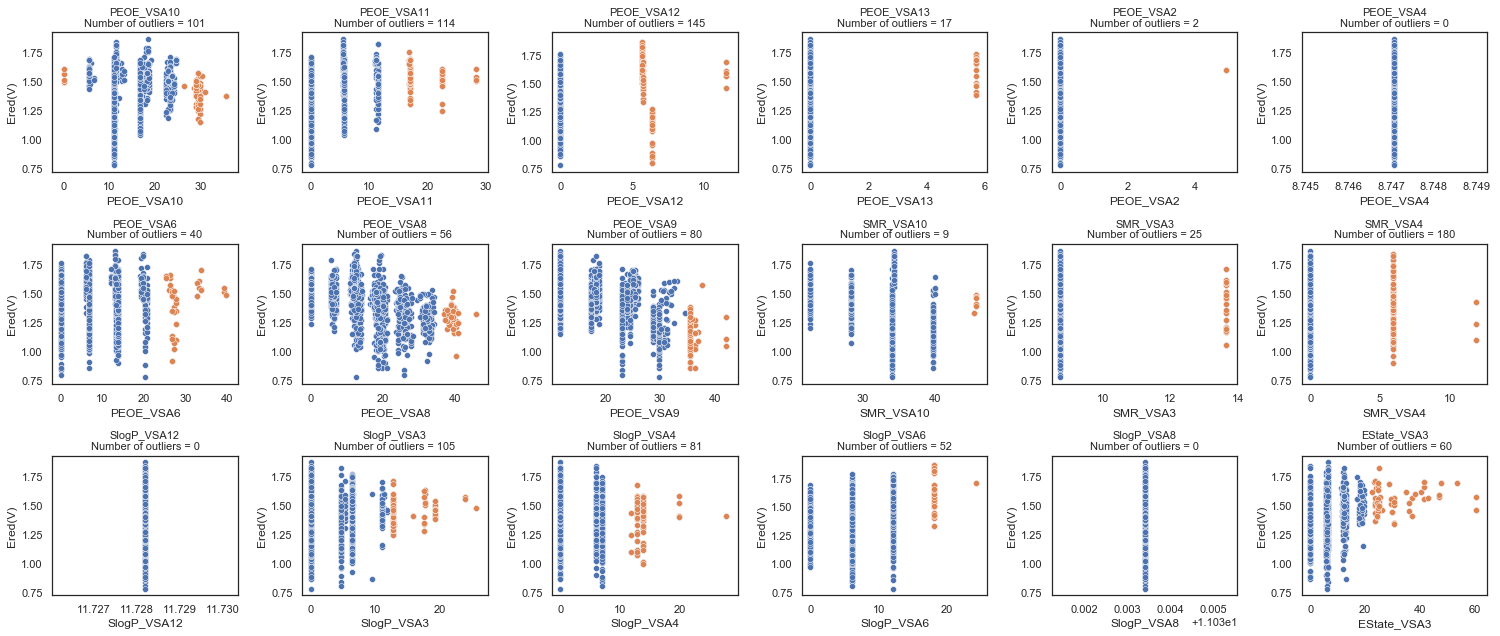

In [38]:
nr_rows=3;nr_cols=6
target='Ered(V)'
fig, axs = plt.subplots(nr_rows, nr_cols, figsize=(nr_cols*3.5,nr_rows*3))

for r in range(0,nr_rows):
    for c in range(0,nr_cols):  
        i = r*nr_cols+c+18
        if i < len(descriptors):
            sns.scatterplot(x=Xdata_bznsn_uncorr[descriptors[i]], y=df_bznsn[target], ax = axs[r][c])
            sns.scatterplot(x=outliers[i][descriptors[i]], y=df_bznsn[target].loc[outliers[i].index.to_list()], ax = axs[r][c])
            
           # print(f'Possible number of outliers = {}')
            axs[r][c].set_title(f'{descriptors[i]}\nNumber of outliers = {len(outliers[i])}',fontsize=11)
            
# set the spacing between subplots
plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.4)            
plt.tight_layout()    
plt.savefig("./Figures/Ered_with_2std_out2.png",dpi=300)
# plt.show()  

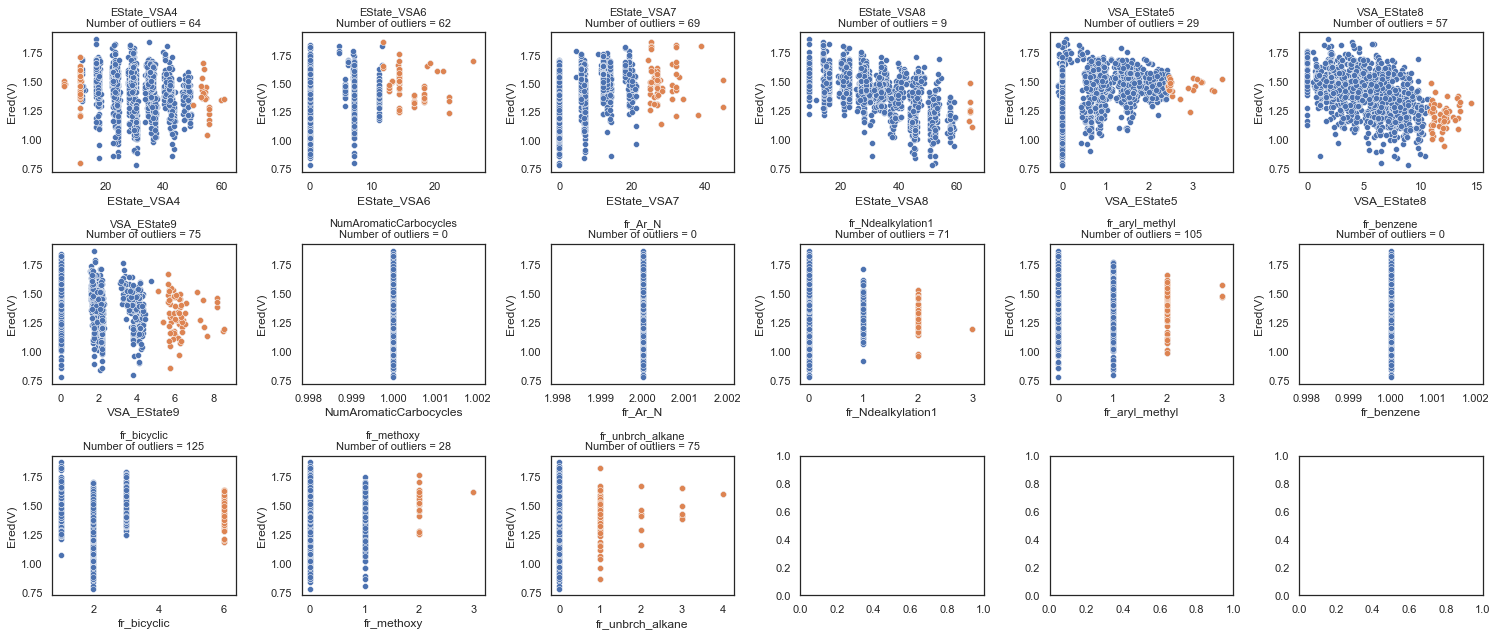

In [39]:
nr_rows=3;nr_cols=6
target='Ered(V)'
fig, axs = plt.subplots(nr_rows, nr_cols, figsize=(nr_cols*3.5,nr_rows*3))

for r in range(0,nr_rows):
    for c in range(0,nr_cols):  
        i = r*nr_cols+c+18+18
        if i < len(descriptors):
            sns.scatterplot(x=Xdata_bznsn_uncorr[descriptors[i]], y=df_bznsn[target], ax = axs[r][c])
            sns.scatterplot(x=outliers[i][descriptors[i]], y=df_bznsn[target].loc[outliers[i].index.to_list()], ax = axs[r][c])
            
           # print(f'Possible number of outliers = {}')
            axs[r][c].set_title(f'{descriptors[i]}\nNumber of outliers = {len(outliers[i])}',fontsize=11)
            
# set the spacing between subplots
plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.4)            
plt.tight_layout()    
plt.savefig("./Figures/Ered_with_2std_out3.png",dpi=300)
# plt.show()  

***Method 2: IQR***

In [40]:
def iqr_detection(data, feature_name, std_cut=1.5):
    
    
    df = data.copy()
    df.reset_index(drop=True,inplace=True)
    
    q3 = np.quantile(df[feature_name],.75)
    q1 = np.quantile(df[feature_name],.25)

    iqr = q3 - q1
    
    cutoff = std_cut * iqr
    lower, upper = q1 - cutoff, q3 + cutoff
    
    outliers = df[(df[feature_name] < lower) | (df[feature_name] > upper)]
    ok_points = df.iloc[df.index.difference(outliers.index)]

    return (lower, upper), outliers, ok_points

In [41]:
Xdata_bznsn_uncorr.columns

Index(['exactmw', 'lipinskiHBA', 'lipinskiHBD', 'NumRotatableBonds',
       'NumRings', 'NumAromaticRings', 'NumHeterocycles',
       'NumAromaticHeterocycles', 'NumAtomStereoCenters', 'tpsa',
       'CrippenClogP', 'MaxEStateIndex', 'MinEStateIndex', 'qed',
       'FpDensityMorgan1', 'BCUT2D_LOGPLOW', 'BCUT2D_MRHI', 'BalabanJ',
       'PEOE_VSA10', 'PEOE_VSA11', 'PEOE_VSA12', 'PEOE_VSA13', 'PEOE_VSA2',
       'PEOE_VSA4', 'PEOE_VSA6', 'PEOE_VSA8', 'PEOE_VSA9', 'SMR_VSA10',
       'SMR_VSA3', 'SMR_VSA4', 'SlogP_VSA12', 'SlogP_VSA3', 'SlogP_VSA4',
       'SlogP_VSA6', 'SlogP_VSA8', 'EState_VSA3', 'EState_VSA4', 'EState_VSA6',
       'EState_VSA7', 'EState_VSA8', 'VSA_EState5', 'VSA_EState8',
       'VSA_EState9', 'NumAromaticCarbocycles', 'fr_Ar_N', 'fr_Ndealkylation1',
       'fr_aryl_methyl', 'fr_benzene', 'fr_bicyclic', 'fr_methoxy',
       'fr_unbrch_alkane'],
      dtype='object')

In [42]:
descriptor="qed"
iqr_bounds, iqr_outliers, iqr_okpoints = iqr_detection(Xdata_bznsn_uncorr, feature_name=descriptor)
print(iqr_bounds)

(0.609755863646127, 1.0155530969383264)


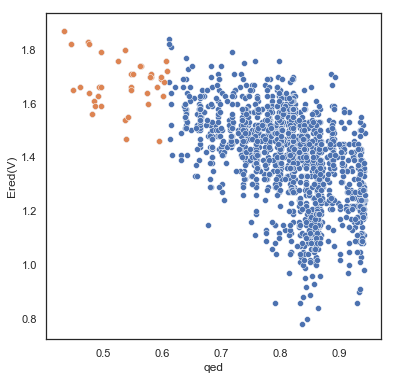

In [43]:
target='Ered(V)'
descriptor="qed"
sns.set(rc={"figure.figsize":(6, 6)}) 
sns.set(style='white')
sns.scatterplot(x=Xdata_bznsn_uncorr[descriptor], y=df_bznsn[target])
sns.scatterplot(x=iqr_outliers[descriptor], y=df_bznsn[target].loc[iqr_outliers.index.to_list()])
# plt.grid(False)

**Method 3**

*Automatic detection*

*We can also automate the detection of outliers using the local outlier factor algorithm*

*The local outlier factor (LOF) adopts a notion of oulier that depends on the local neighborhood of each data point. This allows the algorithm to find data points that are different from the global distribution and also different from their neighbors. LOF does this by assigning an outlier factor to each data point, which is the degree each point deviates from its neighbors. An outlier is expected to have a local densitiy that is smaller (its far away) from it's k-neighbors.*

In [44]:
descriptors=Xdata_bznsn_uncorr.columns

In [45]:
X = Xdata_bznsn_uncorr[descriptors].values
Y = df_bznsn['Ered(V)'].values
print(X.shape,Y.shape)

(1569, 51) (1569,)


In [46]:
from sklearn.preprocessing import Normalizer, normalize, RobustScaler
scaler = RobustScaler()
Xnorm = scaler.fit(X).transform(X)

In [47]:
Xnorm.mean(),Xnorm.std()

(0.12266327584958932, 0.7876038442383346)

In [48]:
from sklearn.neighbors import LocalOutlierFactor
outlier_scores = LocalOutlierFactor(n_neighbors=20,novelty=False).fit_predict(Xnorm)

In [49]:
lof_no_outliers = Xdata_bznsn_uncorr.iloc[outlier_scores == 1]
lof_outliers = Xdata_bznsn_uncorr.iloc[outlier_scores == -1]

lof_no_outliers.shape,lof_outliers.shape

((1543, 51), (26, 51))

In [50]:
legend_=[]
for jj in lof_outliers.index.to_list():
    legend_.append("Ered = "+str(df_bznsn['Ered(V)'].loc[jj]))
# legend_

*Visualize outliers with datamol*

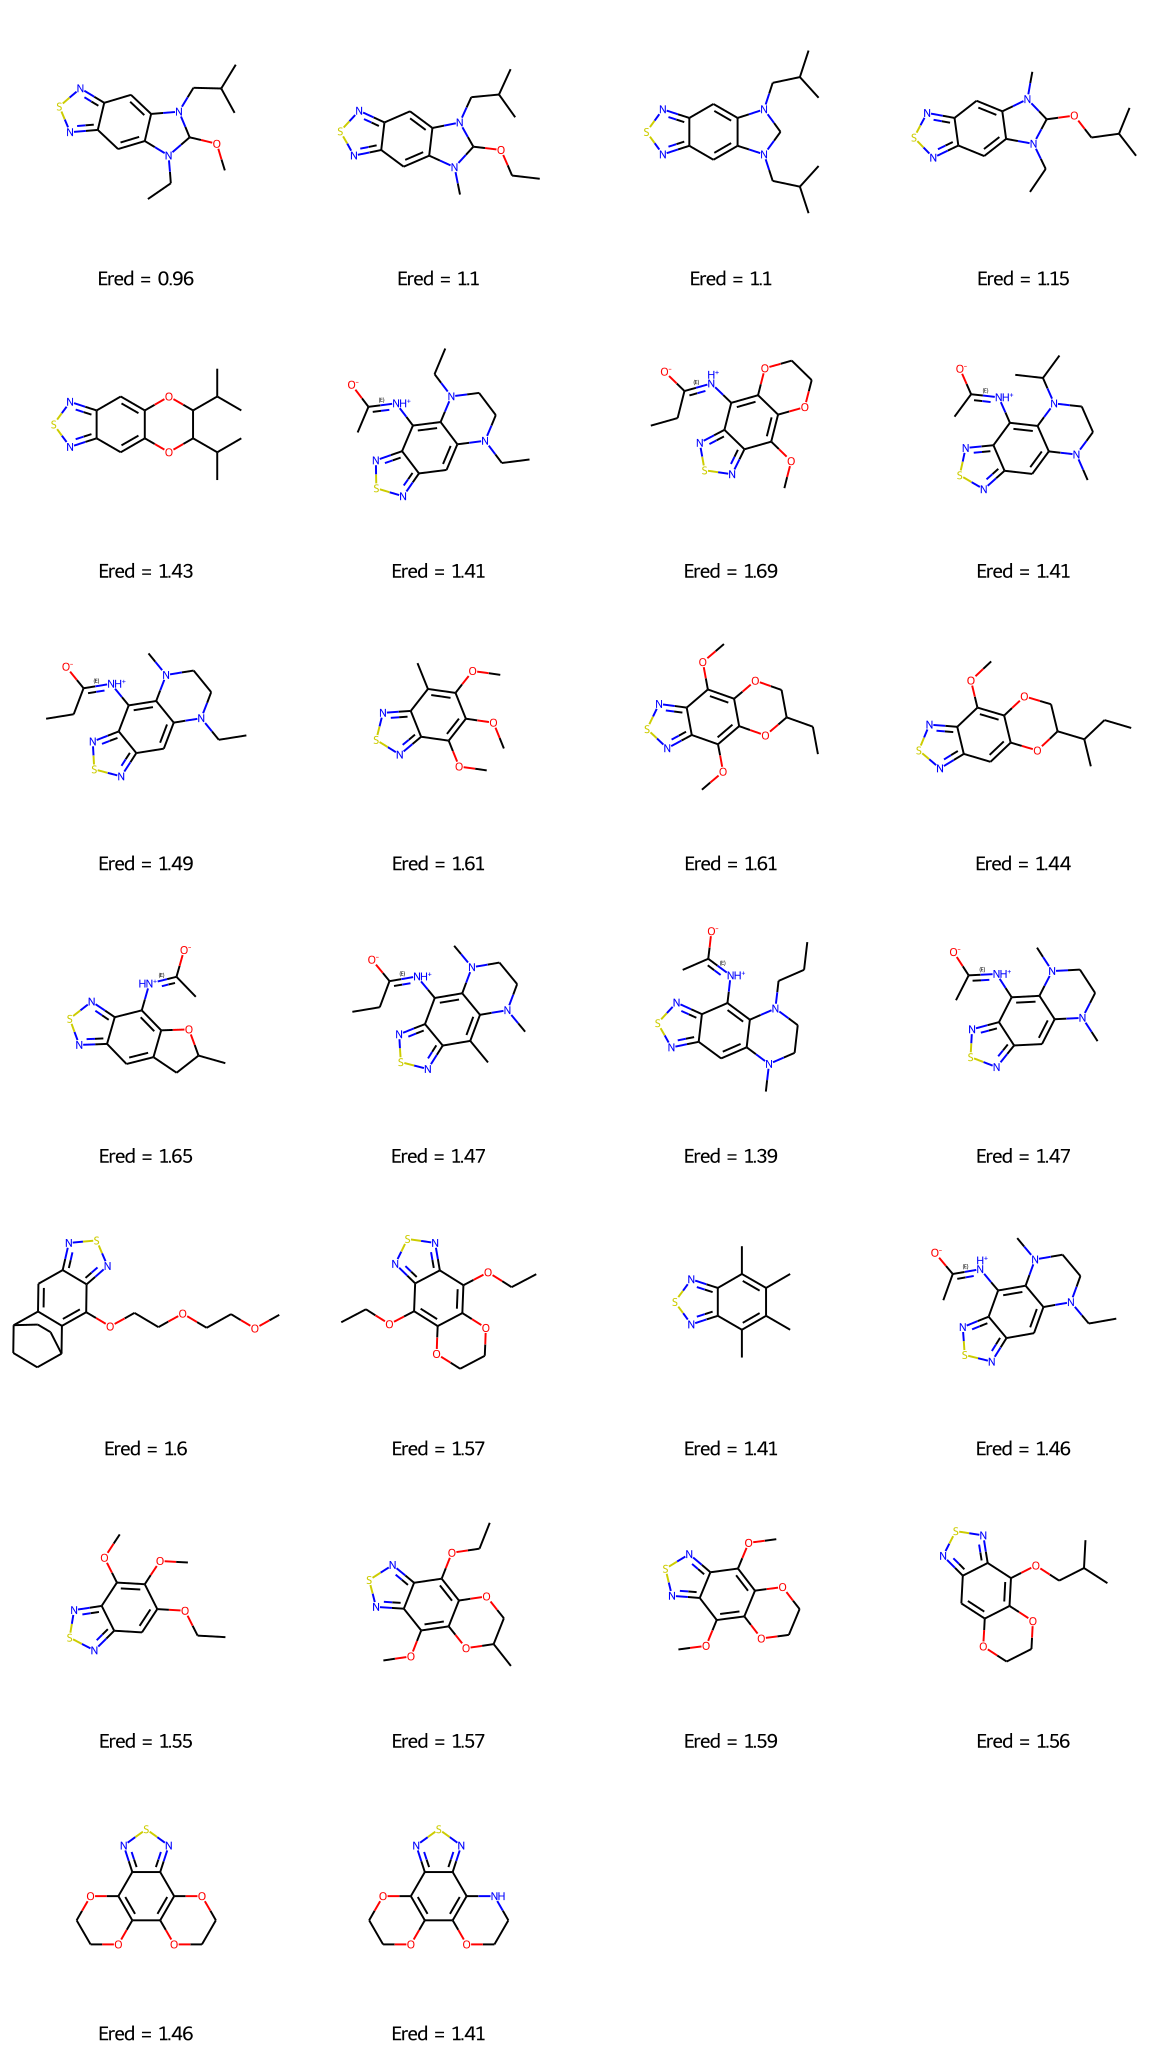

In [51]:
import datamol as dm
mols=[Chem.MolFromSmiles(smi) for smi in df_bznsn.loc[lof_outliers.index.to_list()]["SMILES"]]
dm.to_image(mols,legend_fontsize=20,legends=legend_)


In [52]:
df_bznsn_no_out_lof=df_bznsn.loc[lof_no_outliers.index.to_list()]
print(df_bznsn_no_out_lof.shape)

(1543, 2)


C:\Users\jaina\AppData\Roaming\Python\Python37\site-packages\scipy\stats\stats.py:4023: PearsonRConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(PearsonRConstantInputWarning())


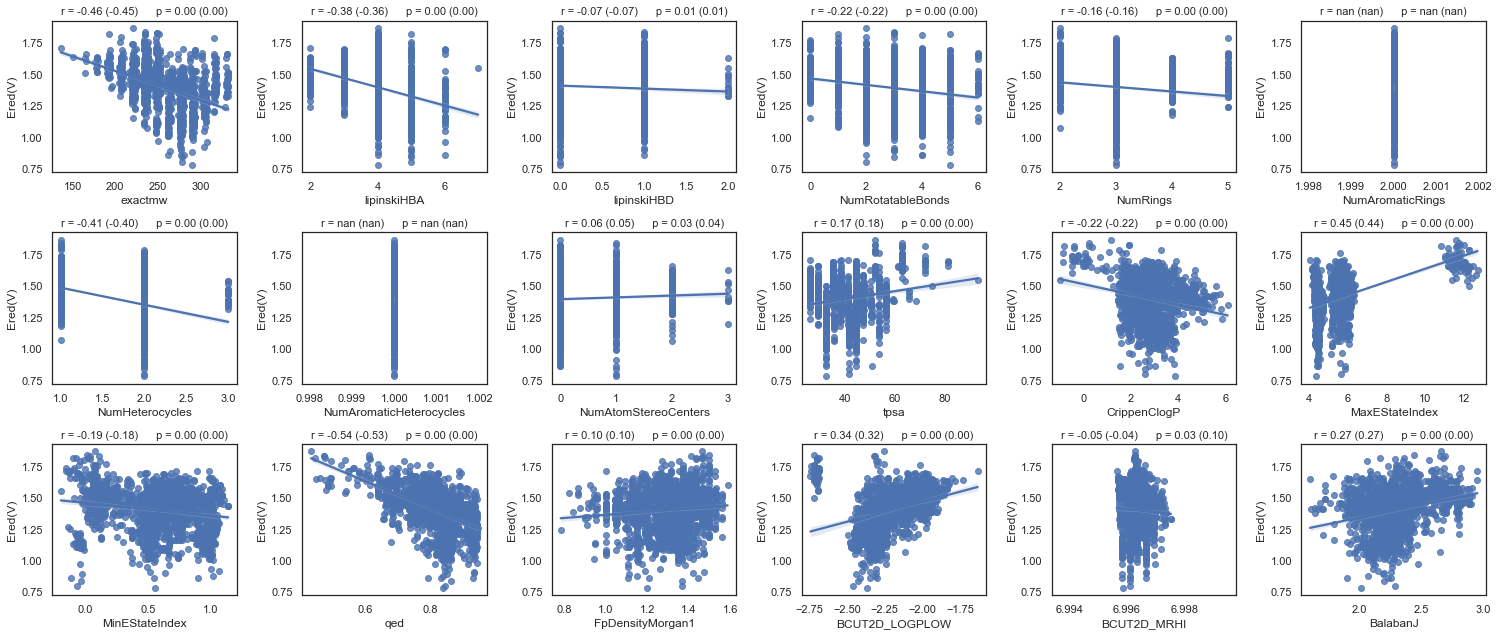

In [53]:
nr_rows=3;nr_cols=6
target='Ered(V)'

fig, axs = plt.subplots(nr_rows, nr_cols, figsize=(nr_cols*3.5,nr_rows*3))

for r in range(0,nr_rows):
    
    for c in range(0,nr_cols):  
        i = r*nr_cols+c
        
        if i < len(descriptors):
            
            sns.regplot(x=lof_no_outliers[descriptors[i]], y=df_bznsn_no_out_lof[target], ax = axs[r][c])
            
            stp = stats.pearsonr(lof_no_outliers[descriptors[i]], df_bznsn_no_out_lof[target])
            stp0 = stats.pearsonr(Xdata_bznsn_uncorr[descriptors[i]], df_bznsn[target])
            
            str_title = "r = " + "{0:.2f}".format(stp[0])+ " ({0:.2f})".format(stp0[0]) + "      " "p = " + "{0:.2f}".format(stp[1])+ " ({0:.2f})".format(stp0[1]) 
                        
            axs[r][c].set_title(str_title,fontsize=11)
            
plt.tight_layout()    
plt.savefig("./Figures/Ered_corr_after_lof1.png",dpi=300)

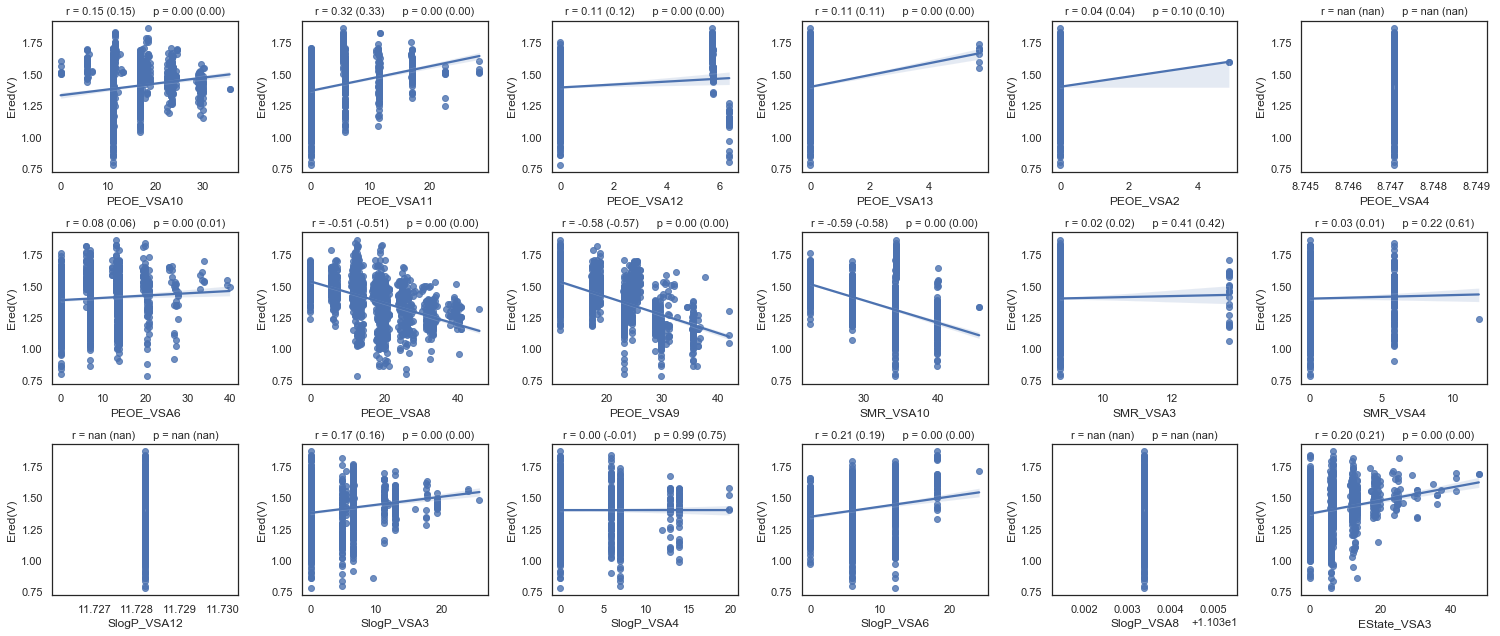

In [54]:
nr_rows=3;nr_cols=6
target='Ered(V)'

fig, axs = plt.subplots(nr_rows, nr_cols, figsize=(nr_cols*3.5,nr_rows*3))

for r in range(0,nr_rows):
    
    for c in range(0,nr_cols):  
        i = r*nr_cols+c+18
        
        if i < len(descriptors):
            
            sns.regplot(x=lof_no_outliers[descriptors[i]], y=df_bznsn_no_out_lof[target], ax = axs[r][c])
            
            stp = stats.pearsonr(lof_no_outliers[descriptors[i]], df_bznsn_no_out_lof[target])
            stp0 = stats.pearsonr(Xdata_bznsn_uncorr[descriptors[i]], df_bznsn[target])
            
            str_title = "r = " + "{0:.2f}".format(stp[0])+ " ({0:.2f})".format(stp0[0]) + "      " "p = " + "{0:.2f}".format(stp[1])+ " ({0:.2f})".format(stp0[1]) 
                        
            axs[r][c].set_title(str_title,fontsize=11)
            
plt.tight_layout()    
plt.savefig("./Figures/Ered_corr_after_lof2.png",dpi=300)

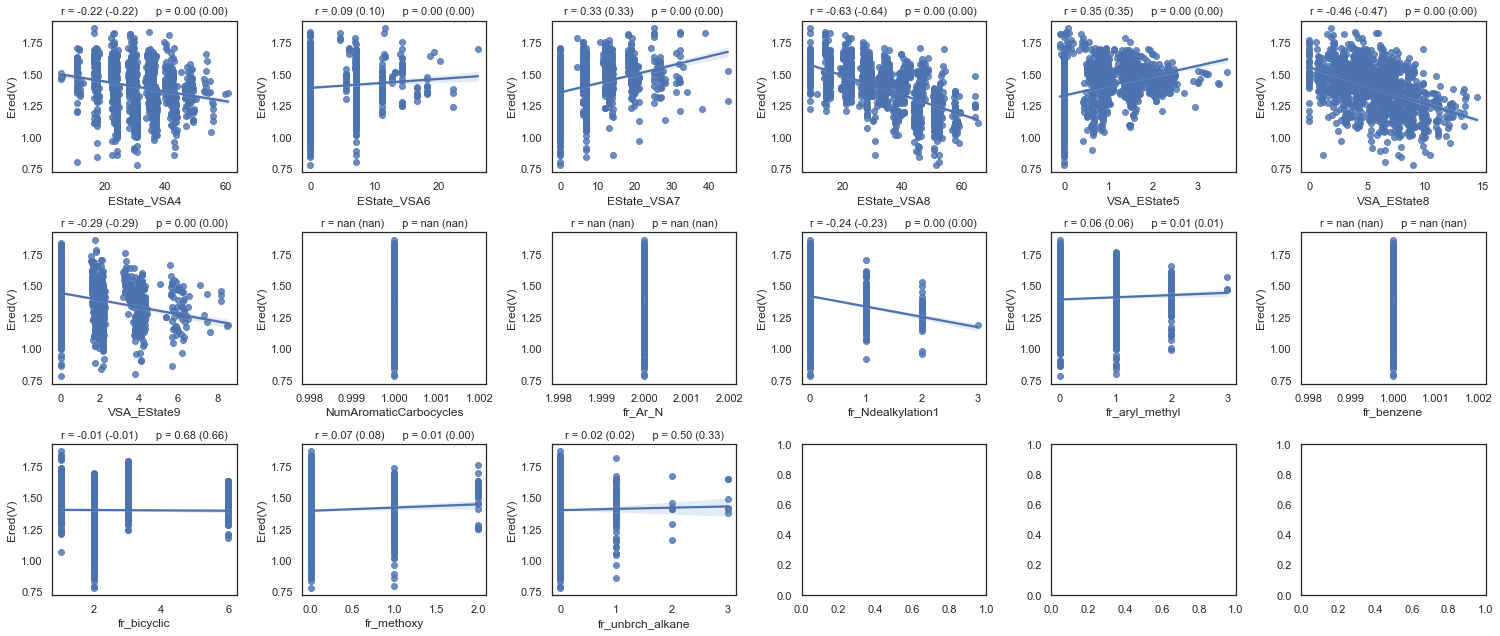

In [55]:
nr_rows=3;nr_cols=6
target='Ered(V)'

fig, axs = plt.subplots(nr_rows, nr_cols, figsize=(nr_cols*3.5,nr_rows*3))

for r in range(0,nr_rows):
    
    for c in range(0,nr_cols):  
        i = r*nr_cols+c+18+18
        
        if i < len(descriptors):
            
            sns.regplot(x=lof_no_outliers[descriptors[i]], y=df_bznsn_no_out_lof[target], ax = axs[r][c])
            
            stp = stats.pearsonr(lof_no_outliers[descriptors[i]], df_bznsn_no_out_lof[target])
            stp0 = stats.pearsonr(Xdata_bznsn_uncorr[descriptors[i]], df_bznsn[target])
            
            str_title = "r = " + "{0:.2f}".format(stp[0])+ " ({0:.2f})".format(stp0[0]) + "      " "p = " + "{0:.2f}".format(stp[1])+ " ({0:.2f})".format(stp0[1]) 
                        
            axs[r][c].set_title(str_title,fontsize=11)
            
plt.tight_layout()    
plt.savefig("./Figures/Ered_corr_after_lof3.png",dpi=300)

*After outlier removal via lof, the pearson coeff. increased in some cases*

**We'll systematically check each feature for better correlations with the target variable and with each other**

In [56]:
from sklearn.model_selection import train_test_split
# trainset, testset = train_test_split(lof_no_outliers, test_size = 0.30, random_state=42)
xtrain, xtest, ytrain, ytest = train_test_split(Xdata_bznsn_uncorr,df_bznsn,train_size=0.8) 

In [57]:
print(f"Shape of the xtrain = %s, ytrain = %s, xtest = %s, ytest = %s" %(xtrain.shape, ytrain.shape,xtest.shape,ytest.shape))

Shape of the xtrain = (1255, 51), ytrain = (1255, 2), xtest = (314, 51), ytest = (314, 2)


*We will do the preprocessing in a more compact way by using sklearn pipeline, which will contain the preprocessing steps and a fit call to the training algorithm.*

In [58]:
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
pipe = Pipeline(steps=[
    ('scaler',RobustScaler()), 
    ('estimator', RandomForestRegressor(n_estimators=2000))
                      ]
       )

*We will validate our model using 5-fold cross-validation.*

In [59]:
from sklearn.metrics import make_scorer, mean_squared_error
from sklearn.model_selection import cross_val_score

In [60]:
metric = make_scorer(mean_squared_error, squared=False) # RMSE
cross_score = cross_val_score(estimator=pipe, X=xtrain,scoring=metric, y=ytrain["Ered(V)"], cv=5)
print(f'Mean 5-fold RMSE = {cross_score.mean():.4f}')

Mean 5-fold RMSE = 0.0805


In [61]:
pipe.fit(xtrain,ytrain["Ered(V)"])

Pipeline(steps=[('scaler', RobustScaler()),
                ('estimator', RandomForestRegressor(n_estimators=2000))])

In [62]:
def get_preds(estimator, x):
    preds = estimator.predict(x)
    return preds

In [63]:
preds = pipe.predict(xtest)

In [64]:
print(f'RMSE test set = {mean_squared_error(preds, ytest["Ered(V)"], squared=False):.3f}')

RMSE test set = 0.074


*Random Forest predicts the unseen \del_Ered with the RMSE of 0.13 V*

*No overfitting*

*Let's remove unnecessary (non-informative) features*

*What happens if we only have non-informative features in the dataset? What performance could we expect? Intuitively, one would say RMSE >> 0. Let's test that by randomizing the rows of the target variable vector, which will make every feature non-informative.*

In [65]:
yrandom = np.random.choice(ytrain["Ered(V)"],ytrain["Ered(V)"].shape[0])

In [66]:
pipe.fit(xtrain,yrandom)
preds_random = pipe.predict(xtest)
print(f'RMSE (randomized target) test set = {mean_squared_error(preds_random, ytest["Ered(V)"], squared=False)}')

RMSE (randomized target) test set = 0.1777100982530036


**As you can see, the RMSE on the test set does increase (0.07 to 0.20 V). In a data set with dozens or even hundreds of features, which is relatively common in QSAR applications, we would expect much higher errors. That's why it's so important to analyze your features carefully in order to remove anything that could hamper performance, including missing or constant values and highly correlated features.**

# Feature selection

Method 1: Filter Method

- *Filter methods are the easiest to implement because they are model-agnostic, which means we don't need any fancy learning algorithm. This class of methods consists of statistical approaches that use the distribution of the dataset to remove features that don't have much information or correlation with the target variable. Since we don't need a model, filter methods are very fast and can give an initial guess of what types of features to keep.*

- *Despite being fast, filter methods also come with some dangerous drawbacks. Since most methods are univariate, important correlations between features may be missed; or worse redudant features could be selected. In addition, most metrics (e.g. Pearson's correlation coefficient) used to select the features are subjective and not always correlate with the metric that will be used to access performance.*

***Basic approaches are purely statistical and consits of removing constant or quasi-constant features from the dataset.***

**1.1 Remove constant features using variance threshold**

In [67]:
from sklearn.feature_selection import VarianceThreshold, mutual_info_regression

selector = VarianceThreshold()
scaler = RobustScaler()

xnorm = scaler.fit(xtrain).transform(xtrain)

reducer = VarianceThreshold()
reducer.fit(xnorm)

print(sum(reducer.get_support()))

43


In [68]:
print(xtrain.shape)

(1255, 51)


*No feature was removed*

*features with less than 1% variance*

In [69]:
reducer = VarianceThreshold(threshold=0.01)
reducer.fit(xnorm)
sum(reducer.get_support())

43

*features: 51 --> 43*

***Let's try more robust methods!***

**1.2) Univariate selection methods**

**Mutual information is a linear approach that quantifies the amount of information obtained about one random variable using another random variable.**

*$$ \begin{align} I(X; Y) = \int_X \int_Y p(x, y) \log \frac{p(x, y)}{p(x) p(y)} dx dy \end{align} $$*

*If the joint distribution p(x,y) of variables X and Y equals the individual probabilities p(x) and p(y), the variables are considered independent and the integral is 0. Therefore, our goal is to find variables that are somehow correlated with the dependent variable (Y) that with maximum information content.*

In [70]:
from sklearn.feature_selection import mutual_info_regression
importances = mutual_info_regression(xtrain, ytrain["Ered(V)"])

In [71]:
df_importances = pd.DataFrame(importances,index=descriptors)

In [72]:
df_importances.sort_values(0,ascending=False).head(10)

0
BCUT2D_MRHI     0.639434
tpsa            0.512538
SMR_VSA10       0.508405
PEOE_VSA9       0.455257
EState_VSA8     0.431116
BCUT2D_LOGPLOW  0.413828
PEOE_VSA8       0.412359
exactmw         0.350161
qed             0.303086
MaxEStateIndex  0.298029

***We can also use the mutual information as metric in the sklearn SelectKBest class***

In [73]:
from sklearn.feature_selection import SelectKBest
kbest = SelectKBest(score_func=mutual_info_regression)
xkbest = kbest.fit_transform(xtrain, ytrain["Ered(V)"])

In [74]:
np.array(descriptors)[kbest.get_support()]

array(['exactmw', 'tpsa', 'MaxEStateIndex', 'BCUT2D_LOGPLOW',
       'BCUT2D_MRHI', 'PEOE_VSA8', 'PEOE_VSA9', 'SMR_VSA10',
       'EState_VSA4', 'EState_VSA8'], dtype=object)

# Wrapper methods

**Wrapper methods consists of using models to decide if a feature should be added or removed. The main idea is to find a subset of features that maximize the performance. In this class of methods we have forward/backward selection and recursive feature elimination (RFE). Another way to understand wrapper methods is to think of them as search algorithms, with the features representing the search space and model performance as the target metric.**

*2.1 Forward Selection*

*In forward selection we start with 0 features and then add one at a time to evaluate the performance. If the performance on iteration i+1 is better than the previous i^{th} iteration, we keep the new feature. The algorithm stops when the addition of new features does not lead to an increase in performance*

In [75]:
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.svm import SVR
from functools import partial
from sklearn.neighbors import KNeighborsRegressor
from sklearn.feature_selection import SequentialFeatureSelector

In [76]:
pipe_ffs = Pipeline(steps=[('scaler',RobustScaler()), ('estimator', LinearRegression())])

In [77]:
ssf = SequentialFeatureSelector(estimator=pipe_ffs,n_features_to_select=15,cv=5, direction='forward',scoring='neg_mean_squared_error')

In [78]:
ssf.fit(xtrain, ytrain["Ered(V)"])

SequentialFeatureSelector(estimator=Pipeline(steps=[('scaler', RobustScaler()),
                                                    ('estimator',
                                                     LinearRegression())]),
                          n_features_to_select=15,
                          scoring='neg_mean_squared_error')

In [79]:
selected_features_ssf = np.array(descriptors)[ssf.get_support()]

In [80]:
selected_features_ssf

array(['NumHeterocycles', 'CrippenClogP', 'MaxEStateIndex', 'BCUT2D_MRHI',
       'BalabanJ', 'PEOE_VSA10', 'PEOE_VSA12', 'PEOE_VSA13', 'PEOE_VSA9',
       'SMR_VSA10', 'SlogP_VSA6', 'EState_VSA3', 'EState_VSA8',
       'VSA_EState5', 'fr_Ndealkylation1'], dtype=object)

*2.2) Backward selection*

**We can also do backward selection with SequentialFeatureSelector. In this method, we start with the whole set of features and remove at each step the ones that do not improve the model.**

In [81]:
ssf_backward = SequentialFeatureSelector(estimator=pipe_ffs,n_features_to_select=15,cv=5, direction='backward',scoring='neg_mean_squared_error')

In [82]:
ssf_backward.fit(xtrain, ytrain["Ered(V)"])

SequentialFeatureSelector(direction='backward',
                          estimator=Pipeline(steps=[('scaler', RobustScaler()),
                                                    ('estimator',
                                                     LinearRegression())]),
                          n_features_to_select=15,
                          scoring='neg_mean_squared_error')

In [83]:
selected_features_ssf = np.array(descriptors)[ssf_backward.get_support()]
print(selected_features_ssf)

['lipinskiHBA' 'lipinskiHBD' 'tpsa' 'BCUT2D_MRHI' 'PEOE_VSA11' 'PEOE_VSA6'
 'SMR_VSA10' 'SlogP_VSA6' 'EState_VSA6' 'EState_VSA7' 'EState_VSA8'
 'VSA_EState8' 'VSA_EState9' 'fr_Ndealkylation1' 'fr_methoxy']


In [84]:
len(selected_features_ssf)

15

***2.3) Recursive feature elimination***

*Recursive feature elimination is another backward selection method but with the benefit of not fitting models using the same data multiple times. The first step consists of training the model on the full set of features. Then, the performance is calculated and the features are ranked in order of importance. The method iteratively removes features that are not important and rebuilds the model to estimate its performance and ranking of the remaining features. The process stops when a predefined number of features is reached.*

In [85]:
from sklearn.feature_selection import RFE, RFECV

In [86]:
xnorm = scaler.fit_transform(xtrain)
rfe = RFECV(estimator=LinearRegression(), cv=5, step=1)

In [87]:
rfe.fit(xnorm, ytrain["Ered(V)"])

RFECV(cv=5, estimator=LinearRegression())

In [88]:
np.array(descriptors)[rfe.support_], rfe.ranking_

(array(['exactmw', 'lipinskiHBA', 'lipinskiHBD', 'NumRotatableBonds',
        'NumRings', 'NumHeterocycles', 'tpsa', 'CrippenClogP',
        'MinEStateIndex', 'BCUT2D_LOGPLOW', 'BCUT2D_MRHI', 'BalabanJ',
        'PEOE_VSA11', 'PEOE_VSA13', 'PEOE_VSA2', 'PEOE_VSA6', 'PEOE_VSA8',
        'SMR_VSA10', 'SMR_VSA3', 'SlogP_VSA3', 'SlogP_VSA6', 'EState_VSA6',
        'EState_VSA7', 'EState_VSA8', 'VSA_EState5', 'VSA_EState8',
        'VSA_EState9', 'fr_Ndealkylation1', 'fr_methoxy'], dtype=object),
 array([ 1,  1,  1,  1,  1, 16,  1, 18, 15,  1,  1,  5,  1,  4,  9,  1,  1,
         1, 13,  1, 14,  1,  1, 17,  1,  1, 12,  1,  1,  7, 19,  1,  6,  1,
        20,  8,  2,  1,  1,  1,  1,  1,  1, 21, 22,  1, 10, 23, 11,  1,  3]))

#  Intrinsic methods - selecting directly from a model

*3.1) Random Forest*

*Random forest is a learning algorithm that uses the average response of an ensemble of decision trees to make a prediction. Each tree considers a random subset of the features in order to make its predictions. At each node, the algorithm tries to minimize the impurity of a split or maximize its gain, which is similar to reducing the number of wrong predictions. We can use the average decrease in impurity of the trees at each split to rank the features the model considered most important to make its decision.*

In [89]:
from sklearn.ensemble import RandomForestRegressor

In [90]:
rf = RandomForestRegressor(n_estimators=2000)

In [91]:
rf.fit(xtrain, ytrain["Ered(V)"])

RandomForestRegressor(n_estimators=2000)

In [92]:
importances = rf.feature_importances_.reshape(1,-1)

In [93]:
def rf_feat_importance(model, feats_names):
    return pd.DataFrame({'cols':feats_names, 'imp':model.feature_importances_}).sort_values('imp',ascending=False)

In [94]:
fi = rf_feat_importance(rf, descriptors)
# fi

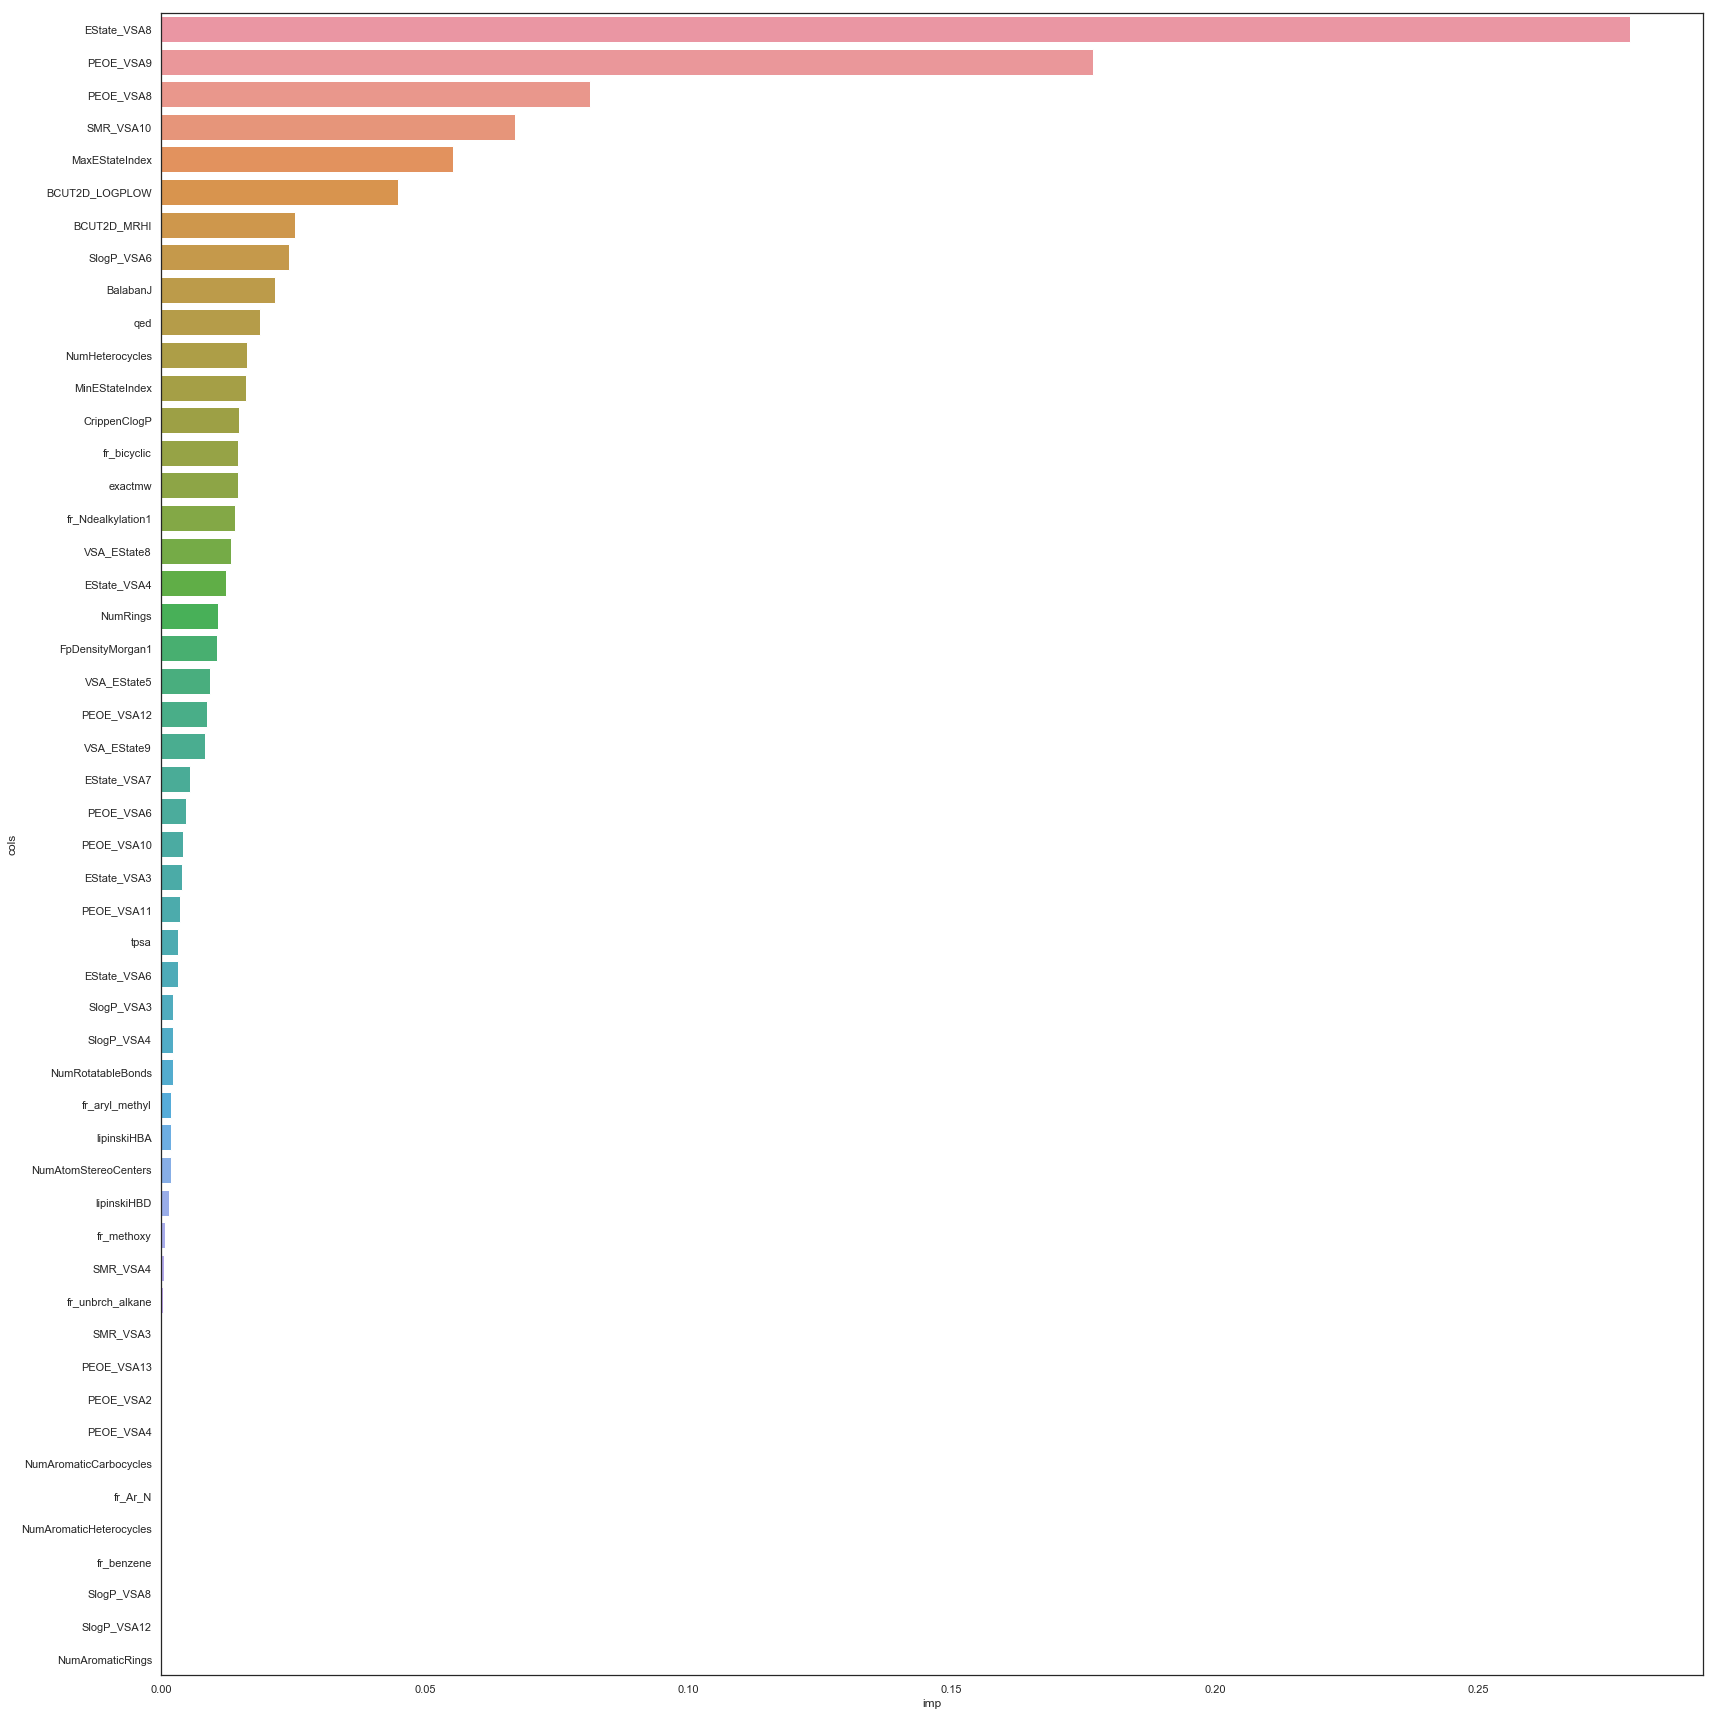

In [95]:

sns.set(rc={"figure.figsize":(24, 24)}) 
sns.set(style='white')
sns.barplot(y='cols', x='imp',data=fi)
plt.tight_layout()
plt.savefig("./Figures/fig_feature_imp_Esol.png",dpi=300)

In [96]:
# sns.barplot(y='cols', x='imp',data=fi[fi["imp"]>0.01])
# plt.tick_params(axis="both", labelsize=30)
# plt.tight_layout() 
# plt.savefig("fig_feature_imp_Esol2.png",dpi=300)

*The relative importance is normalized to sum up to 1.0. Features with higher importances are assigned higher values.*

**Lasso**

*LASSO is a linear model trained with L1 regularization in order to reduce model complexity. By "reduce complexity" I mean make the model simpler to gain a boost in generalization. LASSO achieves regularization by using the L1 norm*

*The L1 norm consists of adding the sum of the absolute values of the weights or coefficients to the cost function (e.g. sum of squared errors in a regression problem). In practice regularization forces the model to learn smaller weights, which is a way of making it simpler. Under L1 norm, most weights will be zero and as a result the weight vector will be sparse. Thus, the sparcitiy of the feature vector makes LASSO a great tool for feature selection since most unimportant features will be zeroed out.*

In [97]:
from sklearn.linear_model import Lasso

*The alpha (or lambda) hyperparameter is a penalization term. If alpha = 0, LASSO becomes ordinary least square (e.g. LinearRegression). The default value is 1.0 but we will reduce it in order to make the model more flexible and not zero out all features*

In [98]:
pipe_lasso = Pipeline(steps=[('scaler',RobustScaler()), ('estimator', Lasso(alpha=0.05))])

In [99]:
pipe_lasso.fit(xtrain, ytrain["Ered(V)"])

Pipeline(steps=[('scaler', RobustScaler()), ('estimator', Lasso(alpha=0.05))])

In [100]:
feature_coef = pipe_lasso.named_steps.estimator.coef_

In [101]:
feature_coef

array([-0.        , -0.        , -0.        , -0.        , -0.        ,
        0.        , -0.        ,  0.        , -0.        ,  0.        ,
       -0.        ,  0.01269584, -0.        , -0.00996062,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
       -0.        , -0.03709831, -0.        ,  0.        , -0.        ,
        0.        ,  0.        , -0.        ,  0.        ,  0.        ,
        0.        , -0.        ,  0.        ,  0.        , -0.00617194,
        0.        , -0.        , -0.        ,  0.        ,  0.        ,
       -0.        ,  0.        ,  0.        , -0.        ,  0.        ,
        0.        ])

In [102]:
np.array(descriptors)[np.where(feature_coef!=0.)[0]]

array(['MaxEStateIndex', 'qed', 'PEOE_VSA9', 'EState_VSA8'], dtype=object)

*The LASSO esimator zeroed out most features. It seems only 3 features survived with alpha = 0.05. if alpha=1, then all feature coeff. will be zero*

**Now to select the feature, check which features are recommend by different methods. Also, include different types of features like topological, physiochemical if they appear in any of the methods**

In [103]:
descriptors_reduced=fi[fi["imp"]>0.005]["cols"].to_list()
print(len(descriptors_reduced))
print(descriptors_reduced)

24
['EState_VSA8', 'PEOE_VSA9', 'PEOE_VSA8', 'SMR_VSA10', 'MaxEStateIndex', 'BCUT2D_LOGPLOW', 'BCUT2D_MRHI', 'SlogP_VSA6', 'BalabanJ', 'qed', 'NumHeterocycles', 'MinEStateIndex', 'CrippenClogP', 'fr_bicyclic', 'exactmw', 'fr_Ndealkylation1', 'VSA_EState8', 'EState_VSA4', 'NumRings', 'FpDensityMorgan1', 'VSA_EState5', 'PEOE_VSA12', 'VSA_EState9', 'EState_VSA7']


In [104]:
Xdata_reduced=Xdata_bznsn_uncorr[descriptors_reduced]
# Xdata_reduced

In [105]:
xtrain, xtest, ytrain, ytest = train_test_split(Xdata_reduced,df_bznsn,train_size=0.8) 

In [106]:
metric = make_scorer(mean_squared_error, squared=False) # RMSE
cross_score = cross_val_score(estimator=pipe, X=xtrain,scoring=metric, y=ytrain["Ered(V)"], cv=5)
print(f'Mean 5-fold RMSE = {cross_score.mean():.4f}')


Mean 5-fold RMSE = 0.0769


In [107]:
pipe.fit(xtrain,ytrain["Ered(V)"])

Pipeline(steps=[('scaler', RobustScaler()),
                ('estimator', RandomForestRegressor(n_estimators=2000))])

In [108]:
def get_preds(estimator, x):
    preds = estimator.predict(x)
    return preds
preds = pipe.predict(xtest)

print(f'RMSE test set = {mean_squared_error(preds, ytest["Ered(V)"], squared=False):.3f}')

RMSE test set = 0.085


*Model RandomForestRegressor*

*Before feature selection: RMSE CV = 0.0805 V and Test = 0.074 V*

*After feature selection: RMSE CV = 0.0787 V and Test = 0.076 V*

# **PCA**

C:\Users\jaina\AppData\Roaming\Python\Python37\site-packages\matplotlib\cbook\__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "


No. of PC           Cumulative variance                                                             
--------------------------------------------------
1                   0.720117                                                                        
2                   0.843597                                                                        
3                   0.905774                                                                        
4                   0.944895                                                                        
5                   0.965179                                                                        
6                   0.982357                                                                        
7                   0.988770                                                                        
8                   0.994733                                                                        
9                   0.997002            

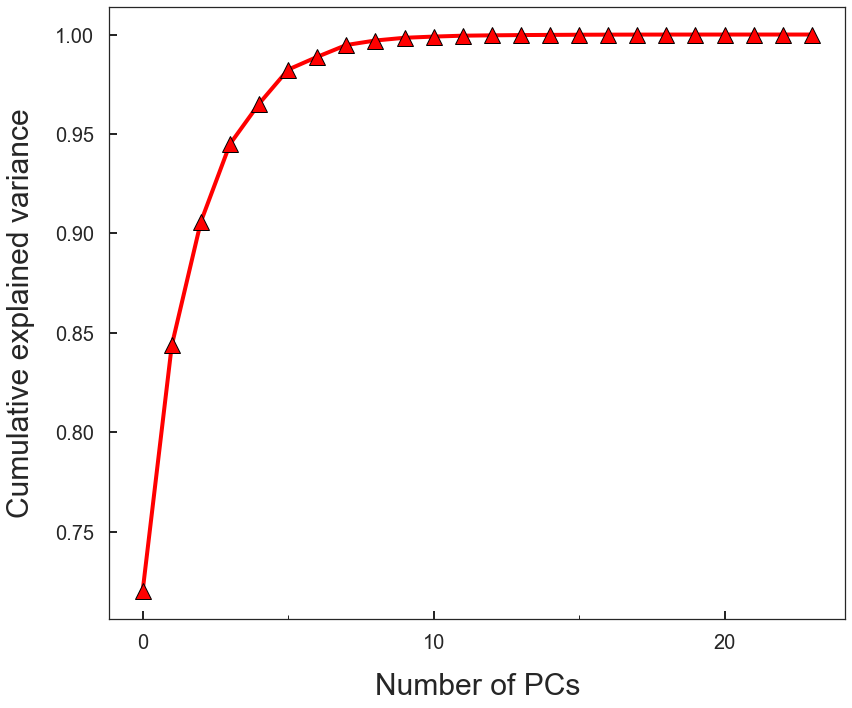

In [109]:
from sklearn.decomposition import PCA # Principle component analysis
import matplotlib.pyplot as plt  
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter, AutoMinorLocator)
pca = PCA().fit(Xdata_reduced)

#Plotting
fig, ax1 = plt.subplots()
ax1.set_xlabel('Number of PCs', fontsize=30,labelpad=20)
ax1.set_ylabel('Cumulative explained variance', fontsize=30,labelpad=20)
ax1.xaxis.set_major_locator(MultipleLocator(10))
ax1.xaxis.set_minor_locator(MultipleLocator(5))
ax1.tick_params(axis='both', which='major', direction='in', size=8, left='on', bottom='on', width=2, pad=15)
ax1.tick_params(axis='both', which='minor', direction='in', size=4, left='on', bottom='on',width=1, pad=15)
ax1.tick_params(axis="y", labelsize=20)
ax1.tick_params(axis="x", labelsize=20)

plt.gcf().set_size_inches((12, 10))
evr = np.cumsum(pca.explained_variance_ratio_)
ax1.plot(evr, marker='^',markersize=16, markeredgecolor='black', 
         linestyle='-',linewidth=4, color='red')   # Plotting
plt.tight_layout()
plt.savefig("./Figures/Xdata_reduced_pca.png",dpi=300)
print('{:<20s}{:<80s}'.format('No. of PC','Cumulative variance'))
print(50*'-')
for i,a in enumerate(evr):
    if a<=1:
        print('{:<20d}{:<80f}'.format(i+1,a))

C:\Users\jaina\AppData\Roaming\Python\Python37\site-packages\matplotlib\cbook\__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "


No. of PC           Cumulative variance                                                             
--------------------------------------------------
1                   0.608292                                                                        
2                   0.745813                                                                        
3                   0.818784                                                                        
4                   0.862441                                                                        
5                   0.891368                                                                        
6                   0.914774                                                                        
7                   0.933733                                                                        
8                   0.947023                                                                        
9                   0.958886            

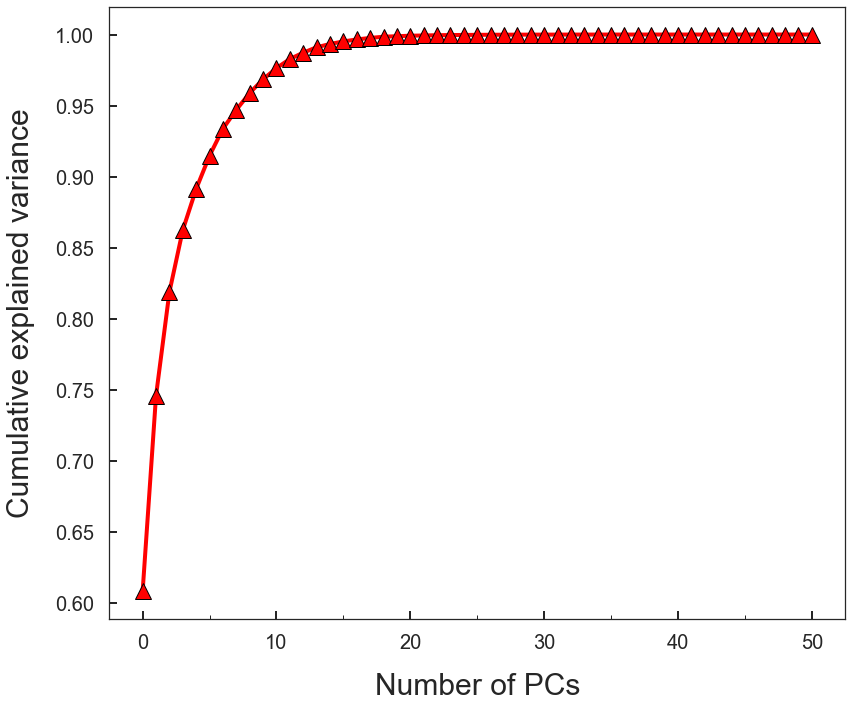

In [110]:
from sklearn.decomposition import PCA # Principle component analysis
import matplotlib.pyplot as plt  
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter, AutoMinorLocator)
pca = PCA().fit(Xdata_bznsn_uncorr)

#Plotting
fig, ax1 = plt.subplots()
ax1.set_xlabel('Number of PCs', fontsize=30,labelpad=20)
ax1.set_ylabel('Cumulative explained variance', fontsize=30,labelpad=20)
ax1.xaxis.set_major_locator(MultipleLocator(10))
ax1.xaxis.set_minor_locator(MultipleLocator(5))
ax1.tick_params(axis='both', which='major', direction='in', size=8, left='on', bottom='on', width=2, pad=15)
ax1.tick_params(axis='both', which='minor', direction='in', size=4, left='on', bottom='on',width=1, pad=15)
ax1.tick_params(axis="y", labelsize=20)
ax1.tick_params(axis="x", labelsize=20)

plt.gcf().set_size_inches((12, 10))
evr = np.cumsum(pca.explained_variance_ratio_)
ax1.plot(evr, marker='^',markersize=16, markeredgecolor='black', 
         linestyle='-',linewidth=4, color='red')   # Plotting
plt.tight_layout()
plt.savefig("./Figures/Xdata_bznsn_uncorr_pca.png",dpi=300)
print('{:<20s}{:<80s}'.format('No. of PC','Cumulative variance'))
print(50*'-')
for i,a in enumerate(evr):
    if a<=1:
        print('{:<20d}{:<80f}'.format(i+1,a))

# Test predictions from Xreduced and X_uncorr

In [111]:
from sklearn.gaussian_process.kernels import DotProduct, WhiteKernel
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C ,WhiteKernel as Wht,Matern as matk
from sklearn.preprocessing import StandardScaler 
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA


import torch, gpytorch
from matplotlib import pyplot as plt
from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error as MAE

In [112]:
def plot_gpr_results(y_true,y_pred,y_pred_err=None,err_bar=False,label="test",color="blue",showfig=True,savefig=False,filename="gpr_pred.png",data=True):
    """
    Return r2,rmse and mae score if data = True
    Show image if showfig=True
    Save image if savefig=True
    """
    from matplotlib import pyplot as plt
    from sklearn.metrics import mean_squared_error as MSE
    from sklearn.metrics import r2_score
    from sklearn.metrics import mean_absolute_error as MAE
    mae_test = round(MAE(y_true,y_pred),2)
    r2_test = round(r2_score(y_true,y_pred),2)
    rmse_test = round(np.sqrt(MSE(y_true,y_pred)),2)

    print(f"(%s: R2 = %0.2f, RMSE = %0.2f, MAE = %0.2f)" %(label,r2_test,rmse_test,mae_test))    
    
    if showfig:
        # plt.scatter(y_true,y_pred,color=color,label=label)
        if err_bar*(y_pred_err is not None):
            plt.errorbar(y_true,y_pred,yerr=y_pred_err,color=color,fmt='o',label=label)
        plt.plot([1,2],[1,2],color='black')
        string="MAE ="+str(mae_test)
        plt.text(1.0,1.90,string)
        string="$R^2$ ="+str(r2_test)
        plt.text(1.0,1.80,string)
        string="RMSE ="+str(rmse_test)
        plt.text(1.0,1.70,string)
        plt.xlabel('True values')
        plt.ylabel('Predicted values')
        plt.legend(loc='lower right') #best
        print("min error =", round(y_pred_err.min(),2),"max_err", round(y_pred_err.max(),2))
        if savefig:
            plt.savefig(filename,dpi=300,bbox_inches='tight')
        plt.show()
    if data:
        return r2_test,rmse_test,mae_test


In [113]:
# Machine learning-realated functions
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler # For normalizing inputs
from sklearn.decomposition import PCA # Principle component analysis

def do_scaling(scaler=StandardScaler(), xtrain=None, xtest=None):
    """
    Usage: do_scaling(scaler=MinMaxScaler(), xtrain=xtrain, xtest=test) 
    Caution: Do test_train_split before scaling
    Return: return scaled non-None xtrain and xtest
    """
    st = scaler

    if xtrain is not None:
        # col=xtrain.columns.values.tolist()
        xtrain=st.fit_transform(xtrain)  
        # xtrain=pd.DataFrame(xtrain,columns=col)

        if xtest is not None:
            
            xtest=st.transform(xtest)
            # xtest=pd.DataFrame(xtest,columns=col)
            print("returning scaled train and test data")
            return xtrain,xtest
        else:
            print("test data is not provided, returning only scaled train data")
            return xtrain
    else:
        print("Give train data, returning None")
        return xtrain,xtest

def do_pca(xtrain=None, xtest=None, rvar=0.95):
    """
    Usage: do_pca(xtrain=xtrain, xtest=test) 
    Caution: Do test_train_split and scaling before pca
    Return: Transformed xtrain and xtest if they are not None
    """
    
    if xtrain is not None:
        
        pca = PCA().fit(xtrain)
        evr = np.cumsum(pca.explained_variance_ratio_)
        n_comp = 1+np.nonzero(evr > rvar)[0][0]

        print(str(n_comp)+" principal components can describe > "+ str(rvar*100)+ "% of variance in the data")
        print("Selected "+str(n_comp)+" components for PCA")
        
        # col=[]
        # for i in range(1,1+n_comp,1):
        #     col.append("PC"+str(i))

        pca = PCA(n_components=n_comp)
        xtrain = pca.fit_transform(xtrain) 
        # xtrain=pd.DataFrame(xtrain,columns=col)

        if xtest is not None:
            
            xtest=pca.transform(xtest)
            # xtest=pd.DataFrame(xtest,columns=col)
            print("returning pca transformed train and test data")
            return xtrain,xtest
        else:
            print("test data is not provided, returning only transformed train data")
            return xtrain
    else:
        print("Give train data, returning None")
        return xtrain,xtest

In [114]:
def gpregression_feat(Xtrain,Ytrain,Nfeature):    
    # cmean=1.0
    # cbound=[1e-3, 1e3]
    cmean=[1.0]*Nfeature
    cbound=[[1e-3, 1e3]]*Nfeature
    kernel = C(1.0, (1e-3,1e3)) * matk(cmean,cbound,1.5) + Wht(1.0, (1e-3, 1e3))  # Matern kernel
    gpr = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=30, normalize_y=False)
    gpr.fit(Xtrain, Ytrain)
    return gpr

def gpregression(Xtrain,Ytrain,Nfeature):    
    cmean=1.0
    cbound=[1e-3, 1e3]
    # cmean=[1.0]*Nfeature
    # cbound=[[1e-3, 1e3]]*Nfeature
    kernel = C(1.0, (1e-3,1e3)) * matk(cmean,cbound,1.5) + Wht(1.0, (1e-3, 1e3))  # Matern kernel
    gpr = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=30, normalize_y=False)
    gpr.fit(Xtrain, Ytrain)
    return gpr

    
def gprediction(gpnetwork,xtest):
    y_pred, sigma = gpnetwork.predict(xtest, return_std=True)
    return y_pred, sigma

In [115]:

def gpregression_pytorch(X_train,y_train,num_iter=200,learning_rate=0.1,verbose=False):
    
    """
    Gaussian Process Regression implementation with the GPyTorch
    
    Input: gpregression_pytorch(X_train,y_train,num_iter,learning_rate)
    
    Retrun: trained_model, trained_likelihood

    """
    # nfeatures=X_train.shape[1]
    train_x=torch.from_numpy(np.array(X_train))
    train_y=torch.from_numpy(np.array(y_train))
    torch.set_default_dtype(torch.float64)

    # We will use the simplest form of GP model, exact inference
    class ExactGPModel(gpytorch.models.ExactGP):

        def __init__(self, train_x, train_y, likelihood):
            super(ExactGPModel, self).__init__(train_x, train_y, likelihood)
            self.mean_module = gpytorch.means.ConstantMean()
            # self.covar_module = gpytorch.kernels.ScaleKernel(gpytorch.kernels.RBFKernel()) # can modify this
            # self.covar_module = ScaleKernel(ScaleKernel(RBFKernel()))
            # self.covar_module = ScaleKernel(ScaleKernel(RBFKernel() + LinearKernel())) 
            # self.covar_module = gpytorch.kernels.ScaleKernel(gpytorch.kernels.MaternKernel()) 
            self.covar_module = gpytorch.kernels.ScaleKernel(gpytorch.kernels.MaternKernel(nu=1.5))
            # self.covar_module = ScaleKernel(PeriodicKernel()+MaternKernel())
            # self.covar_module = ScaleKernel(RBFKernel())
        
        def forward(self, x):
            mean_x = self.mean_module(x)
            covar_x = self.covar_module(x)
            return gpytorch.distributions.MultivariateNormal(mean_x, covar_x)

    # initialize likelihood and model
    likelihood = gpytorch.likelihoods.GaussianLikelihood()
    model = ExactGPModel(train_x, train_y, likelihood)

    # this is for running the notebook in our testing framework
    import os
    smoke_test = ('CI' in os.environ)
    training_iter = 2 if smoke_test else num_iter


    # Find optimal model hyperparameters
    model.train()
    likelihood.train()

    # Use the adam optimizer # for hyperparameter tuning
    optimizer = torch.optim.Adam([
        {'params': model.parameters()},  # Includes GaussianLikelihood parameters
    ], lr=learning_rate)

    # "Loss" for GPs - the marginal log likelihood
    mll = gpytorch.mlls.ExactMarginalLogLikelihood(likelihood, model)

    for i in range(training_iter):
        # Zero gradients from previous iteration
        optimizer.zero_grad()
        # Output from model
        output = model(train_x)
        # Calc loss and backprop gradients
        loss = -mll(output, train_y)
        loss.backward()
        if verbose*1*((i+1)%50==0 or i==0):
            print('Iter %d/%d - Loss: %.3f   lengthscale: %.3f   noise: %.3f' % (i + 1, training_iter, loss.item(),model.covar_module.base_kernel.lengthscale.item(),model.likelihood.noise.item()))
            # print('Iter %d/%d - Loss: %.3f    noise: %.3f' % (i + 1, training_iter, loss.item(),model.likelihood.noise.item()))
        optimizer.step()

    # Get into evaluation (predictive posterior) mode
    model.eval()
    likelihood.eval()

    return model,likelihood

def gprediction_pytorch(model,likelihood,X_test):
    
    """
    Gaussian Process Predictions with gpr_pytorch
    
    Use: 
    model, likelihood = gpregression_pytorch(X_train,y_train,num_iter=200,learning_rate=0.1)  
    ypred, ysigma = gprediction__pytorch(model,likelihood,X_test)

    Return: ypred and ysigma numpy arrays
    
    """
    # Get into evaluation (predictive posterior) mode
    model.eval()
    likelihood.eval()
    # Make predictions by feeding model through likelihood
    with torch.no_grad(), gpytorch.settings.fast_pred_var():
        test_x = torch.from_numpy(np.array(X_test))
        torch.set_default_dtype(torch.float64)
        observed_pred = likelihood(model(test_x))
        ypred = observed_pred.mean.numpy()
        ysigma = observed_pred.stddev.numpy()
    return ypred,ysigma

In [116]:
def learn_train_by_test(X,y,n_PC):

    # X = Xdata_flav
    # y = df_flav['∆Eoxi(V)']
    # y = df_flav['∆Esol(eV)']

    train_by_test = np.arange(0.1,1.0,0.1)

    avg_train_score = np.zeros([len(train_by_test),3])
    avg_test_score = np.zeros([len(train_by_test),3])

    std_train_score = np.zeros([len(train_by_test),3])
    std_test_score = np.zeros([len(train_by_test),3])


    for idx,tr_by_te in enumerate(train_by_test):
        
        
        repeat=10
        score_test = np.zeros([repeat,3])
        score_train = np.zeros([repeat,3])

        # Start print
        print(f"----------- Start %s/%s ---------------------" %(idx+1,len(train_by_test)))
        
        # K-fold Cross Validation model evaluation
        for  count in np.arange(repeat):
            print(f"----------- Repeat %s/%s ---------------------" %(count+1,repeat))
            # split train and test datasets; new splitting each time
            # Xdata: from PCA
            
            X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=tr_by_te) 
            # print(type(X_train))
            xtrain, xtest = np.array(X_train), np.array(X_test)
            ytrain, ytest = np.array(y_train), np.array(y_test)
        
            
            # scale data
            xtrain, xtest = do_scaling(scaler=StandardScaler(),xtrain=xtrain, xtest=xtest)
            # PCA
            n_PC = n_PC  # Set number of principle components
            pca = PCA(n_components=n_PC)
                
            xtrain = pca.fit_transform(xtrain) 
            xtest=pca.transform(xtest)
            # xtrain, xtest = do_pca(xtrain=xtrain, xtest=xtest,rvar=0.999951)
            # print(f"number of PCA components = {xtest.shape[1]}")
            # Model training
            # Model training
            model, likelihood = gpregression_pytorch(xtrain,ytrain,verbose=False)
            
            # prediction on validation set
            ypred_test, _ = gprediction_pytorch(model,likelihood,xtest)
            ypred_train, _ = gprediction_pytorch(model,likelihood,xtrain)
            
            # gpnetwork = myfn.gpregression(Xtrain=xtrain,Ytrain=ytrain,Nfeature=xtrain.shape[1])
            # ypred_test, _ = myfn.gprediction(gpnetwork,xtest)
            # ypred_train, _ = myfn.gprediction(gpnetwork,xtrain)
            # prediction on validation set

        
            # save scores
            score_test[count] = plot_gpr_results(y_true=ytest,y_pred=ypred_test,label="test",showfig=False)
            score_train[count] = plot_gpr_results(y_true=ytrain,y_pred=ypred_train,label="train",showfig=False)
        
        # print average score on CV set
        avg_test_score[idx], std_test_score[idx] = score_test.mean(axis=0), score_test.std(axis=0)
        avg_train_score[idx], std_train_score[idx] = score_train.mean(axis=0), score_train.std(axis=0)       

    return train_by_test,avg_train_score, std_train_score, avg_test_score,std_test_score


In [117]:
def plot_r2_gpr(avg_test_score,avg_train_score,std_test_score,std_train_score,filename="r2_score_gpr.png"):
    
    plt.figure(figsize=(6, 6)) 
    print(f"test average R2={np.round(avg_test_score[:,0],2)}, STD R2={np.round(std_test_score[:,0],2)}")
    print(f"train average R2={np.round(avg_train_score[:,0],2)}, STD R2={np.round(std_train_score[:,0],2)}")
    
    plt.plot(train_by_test,avg_test_score[:,0],label="test",color="blue")
    plt.plot(train_by_test,avg_train_score[:,0],label="train",color="red")

    plt.scatter(train_by_test,avg_test_score[:,0],color="blue")
    plt.errorbar(train_by_test,avg_test_score[:,0],yerr=std_test_score[:,0],color="blue")
    plt.scatter(train_by_test,avg_train_score[:,0],color="red")
    plt.errorbar(train_by_test,avg_train_score[:,0],yerr=std_train_score[:,0],color="red")
    plt.xlabel("train/test")
    plt.ylabel("R$^2$")
    plt.legend()
    plt.tight_layout()
    plt.savefig(filename,dpi=300)
    plt.show()

def plot_rmse_gpr(avg_test_score,avg_train_score,std_test_score,std_train_score,filename="rmse_score_gpr.png"):
    plt.figure(figsize=(6, 6)) 
    print(f"test average RMSE={np.round(avg_test_score[:,1],2)}, STD RMSE={np.round(std_test_score[:,1],2)}")
    print(f"train average RMSE={np.round(avg_train_score[:,1],2)}, STD RMSE={np.round(std_train_score[:,1],2)}")
    plt.plot(train_by_test,avg_test_score[:,1],label="test",color="blue")
    plt.plot(train_by_test,avg_train_score[:,1],label="train",color="red")

    plt.scatter(train_by_test,avg_test_score[:,1],color="blue")
    plt.errorbar(train_by_test,avg_test_score[:,1],yerr=std_test_score[:,1],color="blue")
    plt.scatter(train_by_test,avg_train_score[:,1],color="red")
    plt.errorbar(train_by_test,avg_train_score[:,1],yerr=std_train_score[:,1],color="red")
    plt.xlabel("train/test")
    plt.ylabel("RMSE")
    plt.legend()
    plt.tight_layout()
    plt.savefig(filename,dpi=300)
    plt.show()

def plot_mae_gpr(avg_test_score,avg_train_score,std_test_score,std_train_score,filename="mae_score_gpr.png"):
    plt.figure(figsize=(6, 6)) 
    print(f"test average MAE={np.round(avg_test_score[:,2],2)}, STD MAE={np.round(std_test_score[:,2],2)}")
    print(f"train average MAE={np.round(avg_train_score[:,2],2)}, STD MAE={np.round(std_train_score[:,2],2)}")
    plt.plot(train_by_test,avg_test_score[:,2],label="test",color="blue")
    plt.plot(train_by_test,avg_train_score[:,2],label="train",color="red")

    plt.scatter(train_by_test,avg_test_score[:,2],color="blue")
    plt.errorbar(train_by_test,avg_test_score[:,2],yerr=std_test_score[:,2],color="blue")
    plt.scatter(train_by_test,avg_train_score[:,2],color="red")
    plt.errorbar(train_by_test,avg_train_score[:,2],yerr=std_train_score[:,2],color="red")
    plt.xlabel("train/test")
    plt.ylabel("MAE")
    plt.legend()
    plt.tight_layout()
    plt.savefig(filename,dpi=300)
    plt.show()
    

In [118]:
train_by_test,avg_train_score_red, std_train_score_red, avg_test_score_red,std_test_score_red=learn_train_by_test(X = Xdata_bznsn_uncorr,y = df_bznsn['Ered(V)'],n_PC=18)

----------- Start 1/9 ---------------------
----------- Repeat 1/10 ---------------------
returning scaled train and test data


C:\Users\jaina\Anaconda3\envs\myenv\lib\site-packages\gpytorch\models\exact_gp.py:275: GPInputWarning: The input matches the stored training data. Did you forget to call model.train()?
  GPInputWarning,


(test: R2 = 0.66, RMSE = 0.10, MAE = 0.07)
(train: R2 = 0.96, RMSE = 0.03, MAE = 0.02)
----------- Repeat 2/10 ---------------------
returning scaled train and test data


C:\Users\jaina\Anaconda3\envs\myenv\lib\site-packages\gpytorch\models\exact_gp.py:275: GPInputWarning: The input matches the stored training data. Did you forget to call model.train()?
  GPInputWarning,


(test: R2 = 0.65, RMSE = 0.10, MAE = 0.08)
(train: R2 = 0.80, RMSE = 0.07, MAE = 0.05)
----------- Repeat 3/10 ---------------------
returning scaled train and test data


C:\Users\jaina\Anaconda3\envs\myenv\lib\site-packages\gpytorch\models\exact_gp.py:275: GPInputWarning: The input matches the stored training data. Did you forget to call model.train()?
  GPInputWarning,


(test: R2 = 0.67, RMSE = 0.10, MAE = 0.07)
(train: R2 = 0.91, RMSE = 0.05, MAE = 0.04)
----------- Repeat 4/10 ---------------------
returning scaled train and test data


C:\Users\jaina\Anaconda3\envs\myenv\lib\site-packages\gpytorch\models\exact_gp.py:275: GPInputWarning: The input matches the stored training data. Did you forget to call model.train()?
  GPInputWarning,


(test: R2 = 0.71, RMSE = 0.09, MAE = 0.07)
(train: R2 = 0.94, RMSE = 0.04, MAE = 0.03)
----------- Repeat 5/10 ---------------------
returning scaled train and test data


C:\Users\jaina\Anaconda3\envs\myenv\lib\site-packages\gpytorch\models\exact_gp.py:275: GPInputWarning: The input matches the stored training data. Did you forget to call model.train()?
  GPInputWarning,


(test: R2 = 0.72, RMSE = 0.09, MAE = 0.07)
(train: R2 = 0.93, RMSE = 0.05, MAE = 0.03)
----------- Repeat 6/10 ---------------------
returning scaled train and test data


C:\Users\jaina\Anaconda3\envs\myenv\lib\site-packages\gpytorch\models\exact_gp.py:275: GPInputWarning: The input matches the stored training data. Did you forget to call model.train()?
  GPInputWarning,


(test: R2 = 0.70, RMSE = 0.09, MAE = 0.07)
(train: R2 = 0.83, RMSE = 0.07, MAE = 0.05)
----------- Repeat 7/10 ---------------------
returning scaled train and test data


C:\Users\jaina\Anaconda3\envs\myenv\lib\site-packages\gpytorch\models\exact_gp.py:275: GPInputWarning: The input matches the stored training data. Did you forget to call model.train()?
  GPInputWarning,


(test: R2 = 0.70, RMSE = 0.09, MAE = 0.07)
(train: R2 = 0.95, RMSE = 0.04, MAE = 0.03)
----------- Repeat 8/10 ---------------------
returning scaled train and test data


C:\Users\jaina\Anaconda3\envs\myenv\lib\site-packages\gpytorch\models\exact_gp.py:275: GPInputWarning: The input matches the stored training data. Did you forget to call model.train()?
  GPInputWarning,


(test: R2 = 0.68, RMSE = 0.10, MAE = 0.07)
(train: R2 = 0.93, RMSE = 0.04, MAE = 0.03)
----------- Repeat 9/10 ---------------------
returning scaled train and test data


C:\Users\jaina\Anaconda3\envs\myenv\lib\site-packages\gpytorch\models\exact_gp.py:275: GPInputWarning: The input matches the stored training data. Did you forget to call model.train()?
  GPInputWarning,


(test: R2 = 0.70, RMSE = 0.09, MAE = 0.07)
(train: R2 = 0.98, RMSE = 0.02, MAE = 0.02)
----------- Repeat 10/10 ---------------------
returning scaled train and test data


C:\Users\jaina\Anaconda3\envs\myenv\lib\site-packages\gpytorch\models\exact_gp.py:275: GPInputWarning: The input matches the stored training data. Did you forget to call model.train()?
  GPInputWarning,


(test: R2 = 0.71, RMSE = 0.09, MAE = 0.07)
(train: R2 = 0.94, RMSE = 0.04, MAE = 0.03)
----------- Start 2/9 ---------------------
----------- Repeat 1/10 ---------------------
returning scaled train and test data


C:\Users\jaina\Anaconda3\envs\myenv\lib\site-packages\gpytorch\models\exact_gp.py:275: GPInputWarning: The input matches the stored training data. Did you forget to call model.train()?
  GPInputWarning,


(test: R2 = 0.74, RMSE = 0.09, MAE = 0.06)
(train: R2 = 0.88, RMSE = 0.06, MAE = 0.04)
----------- Repeat 2/10 ---------------------
returning scaled train and test data


C:\Users\jaina\Anaconda3\envs\myenv\lib\site-packages\gpytorch\models\exact_gp.py:275: GPInputWarning: The input matches the stored training data. Did you forget to call model.train()?
  GPInputWarning,


(test: R2 = 0.73, RMSE = 0.09, MAE = 0.07)
(train: R2 = 0.86, RMSE = 0.06, MAE = 0.05)
----------- Repeat 3/10 ---------------------
returning scaled train and test data


C:\Users\jaina\Anaconda3\envs\myenv\lib\site-packages\gpytorch\models\exact_gp.py:275: GPInputWarning: The input matches the stored training data. Did you forget to call model.train()?
  GPInputWarning,


(test: R2 = 0.74, RMSE = 0.09, MAE = 0.07)
(train: R2 = 0.90, RMSE = 0.05, MAE = 0.04)
----------- Repeat 4/10 ---------------------
returning scaled train and test data


C:\Users\jaina\Anaconda3\envs\myenv\lib\site-packages\gpytorch\models\exact_gp.py:275: GPInputWarning: The input matches the stored training data. Did you forget to call model.train()?
  GPInputWarning,


(test: R2 = 0.74, RMSE = 0.09, MAE = 0.07)
(train: R2 = 0.87, RMSE = 0.06, MAE = 0.04)
----------- Repeat 5/10 ---------------------
returning scaled train and test data


C:\Users\jaina\Anaconda3\envs\myenv\lib\site-packages\gpytorch\models\exact_gp.py:275: GPInputWarning: The input matches the stored training data. Did you forget to call model.train()?
  GPInputWarning,


(test: R2 = 0.73, RMSE = 0.09, MAE = 0.07)
(train: R2 = 0.84, RMSE = 0.07, MAE = 0.05)
----------- Repeat 6/10 ---------------------
returning scaled train and test data


C:\Users\jaina\Anaconda3\envs\myenv\lib\site-packages\gpytorch\models\exact_gp.py:275: GPInputWarning: The input matches the stored training data. Did you forget to call model.train()?
  GPInputWarning,


(test: R2 = 0.72, RMSE = 0.09, MAE = 0.07)
(train: R2 = 0.91, RMSE = 0.05, MAE = 0.04)
----------- Repeat 7/10 ---------------------
returning scaled train and test data


C:\Users\jaina\Anaconda3\envs\myenv\lib\site-packages\gpytorch\models\exact_gp.py:275: GPInputWarning: The input matches the stored training data. Did you forget to call model.train()?
  GPInputWarning,


(test: R2 = 0.74, RMSE = 0.09, MAE = 0.07)
(train: R2 = 0.93, RMSE = 0.04, MAE = 0.03)
----------- Repeat 8/10 ---------------------
returning scaled train and test data


C:\Users\jaina\Anaconda3\envs\myenv\lib\site-packages\gpytorch\models\exact_gp.py:275: GPInputWarning: The input matches the stored training data. Did you forget to call model.train()?
  GPInputWarning,


(test: R2 = 0.73, RMSE = 0.09, MAE = 0.07)
(train: R2 = 0.91, RMSE = 0.05, MAE = 0.04)
----------- Repeat 9/10 ---------------------
returning scaled train and test data


C:\Users\jaina\Anaconda3\envs\myenv\lib\site-packages\gpytorch\models\exact_gp.py:275: GPInputWarning: The input matches the stored training data. Did you forget to call model.train()?
  GPInputWarning,


(test: R2 = 0.74, RMSE = 0.09, MAE = 0.07)
(train: R2 = 0.90, RMSE = 0.05, MAE = 0.04)
----------- Repeat 10/10 ---------------------
returning scaled train and test data


C:\Users\jaina\Anaconda3\envs\myenv\lib\site-packages\gpytorch\models\exact_gp.py:275: GPInputWarning: The input matches the stored training data. Did you forget to call model.train()?
  GPInputWarning,


(test: R2 = 0.75, RMSE = 0.08, MAE = 0.06)
(train: R2 = 0.92, RMSE = 0.05, MAE = 0.04)
----------- Start 3/9 ---------------------
----------- Repeat 1/10 ---------------------
returning scaled train and test data


C:\Users\jaina\Anaconda3\envs\myenv\lib\site-packages\gpytorch\models\exact_gp.py:275: GPInputWarning: The input matches the stored training data. Did you forget to call model.train()?
  GPInputWarning,


(test: R2 = 0.74, RMSE = 0.09, MAE = 0.07)
(train: R2 = 0.85, RMSE = 0.06, MAE = 0.05)
----------- Repeat 2/10 ---------------------
returning scaled train and test data


C:\Users\jaina\Anaconda3\envs\myenv\lib\site-packages\gpytorch\models\exact_gp.py:275: GPInputWarning: The input matches the stored training data. Did you forget to call model.train()?
  GPInputWarning,


(test: R2 = 0.74, RMSE = 0.09, MAE = 0.06)
(train: R2 = 0.88, RMSE = 0.06, MAE = 0.04)
----------- Repeat 3/10 ---------------------
returning scaled train and test data


C:\Users\jaina\Anaconda3\envs\myenv\lib\site-packages\gpytorch\models\exact_gp.py:275: GPInputWarning: The input matches the stored training data. Did you forget to call model.train()?
  GPInputWarning,


(test: R2 = 0.76, RMSE = 0.09, MAE = 0.06)
(train: R2 = 0.90, RMSE = 0.05, MAE = 0.04)
----------- Repeat 4/10 ---------------------
returning scaled train and test data


C:\Users\jaina\Anaconda3\envs\myenv\lib\site-packages\gpytorch\models\exact_gp.py:275: GPInputWarning: The input matches the stored training data. Did you forget to call model.train()?
  GPInputWarning,


(test: R2 = 0.75, RMSE = 0.09, MAE = 0.06)
(train: R2 = 0.87, RMSE = 0.06, MAE = 0.05)
----------- Repeat 5/10 ---------------------
returning scaled train and test data


C:\Users\jaina\Anaconda3\envs\myenv\lib\site-packages\gpytorch\models\exact_gp.py:275: GPInputWarning: The input matches the stored training data. Did you forget to call model.train()?
  GPInputWarning,


(test: R2 = 0.74, RMSE = 0.09, MAE = 0.07)
(train: R2 = 0.91, RMSE = 0.05, MAE = 0.04)
----------- Repeat 6/10 ---------------------
returning scaled train and test data


C:\Users\jaina\Anaconda3\envs\myenv\lib\site-packages\gpytorch\models\exact_gp.py:275: GPInputWarning: The input matches the stored training data. Did you forget to call model.train()?
  GPInputWarning,


(test: R2 = 0.75, RMSE = 0.09, MAE = 0.06)
(train: R2 = 0.90, RMSE = 0.06, MAE = 0.04)
----------- Repeat 7/10 ---------------------
returning scaled train and test data


C:\Users\jaina\Anaconda3\envs\myenv\lib\site-packages\gpytorch\models\exact_gp.py:275: GPInputWarning: The input matches the stored training data. Did you forget to call model.train()?
  GPInputWarning,


(test: R2 = 0.76, RMSE = 0.08, MAE = 0.06)
(train: R2 = 0.91, RMSE = 0.05, MAE = 0.04)
----------- Repeat 8/10 ---------------------
returning scaled train and test data


C:\Users\jaina\Anaconda3\envs\myenv\lib\site-packages\gpytorch\models\exact_gp.py:275: GPInputWarning: The input matches the stored training data. Did you forget to call model.train()?
  GPInputWarning,


(test: R2 = 0.75, RMSE = 0.09, MAE = 0.06)
(train: R2 = 0.91, RMSE = 0.05, MAE = 0.04)
----------- Repeat 9/10 ---------------------
returning scaled train and test data


C:\Users\jaina\Anaconda3\envs\myenv\lib\site-packages\gpytorch\models\exact_gp.py:275: GPInputWarning: The input matches the stored training data. Did you forget to call model.train()?
  GPInputWarning,


(test: R2 = 0.74, RMSE = 0.09, MAE = 0.06)
(train: R2 = 0.87, RMSE = 0.06, MAE = 0.04)
----------- Repeat 10/10 ---------------------
returning scaled train and test data


C:\Users\jaina\Anaconda3\envs\myenv\lib\site-packages\gpytorch\models\exact_gp.py:275: GPInputWarning: The input matches the stored training data. Did you forget to call model.train()?
  GPInputWarning,


(test: R2 = 0.75, RMSE = 0.09, MAE = 0.06)
(train: R2 = 0.91, RMSE = 0.05, MAE = 0.04)
----------- Start 4/9 ---------------------
----------- Repeat 1/10 ---------------------
returning scaled train and test data


C:\Users\jaina\Anaconda3\envs\myenv\lib\site-packages\gpytorch\models\exact_gp.py:275: GPInputWarning: The input matches the stored training data. Did you forget to call model.train()?
  GPInputWarning,


(test: R2 = 0.77, RMSE = 0.08, MAE = 0.06)
(train: R2 = 0.88, RMSE = 0.06, MAE = 0.04)
----------- Repeat 2/10 ---------------------
returning scaled train and test data


C:\Users\jaina\Anaconda3\envs\myenv\lib\site-packages\gpytorch\models\exact_gp.py:275: GPInputWarning: The input matches the stored training data. Did you forget to call model.train()?
  GPInputWarning,


(test: R2 = 0.77, RMSE = 0.08, MAE = 0.06)
(train: R2 = 0.89, RMSE = 0.06, MAE = 0.04)
----------- Repeat 3/10 ---------------------
returning scaled train and test data


C:\Users\jaina\Anaconda3\envs\myenv\lib\site-packages\gpytorch\models\exact_gp.py:275: GPInputWarning: The input matches the stored training data. Did you forget to call model.train()?
  GPInputWarning,


(test: R2 = 0.76, RMSE = 0.08, MAE = 0.06)
(train: R2 = 0.89, RMSE = 0.06, MAE = 0.04)
----------- Repeat 4/10 ---------------------
returning scaled train and test data


C:\Users\jaina\Anaconda3\envs\myenv\lib\site-packages\gpytorch\models\exact_gp.py:275: GPInputWarning: The input matches the stored training data. Did you forget to call model.train()?
  GPInputWarning,


(test: R2 = 0.77, RMSE = 0.08, MAE = 0.06)
(train: R2 = 0.88, RMSE = 0.06, MAE = 0.04)
----------- Repeat 5/10 ---------------------
returning scaled train and test data


C:\Users\jaina\Anaconda3\envs\myenv\lib\site-packages\gpytorch\models\exact_gp.py:275: GPInputWarning: The input matches the stored training data. Did you forget to call model.train()?
  GPInputWarning,


(test: R2 = 0.76, RMSE = 0.09, MAE = 0.06)
(train: R2 = 0.89, RMSE = 0.06, MAE = 0.04)
----------- Repeat 6/10 ---------------------
returning scaled train and test data


C:\Users\jaina\Anaconda3\envs\myenv\lib\site-packages\gpytorch\models\exact_gp.py:275: GPInputWarning: The input matches the stored training data. Did you forget to call model.train()?
  GPInputWarning,


(test: R2 = 0.76, RMSE = 0.09, MAE = 0.06)
(train: R2 = 0.87, RMSE = 0.06, MAE = 0.04)
----------- Repeat 7/10 ---------------------
returning scaled train and test data


C:\Users\jaina\Anaconda3\envs\myenv\lib\site-packages\gpytorch\models\exact_gp.py:275: GPInputWarning: The input matches the stored training data. Did you forget to call model.train()?
  GPInputWarning,


(test: R2 = 0.75, RMSE = 0.09, MAE = 0.06)
(train: R2 = 0.88, RMSE = 0.06, MAE = 0.04)
----------- Repeat 8/10 ---------------------
returning scaled train and test data


C:\Users\jaina\Anaconda3\envs\myenv\lib\site-packages\gpytorch\models\exact_gp.py:275: GPInputWarning: The input matches the stored training data. Did you forget to call model.train()?
  GPInputWarning,


(test: R2 = 0.77, RMSE = 0.08, MAE = 0.06)
(train: R2 = 0.87, RMSE = 0.06, MAE = 0.05)
----------- Repeat 9/10 ---------------------
returning scaled train and test data


C:\Users\jaina\Anaconda3\envs\myenv\lib\site-packages\gpytorch\models\exact_gp.py:275: GPInputWarning: The input matches the stored training data. Did you forget to call model.train()?
  GPInputWarning,


(test: R2 = 0.76, RMSE = 0.08, MAE = 0.06)
(train: R2 = 0.89, RMSE = 0.06, MAE = 0.04)
----------- Repeat 10/10 ---------------------
returning scaled train and test data


C:\Users\jaina\Anaconda3\envs\myenv\lib\site-packages\gpytorch\models\exact_gp.py:275: GPInputWarning: The input matches the stored training data. Did you forget to call model.train()?
  GPInputWarning,


(test: R2 = 0.76, RMSE = 0.08, MAE = 0.06)
(train: R2 = 0.88, RMSE = 0.06, MAE = 0.04)
----------- Start 5/9 ---------------------
----------- Repeat 1/10 ---------------------
returning scaled train and test data


C:\Users\jaina\Anaconda3\envs\myenv\lib\site-packages\gpytorch\models\exact_gp.py:275: GPInputWarning: The input matches the stored training data. Did you forget to call model.train()?
  GPInputWarning,


(test: R2 = 0.76, RMSE = 0.08, MAE = 0.06)
(train: R2 = 0.88, RMSE = 0.06, MAE = 0.04)
----------- Repeat 2/10 ---------------------
returning scaled train and test data


C:\Users\jaina\Anaconda3\envs\myenv\lib\site-packages\gpytorch\models\exact_gp.py:275: GPInputWarning: The input matches the stored training data. Did you forget to call model.train()?
  GPInputWarning,


(test: R2 = 0.77, RMSE = 0.08, MAE = 0.06)
(train: R2 = 0.88, RMSE = 0.06, MAE = 0.04)
----------- Repeat 3/10 ---------------------
returning scaled train and test data


C:\Users\jaina\Anaconda3\envs\myenv\lib\site-packages\gpytorch\models\exact_gp.py:275: GPInputWarning: The input matches the stored training data. Did you forget to call model.train()?
  GPInputWarning,


(test: R2 = 0.78, RMSE = 0.08, MAE = 0.06)
(train: R2 = 0.88, RMSE = 0.06, MAE = 0.04)
----------- Repeat 4/10 ---------------------
returning scaled train and test data


C:\Users\jaina\Anaconda3\envs\myenv\lib\site-packages\gpytorch\models\exact_gp.py:275: GPInputWarning: The input matches the stored training data. Did you forget to call model.train()?
  GPInputWarning,


(test: R2 = 0.75, RMSE = 0.08, MAE = 0.06)
(train: R2 = 0.89, RMSE = 0.06, MAE = 0.04)
----------- Repeat 5/10 ---------------------
returning scaled train and test data


C:\Users\jaina\Anaconda3\envs\myenv\lib\site-packages\gpytorch\models\exact_gp.py:275: GPInputWarning: The input matches the stored training data. Did you forget to call model.train()?
  GPInputWarning,


(test: R2 = 0.76, RMSE = 0.08, MAE = 0.06)
(train: R2 = 0.88, RMSE = 0.06, MAE = 0.04)
----------- Repeat 6/10 ---------------------
returning scaled train and test data


C:\Users\jaina\Anaconda3\envs\myenv\lib\site-packages\gpytorch\models\exact_gp.py:275: GPInputWarning: The input matches the stored training data. Did you forget to call model.train()?
  GPInputWarning,


(test: R2 = 0.79, RMSE = 0.08, MAE = 0.06)
(train: R2 = 0.86, RMSE = 0.06, MAE = 0.05)
----------- Repeat 7/10 ---------------------
returning scaled train and test data


C:\Users\jaina\Anaconda3\envs\myenv\lib\site-packages\gpytorch\models\exact_gp.py:275: GPInputWarning: The input matches the stored training data. Did you forget to call model.train()?
  GPInputWarning,


(test: R2 = 0.75, RMSE = 0.09, MAE = 0.06)
(train: R2 = 0.89, RMSE = 0.06, MAE = 0.04)
----------- Repeat 8/10 ---------------------
returning scaled train and test data


C:\Users\jaina\Anaconda3\envs\myenv\lib\site-packages\gpytorch\models\exact_gp.py:275: GPInputWarning: The input matches the stored training data. Did you forget to call model.train()?
  GPInputWarning,


(test: R2 = 0.75, RMSE = 0.09, MAE = 0.06)
(train: R2 = 0.89, RMSE = 0.06, MAE = 0.04)
----------- Repeat 9/10 ---------------------
returning scaled train and test data


C:\Users\jaina\Anaconda3\envs\myenv\lib\site-packages\gpytorch\models\exact_gp.py:275: GPInputWarning: The input matches the stored training data. Did you forget to call model.train()?
  GPInputWarning,


(test: R2 = 0.79, RMSE = 0.08, MAE = 0.06)
(train: R2 = 0.86, RMSE = 0.06, MAE = 0.05)
----------- Repeat 10/10 ---------------------
returning scaled train and test data


C:\Users\jaina\Anaconda3\envs\myenv\lib\site-packages\gpytorch\models\exact_gp.py:275: GPInputWarning: The input matches the stored training data. Did you forget to call model.train()?
  GPInputWarning,


(test: R2 = 0.74, RMSE = 0.09, MAE = 0.06)
(train: R2 = 0.89, RMSE = 0.06, MAE = 0.04)
----------- Start 6/9 ---------------------
----------- Repeat 1/10 ---------------------
returning scaled train and test data


C:\Users\jaina\Anaconda3\envs\myenv\lib\site-packages\gpytorch\models\exact_gp.py:275: GPInputWarning: The input matches the stored training data. Did you forget to call model.train()?
  GPInputWarning,


(test: R2 = 0.76, RMSE = 0.08, MAE = 0.06)
(train: R2 = 0.88, RMSE = 0.06, MAE = 0.04)
----------- Repeat 2/10 ---------------------
returning scaled train and test data


C:\Users\jaina\Anaconda3\envs\myenv\lib\site-packages\gpytorch\models\exact_gp.py:275: GPInputWarning: The input matches the stored training data. Did you forget to call model.train()?
  GPInputWarning,


(test: R2 = 0.80, RMSE = 0.08, MAE = 0.06)
(train: R2 = 0.86, RMSE = 0.06, MAE = 0.05)
----------- Repeat 3/10 ---------------------
returning scaled train and test data


C:\Users\jaina\Anaconda3\envs\myenv\lib\site-packages\gpytorch\models\exact_gp.py:275: GPInputWarning: The input matches the stored training data. Did you forget to call model.train()?
  GPInputWarning,


(test: R2 = 0.76, RMSE = 0.09, MAE = 0.06)
(train: R2 = 0.88, RMSE = 0.06, MAE = 0.04)
----------- Repeat 4/10 ---------------------
returning scaled train and test data


C:\Users\jaina\Anaconda3\envs\myenv\lib\site-packages\gpytorch\models\exact_gp.py:275: GPInputWarning: The input matches the stored training data. Did you forget to call model.train()?
  GPInputWarning,


(test: R2 = 0.78, RMSE = 0.08, MAE = 0.06)
(train: R2 = 0.88, RMSE = 0.06, MAE = 0.04)
----------- Repeat 5/10 ---------------------
returning scaled train and test data


C:\Users\jaina\Anaconda3\envs\myenv\lib\site-packages\gpytorch\models\exact_gp.py:275: GPInputWarning: The input matches the stored training data. Did you forget to call model.train()?
  GPInputWarning,


(test: R2 = 0.78, RMSE = 0.08, MAE = 0.06)
(train: R2 = 0.88, RMSE = 0.06, MAE = 0.04)
----------- Repeat 6/10 ---------------------
returning scaled train and test data


C:\Users\jaina\Anaconda3\envs\myenv\lib\site-packages\gpytorch\models\exact_gp.py:275: GPInputWarning: The input matches the stored training data. Did you forget to call model.train()?
  GPInputWarning,


(test: R2 = 0.78, RMSE = 0.08, MAE = 0.06)
(train: R2 = 0.87, RMSE = 0.06, MAE = 0.04)
----------- Repeat 7/10 ---------------------
returning scaled train and test data


C:\Users\jaina\Anaconda3\envs\myenv\lib\site-packages\gpytorch\models\exact_gp.py:275: GPInputWarning: The input matches the stored training data. Did you forget to call model.train()?
  GPInputWarning,


(test: R2 = 0.79, RMSE = 0.08, MAE = 0.06)
(train: R2 = 0.87, RMSE = 0.06, MAE = 0.04)
----------- Repeat 8/10 ---------------------
returning scaled train and test data


C:\Users\jaina\Anaconda3\envs\myenv\lib\site-packages\gpytorch\models\exact_gp.py:275: GPInputWarning: The input matches the stored training data. Did you forget to call model.train()?
  GPInputWarning,


(test: R2 = 0.76, RMSE = 0.08, MAE = 0.06)
(train: R2 = 0.89, RMSE = 0.06, MAE = 0.04)
----------- Repeat 9/10 ---------------------
returning scaled train and test data


C:\Users\jaina\Anaconda3\envs\myenv\lib\site-packages\gpytorch\models\exact_gp.py:275: GPInputWarning: The input matches the stored training data. Did you forget to call model.train()?
  GPInputWarning,


(test: R2 = 0.79, RMSE = 0.08, MAE = 0.06)
(train: R2 = 0.86, RMSE = 0.06, MAE = 0.05)
----------- Repeat 10/10 ---------------------
returning scaled train and test data


C:\Users\jaina\Anaconda3\envs\myenv\lib\site-packages\gpytorch\models\exact_gp.py:275: GPInputWarning: The input matches the stored training data. Did you forget to call model.train()?
  GPInputWarning,


(test: R2 = 0.78, RMSE = 0.08, MAE = 0.06)
(train: R2 = 0.88, RMSE = 0.06, MAE = 0.04)
----------- Start 7/9 ---------------------
----------- Repeat 1/10 ---------------------
returning scaled train and test data


C:\Users\jaina\Anaconda3\envs\myenv\lib\site-packages\gpytorch\models\exact_gp.py:275: GPInputWarning: The input matches the stored training data. Did you forget to call model.train()?
  GPInputWarning,


(test: R2 = 0.78, RMSE = 0.08, MAE = 0.06)
(train: R2 = 0.88, RMSE = 0.06, MAE = 0.04)
----------- Repeat 2/10 ---------------------
returning scaled train and test data


C:\Users\jaina\Anaconda3\envs\myenv\lib\site-packages\gpytorch\models\exact_gp.py:275: GPInputWarning: The input matches the stored training data. Did you forget to call model.train()?
  GPInputWarning,


(test: R2 = 0.78, RMSE = 0.08, MAE = 0.06)
(train: R2 = 0.88, RMSE = 0.06, MAE = 0.04)
----------- Repeat 3/10 ---------------------
returning scaled train and test data


C:\Users\jaina\Anaconda3\envs\myenv\lib\site-packages\gpytorch\models\exact_gp.py:275: GPInputWarning: The input matches the stored training data. Did you forget to call model.train()?
  GPInputWarning,


(test: R2 = 0.75, RMSE = 0.08, MAE = 0.06)
(train: R2 = 0.88, RMSE = 0.06, MAE = 0.04)
----------- Repeat 4/10 ---------------------
returning scaled train and test data


C:\Users\jaina\Anaconda3\envs\myenv\lib\site-packages\gpytorch\models\exact_gp.py:275: GPInputWarning: The input matches the stored training data. Did you forget to call model.train()?
  GPInputWarning,


(test: R2 = 0.77, RMSE = 0.08, MAE = 0.06)
(train: R2 = 0.88, RMSE = 0.06, MAE = 0.04)
----------- Repeat 5/10 ---------------------
returning scaled train and test data


C:\Users\jaina\Anaconda3\envs\myenv\lib\site-packages\gpytorch\models\exact_gp.py:275: GPInputWarning: The input matches the stored training data. Did you forget to call model.train()?
  GPInputWarning,


(test: R2 = 0.77, RMSE = 0.08, MAE = 0.06)
(train: R2 = 0.87, RMSE = 0.06, MAE = 0.05)
----------- Repeat 6/10 ---------------------
returning scaled train and test data


C:\Users\jaina\Anaconda3\envs\myenv\lib\site-packages\gpytorch\models\exact_gp.py:275: GPInputWarning: The input matches the stored training data. Did you forget to call model.train()?
  GPInputWarning,


(test: R2 = 0.75, RMSE = 0.08, MAE = 0.06)
(train: R2 = 0.89, RMSE = 0.06, MAE = 0.04)
----------- Repeat 7/10 ---------------------
returning scaled train and test data


C:\Users\jaina\Anaconda3\envs\myenv\lib\site-packages\gpytorch\models\exact_gp.py:275: GPInputWarning: The input matches the stored training data. Did you forget to call model.train()?
  GPInputWarning,


(test: R2 = 0.77, RMSE = 0.08, MAE = 0.06)
(train: R2 = 0.87, RMSE = 0.06, MAE = 0.04)
----------- Repeat 8/10 ---------------------
returning scaled train and test data


C:\Users\jaina\Anaconda3\envs\myenv\lib\site-packages\gpytorch\models\exact_gp.py:275: GPInputWarning: The input matches the stored training data. Did you forget to call model.train()?
  GPInputWarning,


(test: R2 = 0.78, RMSE = 0.08, MAE = 0.06)
(train: R2 = 0.88, RMSE = 0.06, MAE = 0.04)
----------- Repeat 9/10 ---------------------
returning scaled train and test data


C:\Users\jaina\Anaconda3\envs\myenv\lib\site-packages\gpytorch\models\exact_gp.py:275: GPInputWarning: The input matches the stored training data. Did you forget to call model.train()?
  GPInputWarning,


(test: R2 = 0.80, RMSE = 0.08, MAE = 0.06)
(train: R2 = 0.87, RMSE = 0.06, MAE = 0.05)
----------- Repeat 10/10 ---------------------
returning scaled train and test data


C:\Users\jaina\Anaconda3\envs\myenv\lib\site-packages\gpytorch\models\exact_gp.py:275: GPInputWarning: The input matches the stored training data. Did you forget to call model.train()?
  GPInputWarning,


(test: R2 = 0.75, RMSE = 0.09, MAE = 0.06)
(train: R2 = 0.89, RMSE = 0.06, MAE = 0.04)
----------- Start 8/9 ---------------------
----------- Repeat 1/10 ---------------------
returning scaled train and test data


C:\Users\jaina\Anaconda3\envs\myenv\lib\site-packages\gpytorch\models\exact_gp.py:275: GPInputWarning: The input matches the stored training data. Did you forget to call model.train()?
  GPInputWarning,


(test: R2 = 0.75, RMSE = 0.08, MAE = 0.06)
(train: R2 = 0.88, RMSE = 0.06, MAE = 0.04)
----------- Repeat 2/10 ---------------------
returning scaled train and test data


C:\Users\jaina\Anaconda3\envs\myenv\lib\site-packages\gpytorch\models\exact_gp.py:275: GPInputWarning: The input matches the stored training data. Did you forget to call model.train()?
  GPInputWarning,


(test: R2 = 0.71, RMSE = 0.09, MAE = 0.06)
(train: R2 = 0.89, RMSE = 0.06, MAE = 0.04)
----------- Repeat 3/10 ---------------------
returning scaled train and test data


C:\Users\jaina\Anaconda3\envs\myenv\lib\site-packages\gpytorch\models\exact_gp.py:275: GPInputWarning: The input matches the stored training data. Did you forget to call model.train()?
  GPInputWarning,


(test: R2 = 0.77, RMSE = 0.08, MAE = 0.06)
(train: R2 = 0.88, RMSE = 0.06, MAE = 0.04)
----------- Repeat 4/10 ---------------------
returning scaled train and test data


C:\Users\jaina\Anaconda3\envs\myenv\lib\site-packages\gpytorch\models\exact_gp.py:275: GPInputWarning: The input matches the stored training data. Did you forget to call model.train()?
  GPInputWarning,


(test: R2 = 0.78, RMSE = 0.08, MAE = 0.06)
(train: R2 = 0.89, RMSE = 0.06, MAE = 0.04)
----------- Repeat 5/10 ---------------------
returning scaled train and test data


C:\Users\jaina\Anaconda3\envs\myenv\lib\site-packages\gpytorch\models\exact_gp.py:275: GPInputWarning: The input matches the stored training data. Did you forget to call model.train()?
  GPInputWarning,


(test: R2 = 0.77, RMSE = 0.09, MAE = 0.06)
(train: R2 = 0.88, RMSE = 0.06, MAE = 0.04)
----------- Repeat 6/10 ---------------------
returning scaled train and test data


C:\Users\jaina\Anaconda3\envs\myenv\lib\site-packages\gpytorch\models\exact_gp.py:275: GPInputWarning: The input matches the stored training data. Did you forget to call model.train()?
  GPInputWarning,


(test: R2 = 0.78, RMSE = 0.08, MAE = 0.06)
(train: R2 = 0.88, RMSE = 0.06, MAE = 0.04)
----------- Repeat 7/10 ---------------------
returning scaled train and test data


C:\Users\jaina\Anaconda3\envs\myenv\lib\site-packages\gpytorch\models\exact_gp.py:275: GPInputWarning: The input matches the stored training data. Did you forget to call model.train()?
  GPInputWarning,


(test: R2 = 0.76, RMSE = 0.08, MAE = 0.06)
(train: R2 = 0.88, RMSE = 0.06, MAE = 0.04)
----------- Repeat 8/10 ---------------------
returning scaled train and test data


C:\Users\jaina\Anaconda3\envs\myenv\lib\site-packages\gpytorch\models\exact_gp.py:275: GPInputWarning: The input matches the stored training data. Did you forget to call model.train()?
  GPInputWarning,


(test: R2 = 0.84, RMSE = 0.07, MAE = 0.06)
(train: R2 = 0.86, RMSE = 0.06, MAE = 0.05)
----------- Repeat 9/10 ---------------------
returning scaled train and test data


C:\Users\jaina\Anaconda3\envs\myenv\lib\site-packages\gpytorch\models\exact_gp.py:275: GPInputWarning: The input matches the stored training data. Did you forget to call model.train()?
  GPInputWarning,


(test: R2 = 0.76, RMSE = 0.08, MAE = 0.06)
(train: R2 = 0.88, RMSE = 0.06, MAE = 0.04)
----------- Repeat 10/10 ---------------------
returning scaled train and test data


C:\Users\jaina\Anaconda3\envs\myenv\lib\site-packages\gpytorch\models\exact_gp.py:275: GPInputWarning: The input matches the stored training data. Did you forget to call model.train()?
  GPInputWarning,


(test: R2 = 0.76, RMSE = 0.08, MAE = 0.06)
(train: R2 = 0.88, RMSE = 0.06, MAE = 0.04)
----------- Start 9/9 ---------------------
----------- Repeat 1/10 ---------------------
returning scaled train and test data


C:\Users\jaina\Anaconda3\envs\myenv\lib\site-packages\gpytorch\models\exact_gp.py:275: GPInputWarning: The input matches the stored training data. Did you forget to call model.train()?
  GPInputWarning,


(test: R2 = 0.79, RMSE = 0.08, MAE = 0.06)
(train: R2 = 0.87, RMSE = 0.06, MAE = 0.04)
----------- Repeat 2/10 ---------------------
returning scaled train and test data


C:\Users\jaina\Anaconda3\envs\myenv\lib\site-packages\gpytorch\models\exact_gp.py:275: GPInputWarning: The input matches the stored training data. Did you forget to call model.train()?
  GPInputWarning,


(test: R2 = 0.74, RMSE = 0.08, MAE = 0.06)
(train: R2 = 0.88, RMSE = 0.06, MAE = 0.04)
----------- Repeat 3/10 ---------------------
returning scaled train and test data


C:\Users\jaina\Anaconda3\envs\myenv\lib\site-packages\gpytorch\models\exact_gp.py:275: GPInputWarning: The input matches the stored training data. Did you forget to call model.train()?
  GPInputWarning,


(test: R2 = 0.78, RMSE = 0.08, MAE = 0.06)
(train: R2 = 0.88, RMSE = 0.06, MAE = 0.04)
----------- Repeat 4/10 ---------------------
returning scaled train and test data


C:\Users\jaina\Anaconda3\envs\myenv\lib\site-packages\gpytorch\models\exact_gp.py:275: GPInputWarning: The input matches the stored training data. Did you forget to call model.train()?
  GPInputWarning,


(test: R2 = 0.80, RMSE = 0.08, MAE = 0.06)
(train: R2 = 0.87, RMSE = 0.06, MAE = 0.04)
----------- Repeat 5/10 ---------------------
returning scaled train and test data


C:\Users\jaina\Anaconda3\envs\myenv\lib\site-packages\gpytorch\models\exact_gp.py:275: GPInputWarning: The input matches the stored training data. Did you forget to call model.train()?
  GPInputWarning,


(test: R2 = 0.82, RMSE = 0.07, MAE = 0.05)
(train: R2 = 0.87, RMSE = 0.06, MAE = 0.04)
----------- Repeat 6/10 ---------------------
returning scaled train and test data


C:\Users\jaina\Anaconda3\envs\myenv\lib\site-packages\gpytorch\models\exact_gp.py:275: GPInputWarning: The input matches the stored training data. Did you forget to call model.train()?
  GPInputWarning,


(test: R2 = 0.76, RMSE = 0.08, MAE = 0.06)
(train: R2 = 0.87, RMSE = 0.06, MAE = 0.04)
----------- Repeat 7/10 ---------------------
returning scaled train and test data


C:\Users\jaina\Anaconda3\envs\myenv\lib\site-packages\gpytorch\models\exact_gp.py:275: GPInputWarning: The input matches the stored training data. Did you forget to call model.train()?
  GPInputWarning,


(test: R2 = 0.75, RMSE = 0.08, MAE = 0.06)
(train: R2 = 0.88, RMSE = 0.06, MAE = 0.04)
----------- Repeat 8/10 ---------------------
returning scaled train and test data


C:\Users\jaina\Anaconda3\envs\myenv\lib\site-packages\gpytorch\models\exact_gp.py:275: GPInputWarning: The input matches the stored training data. Did you forget to call model.train()?
  GPInputWarning,


(test: R2 = 0.77, RMSE = 0.08, MAE = 0.06)
(train: R2 = 0.88, RMSE = 0.06, MAE = 0.04)
----------- Repeat 9/10 ---------------------
returning scaled train and test data


C:\Users\jaina\Anaconda3\envs\myenv\lib\site-packages\gpytorch\models\exact_gp.py:275: GPInputWarning: The input matches the stored training data. Did you forget to call model.train()?
  GPInputWarning,


(test: R2 = 0.84, RMSE = 0.07, MAE = 0.05)
(train: R2 = 0.87, RMSE = 0.06, MAE = 0.04)
----------- Repeat 10/10 ---------------------
returning scaled train and test data
(test: R2 = 0.85, RMSE = 0.07, MAE = 0.05)
(train: R2 = 0.87, RMSE = 0.06, MAE = 0.04)


C:\Users\jaina\Anaconda3\envs\myenv\lib\site-packages\gpytorch\models\exact_gp.py:275: GPInputWarning: The input matches the stored training data. Did you forget to call model.train()?
  GPInputWarning,


test average R2=[0.69 0.74 0.75 0.76 0.76 0.78 0.77 0.77 0.79], STD R2=[0.02 0.01 0.01 0.01 0.02 0.01 0.02 0.03 0.04]
train average R2=[0.92 0.89 0.89 0.88 0.88 0.88 0.88 0.88 0.87], STD R2=[0.05 0.03 0.02 0.01 0.01 0.01 0.01 0.01 0.  ]


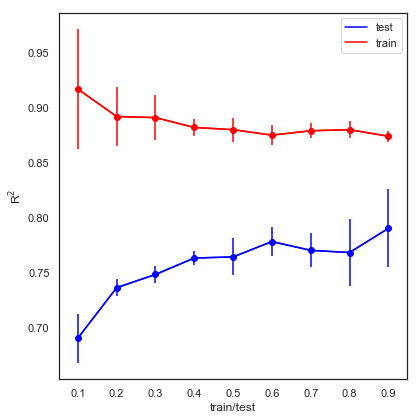

In [119]:
plot_r2_gpr(avg_test_score=avg_test_score_red, std_test_score=std_test_score_red, avg_train_score=avg_train_score_red, std_train_score=std_train_score_red,filename="./Figures/r2_gpy_uncorr_red.png")

test average RMSE=[0.09 0.09 0.09 0.08 0.08 0.08 0.08 0.08 0.08], STD RMSE=[0.   0.   0.   0.   0.   0.   0.   0.01 0.  ]
train average RMSE=[0.04 0.05 0.05 0.06 0.06 0.06 0.06 0.06 0.06], STD RMSE=[0.02 0.01 0.   0.   0.   0.   0.   0.   0.  ]


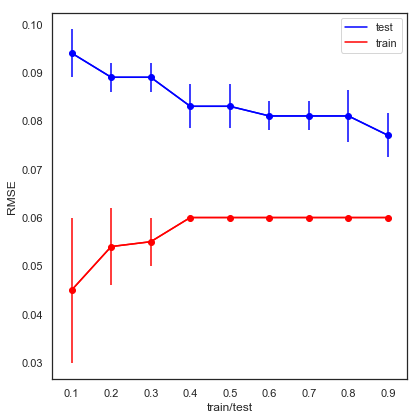

In [120]:
plot_rmse_gpr(avg_test_score=avg_test_score_red, std_test_score=std_test_score_red, avg_train_score=avg_train_score_red, std_train_score=std_train_score_red,filename="./Figures/rmse_gpy_uncorr_red.png")

test average MAE=[0.07 0.07 0.06 0.06 0.06 0.06 0.06 0.06 0.06], STD MAE=[0. 0. 0. 0. 0. 0. 0. 0. 0.]
train average MAE=[0.03 0.04 0.04 0.04 0.04 0.04 0.04 0.04 0.04], STD MAE=[0.01 0.01 0.   0.   0.   0.   0.   0.   0.  ]


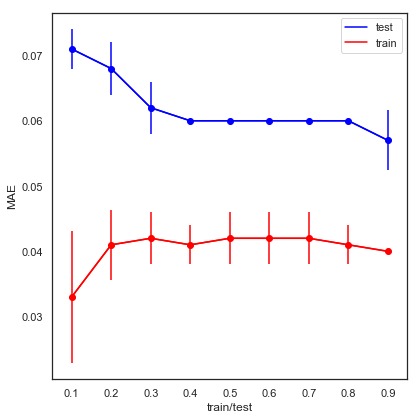

In [121]:
plot_mae_gpr(avg_test_score=avg_test_score_red, std_test_score=std_test_score_red, avg_train_score=avg_train_score_red, std_train_score=std_train_score_red,filename="./Figures/mae_gpy_uncorr_red.png")

Reduced

In [122]:
train_by_test,avg_train_score_red2, std_train_score_red2, avg_test_score_red2,std_test_score_red2=learn_train_by_test(X = Xdata_reduced,y = df_bznsn['Ered(V)'],n_PC=10)

----------- Start 1/9 ---------------------
----------- Repeat 1/10 ---------------------
returning scaled train and test data


C:\Users\jaina\Anaconda3\envs\myenv\lib\site-packages\gpytorch\models\exact_gp.py:275: GPInputWarning: The input matches the stored training data. Did you forget to call model.train()?
  GPInputWarning,


(test: R2 = 0.68, RMSE = 0.10, MAE = 0.07)
(train: R2 = 0.89, RMSE = 0.05, MAE = 0.04)
----------- Repeat 2/10 ---------------------
returning scaled train and test data


C:\Users\jaina\Anaconda3\envs\myenv\lib\site-packages\gpytorch\models\exact_gp.py:275: GPInputWarning: The input matches the stored training data. Did you forget to call model.train()?
  GPInputWarning,


(test: R2 = 0.72, RMSE = 0.09, MAE = 0.07)
(train: R2 = 0.89, RMSE = 0.06, MAE = 0.04)
----------- Repeat 3/10 ---------------------
returning scaled train and test data


C:\Users\jaina\Anaconda3\envs\myenv\lib\site-packages\gpytorch\models\exact_gp.py:275: GPInputWarning: The input matches the stored training data. Did you forget to call model.train()?
  GPInputWarning,


(test: R2 = 0.74, RMSE = 0.09, MAE = 0.07)
(train: R2 = 0.88, RMSE = 0.06, MAE = 0.05)
----------- Repeat 4/10 ---------------------
returning scaled train and test data


C:\Users\jaina\Anaconda3\envs\myenv\lib\site-packages\gpytorch\models\exact_gp.py:275: GPInputWarning: The input matches the stored training data. Did you forget to call model.train()?
  GPInputWarning,


(test: R2 = 0.71, RMSE = 0.09, MAE = 0.07)
(train: R2 = 0.90, RMSE = 0.05, MAE = 0.04)
----------- Repeat 5/10 ---------------------
returning scaled train and test data


C:\Users\jaina\Anaconda3\envs\myenv\lib\site-packages\gpytorch\models\exact_gp.py:275: GPInputWarning: The input matches the stored training data. Did you forget to call model.train()?
  GPInputWarning,


(test: R2 = 0.72, RMSE = 0.09, MAE = 0.07)
(train: R2 = 0.93, RMSE = 0.05, MAE = 0.04)
----------- Repeat 6/10 ---------------------
returning scaled train and test data


C:\Users\jaina\Anaconda3\envs\myenv\lib\site-packages\gpytorch\models\exact_gp.py:275: GPInputWarning: The input matches the stored training data. Did you forget to call model.train()?
  GPInputWarning,


(test: R2 = 0.72, RMSE = 0.09, MAE = 0.07)
(train: R2 = 0.90, RMSE = 0.06, MAE = 0.04)
----------- Repeat 7/10 ---------------------
returning scaled train and test data


C:\Users\jaina\Anaconda3\envs\myenv\lib\site-packages\gpytorch\models\exact_gp.py:275: GPInputWarning: The input matches the stored training data. Did you forget to call model.train()?
  GPInputWarning,


(test: R2 = 0.73, RMSE = 0.09, MAE = 0.07)
(train: R2 = 0.94, RMSE = 0.04, MAE = 0.03)
----------- Repeat 8/10 ---------------------
returning scaled train and test data


C:\Users\jaina\Anaconda3\envs\myenv\lib\site-packages\gpytorch\models\exact_gp.py:275: GPInputWarning: The input matches the stored training data. Did you forget to call model.train()?
  GPInputWarning,


(test: R2 = 0.73, RMSE = 0.09, MAE = 0.07)
(train: R2 = 0.93, RMSE = 0.05, MAE = 0.03)
----------- Repeat 9/10 ---------------------
returning scaled train and test data


C:\Users\jaina\Anaconda3\envs\myenv\lib\site-packages\gpytorch\models\exact_gp.py:275: GPInputWarning: The input matches the stored training data. Did you forget to call model.train()?
  GPInputWarning,


(test: R2 = 0.70, RMSE = 0.09, MAE = 0.07)
(train: R2 = 0.95, RMSE = 0.04, MAE = 0.03)
----------- Repeat 10/10 ---------------------
returning scaled train and test data


C:\Users\jaina\Anaconda3\envs\myenv\lib\site-packages\gpytorch\models\exact_gp.py:275: GPInputWarning: The input matches the stored training data. Did you forget to call model.train()?
  GPInputWarning,


(test: R2 = 0.72, RMSE = 0.09, MAE = 0.07)
(train: R2 = 0.87, RMSE = 0.06, MAE = 0.05)
----------- Start 2/9 ---------------------
----------- Repeat 1/10 ---------------------
returning scaled train and test data


C:\Users\jaina\Anaconda3\envs\myenv\lib\site-packages\gpytorch\models\exact_gp.py:275: GPInputWarning: The input matches the stored training data. Did you forget to call model.train()?
  GPInputWarning,


(test: R2 = 0.75, RMSE = 0.09, MAE = 0.06)
(train: R2 = 0.90, RMSE = 0.05, MAE = 0.04)
----------- Repeat 2/10 ---------------------
returning scaled train and test data


C:\Users\jaina\Anaconda3\envs\myenv\lib\site-packages\gpytorch\models\exact_gp.py:275: GPInputWarning: The input matches the stored training data. Did you forget to call model.train()?
  GPInputWarning,


(test: R2 = 0.74, RMSE = 0.09, MAE = 0.06)
(train: R2 = 0.90, RMSE = 0.06, MAE = 0.04)
----------- Repeat 3/10 ---------------------
returning scaled train and test data


C:\Users\jaina\Anaconda3\envs\myenv\lib\site-packages\gpytorch\models\exact_gp.py:275: GPInputWarning: The input matches the stored training data. Did you forget to call model.train()?
  GPInputWarning,


(test: R2 = 0.76, RMSE = 0.08, MAE = 0.06)
(train: R2 = 0.88, RMSE = 0.06, MAE = 0.05)
----------- Repeat 4/10 ---------------------
returning scaled train and test data


C:\Users\jaina\Anaconda3\envs\myenv\lib\site-packages\gpytorch\models\exact_gp.py:275: GPInputWarning: The input matches the stored training data. Did you forget to call model.train()?
  GPInputWarning,


(test: R2 = 0.76, RMSE = 0.09, MAE = 0.06)
(train: R2 = 0.90, RMSE = 0.05, MAE = 0.04)
----------- Repeat 5/10 ---------------------
returning scaled train and test data


C:\Users\jaina\Anaconda3\envs\myenv\lib\site-packages\gpytorch\models\exact_gp.py:275: GPInputWarning: The input matches the stored training data. Did you forget to call model.train()?
  GPInputWarning,


(test: R2 = 0.75, RMSE = 0.09, MAE = 0.06)
(train: R2 = 0.89, RMSE = 0.06, MAE = 0.04)
----------- Repeat 6/10 ---------------------
returning scaled train and test data


C:\Users\jaina\Anaconda3\envs\myenv\lib\site-packages\gpytorch\models\exact_gp.py:275: GPInputWarning: The input matches the stored training data. Did you forget to call model.train()?
  GPInputWarning,


(test: R2 = 0.76, RMSE = 0.08, MAE = 0.06)
(train: R2 = 0.88, RMSE = 0.06, MAE = 0.04)
----------- Repeat 7/10 ---------------------
returning scaled train and test data


C:\Users\jaina\Anaconda3\envs\myenv\lib\site-packages\gpytorch\models\exact_gp.py:275: GPInputWarning: The input matches the stored training data. Did you forget to call model.train()?
  GPInputWarning,


(test: R2 = 0.76, RMSE = 0.08, MAE = 0.06)
(train: R2 = 0.88, RMSE = 0.06, MAE = 0.04)
----------- Repeat 8/10 ---------------------
returning scaled train and test data


C:\Users\jaina\Anaconda3\envs\myenv\lib\site-packages\gpytorch\models\exact_gp.py:275: GPInputWarning: The input matches the stored training data. Did you forget to call model.train()?
  GPInputWarning,


(test: R2 = 0.76, RMSE = 0.08, MAE = 0.06)
(train: R2 = 0.89, RMSE = 0.06, MAE = 0.04)
----------- Repeat 9/10 ---------------------
returning scaled train and test data


C:\Users\jaina\Anaconda3\envs\myenv\lib\site-packages\gpytorch\models\exact_gp.py:275: GPInputWarning: The input matches the stored training data. Did you forget to call model.train()?
  GPInputWarning,


(test: R2 = 0.76, RMSE = 0.08, MAE = 0.06)
(train: R2 = 0.87, RMSE = 0.06, MAE = 0.04)
----------- Repeat 10/10 ---------------------
returning scaled train and test data


C:\Users\jaina\Anaconda3\envs\myenv\lib\site-packages\gpytorch\models\exact_gp.py:275: GPInputWarning: The input matches the stored training data. Did you forget to call model.train()?
  GPInputWarning,


(test: R2 = 0.76, RMSE = 0.09, MAE = 0.06)
(train: R2 = 0.86, RMSE = 0.06, MAE = 0.05)
----------- Start 3/9 ---------------------
----------- Repeat 1/10 ---------------------
returning scaled train and test data


C:\Users\jaina\Anaconda3\envs\myenv\lib\site-packages\gpytorch\models\exact_gp.py:275: GPInputWarning: The input matches the stored training data. Did you forget to call model.train()?
  GPInputWarning,


(test: R2 = 0.75, RMSE = 0.08, MAE = 0.06)
(train: R2 = 0.88, RMSE = 0.06, MAE = 0.05)
----------- Repeat 2/10 ---------------------
returning scaled train and test data


C:\Users\jaina\Anaconda3\envs\myenv\lib\site-packages\gpytorch\models\exact_gp.py:275: GPInputWarning: The input matches the stored training data. Did you forget to call model.train()?
  GPInputWarning,


(test: R2 = 0.77, RMSE = 0.08, MAE = 0.06)
(train: R2 = 0.85, RMSE = 0.07, MAE = 0.05)
----------- Repeat 3/10 ---------------------
returning scaled train and test data


C:\Users\jaina\Anaconda3\envs\myenv\lib\site-packages\gpytorch\models\exact_gp.py:275: GPInputWarning: The input matches the stored training data. Did you forget to call model.train()?
  GPInputWarning,


(test: R2 = 0.78, RMSE = 0.08, MAE = 0.06)
(train: R2 = 0.86, RMSE = 0.06, MAE = 0.05)
----------- Repeat 4/10 ---------------------
returning scaled train and test data


C:\Users\jaina\Anaconda3\envs\myenv\lib\site-packages\gpytorch\models\exact_gp.py:275: GPInputWarning: The input matches the stored training data. Did you forget to call model.train()?
  GPInputWarning,


(test: R2 = 0.76, RMSE = 0.08, MAE = 0.06)
(train: R2 = 0.90, RMSE = 0.06, MAE = 0.04)
----------- Repeat 5/10 ---------------------
returning scaled train and test data


C:\Users\jaina\Anaconda3\envs\myenv\lib\site-packages\gpytorch\models\exact_gp.py:275: GPInputWarning: The input matches the stored training data. Did you forget to call model.train()?
  GPInputWarning,


(test: R2 = 0.77, RMSE = 0.08, MAE = 0.06)
(train: R2 = 0.86, RMSE = 0.06, MAE = 0.05)
----------- Repeat 6/10 ---------------------
returning scaled train and test data


C:\Users\jaina\Anaconda3\envs\myenv\lib\site-packages\gpytorch\models\exact_gp.py:275: GPInputWarning: The input matches the stored training data. Did you forget to call model.train()?
  GPInputWarning,


(test: R2 = 0.77, RMSE = 0.08, MAE = 0.06)
(train: R2 = 0.86, RMSE = 0.07, MAE = 0.05)
----------- Repeat 7/10 ---------------------
returning scaled train and test data


C:\Users\jaina\Anaconda3\envs\myenv\lib\site-packages\gpytorch\models\exact_gp.py:275: GPInputWarning: The input matches the stored training data. Did you forget to call model.train()?
  GPInputWarning,


(test: R2 = 0.76, RMSE = 0.08, MAE = 0.06)
(train: R2 = 0.89, RMSE = 0.06, MAE = 0.04)
----------- Repeat 8/10 ---------------------
returning scaled train and test data


C:\Users\jaina\Anaconda3\envs\myenv\lib\site-packages\gpytorch\models\exact_gp.py:275: GPInputWarning: The input matches the stored training data. Did you forget to call model.train()?
  GPInputWarning,


(test: R2 = 0.77, RMSE = 0.08, MAE = 0.06)
(train: R2 = 0.86, RMSE = 0.07, MAE = 0.05)
----------- Repeat 9/10 ---------------------
returning scaled train and test data


C:\Users\jaina\Anaconda3\envs\myenv\lib\site-packages\gpytorch\models\exact_gp.py:275: GPInputWarning: The input matches the stored training data. Did you forget to call model.train()?
  GPInputWarning,


(test: R2 = 0.76, RMSE = 0.08, MAE = 0.06)
(train: R2 = 0.86, RMSE = 0.06, MAE = 0.05)
----------- Repeat 10/10 ---------------------
returning scaled train and test data


C:\Users\jaina\Anaconda3\envs\myenv\lib\site-packages\gpytorch\models\exact_gp.py:275: GPInputWarning: The input matches the stored training data. Did you forget to call model.train()?
  GPInputWarning,


(test: R2 = 0.76, RMSE = 0.08, MAE = 0.06)
(train: R2 = 0.87, RMSE = 0.06, MAE = 0.05)
----------- Start 4/9 ---------------------
----------- Repeat 1/10 ---------------------
returning scaled train and test data


C:\Users\jaina\Anaconda3\envs\myenv\lib\site-packages\gpytorch\models\exact_gp.py:275: GPInputWarning: The input matches the stored training data. Did you forget to call model.train()?
  GPInputWarning,


(test: R2 = 0.77, RMSE = 0.08, MAE = 0.06)
(train: R2 = 0.87, RMSE = 0.06, MAE = 0.04)
----------- Repeat 2/10 ---------------------
returning scaled train and test data


C:\Users\jaina\Anaconda3\envs\myenv\lib\site-packages\gpytorch\models\exact_gp.py:275: GPInputWarning: The input matches the stored training data. Did you forget to call model.train()?
  GPInputWarning,


(test: R2 = 0.77, RMSE = 0.08, MAE = 0.06)
(train: R2 = 0.87, RMSE = 0.06, MAE = 0.05)
----------- Repeat 3/10 ---------------------
returning scaled train and test data


C:\Users\jaina\Anaconda3\envs\myenv\lib\site-packages\gpytorch\models\exact_gp.py:275: GPInputWarning: The input matches the stored training data. Did you forget to call model.train()?
  GPInputWarning,


(test: R2 = 0.78, RMSE = 0.08, MAE = 0.06)
(train: R2 = 0.88, RMSE = 0.06, MAE = 0.04)
----------- Repeat 4/10 ---------------------
returning scaled train and test data


C:\Users\jaina\Anaconda3\envs\myenv\lib\site-packages\gpytorch\models\exact_gp.py:275: GPInputWarning: The input matches the stored training data. Did you forget to call model.train()?
  GPInputWarning,


(test: R2 = 0.78, RMSE = 0.08, MAE = 0.06)
(train: R2 = 0.86, RMSE = 0.06, MAE = 0.05)
----------- Repeat 5/10 ---------------------
returning scaled train and test data


C:\Users\jaina\Anaconda3\envs\myenv\lib\site-packages\gpytorch\models\exact_gp.py:275: GPInputWarning: The input matches the stored training data. Did you forget to call model.train()?
  GPInputWarning,


(test: R2 = 0.78, RMSE = 0.08, MAE = 0.06)
(train: R2 = 0.87, RMSE = 0.06, MAE = 0.04)
----------- Repeat 6/10 ---------------------
returning scaled train and test data


C:\Users\jaina\Anaconda3\envs\myenv\lib\site-packages\gpytorch\models\exact_gp.py:275: GPInputWarning: The input matches the stored training data. Did you forget to call model.train()?
  GPInputWarning,


(test: R2 = 0.77, RMSE = 0.08, MAE = 0.06)
(train: R2 = 0.86, RMSE = 0.06, MAE = 0.05)
----------- Repeat 7/10 ---------------------
returning scaled train and test data


C:\Users\jaina\Anaconda3\envs\myenv\lib\site-packages\gpytorch\models\exact_gp.py:275: GPInputWarning: The input matches the stored training data. Did you forget to call model.train()?
  GPInputWarning,


(test: R2 = 0.76, RMSE = 0.08, MAE = 0.06)
(train: R2 = 0.89, RMSE = 0.06, MAE = 0.04)
----------- Repeat 8/10 ---------------------
returning scaled train and test data


C:\Users\jaina\Anaconda3\envs\myenv\lib\site-packages\gpytorch\models\exact_gp.py:275: GPInputWarning: The input matches the stored training data. Did you forget to call model.train()?
  GPInputWarning,


(test: R2 = 0.77, RMSE = 0.08, MAE = 0.06)
(train: R2 = 0.86, RMSE = 0.06, MAE = 0.05)
----------- Repeat 9/10 ---------------------
returning scaled train and test data


C:\Users\jaina\Anaconda3\envs\myenv\lib\site-packages\gpytorch\models\exact_gp.py:275: GPInputWarning: The input matches the stored training data. Did you forget to call model.train()?
  GPInputWarning,


(test: R2 = 0.79, RMSE = 0.08, MAE = 0.06)
(train: R2 = 0.85, RMSE = 0.07, MAE = 0.05)
----------- Repeat 10/10 ---------------------
returning scaled train and test data


C:\Users\jaina\Anaconda3\envs\myenv\lib\site-packages\gpytorch\models\exact_gp.py:275: GPInputWarning: The input matches the stored training data. Did you forget to call model.train()?
  GPInputWarning,


(test: R2 = 0.79, RMSE = 0.08, MAE = 0.06)
(train: R2 = 0.86, RMSE = 0.06, MAE = 0.05)
----------- Start 5/9 ---------------------
----------- Repeat 1/10 ---------------------
returning scaled train and test data


C:\Users\jaina\Anaconda3\envs\myenv\lib\site-packages\gpytorch\models\exact_gp.py:275: GPInputWarning: The input matches the stored training data. Did you forget to call model.train()?
  GPInputWarning,


(test: R2 = 0.77, RMSE = 0.08, MAE = 0.06)
(train: R2 = 0.87, RMSE = 0.06, MAE = 0.05)
----------- Repeat 2/10 ---------------------
returning scaled train and test data


C:\Users\jaina\Anaconda3\envs\myenv\lib\site-packages\gpytorch\models\exact_gp.py:275: GPInputWarning: The input matches the stored training data. Did you forget to call model.train()?
  GPInputWarning,


(test: R2 = 0.79, RMSE = 0.08, MAE = 0.06)
(train: R2 = 0.85, RMSE = 0.06, MAE = 0.05)
----------- Repeat 3/10 ---------------------
returning scaled train and test data


C:\Users\jaina\Anaconda3\envs\myenv\lib\site-packages\gpytorch\models\exact_gp.py:275: GPInputWarning: The input matches the stored training data. Did you forget to call model.train()?
  GPInputWarning,


(test: R2 = 0.77, RMSE = 0.08, MAE = 0.06)
(train: R2 = 0.88, RMSE = 0.06, MAE = 0.04)
----------- Repeat 4/10 ---------------------
returning scaled train and test data


C:\Users\jaina\Anaconda3\envs\myenv\lib\site-packages\gpytorch\models\exact_gp.py:275: GPInputWarning: The input matches the stored training data. Did you forget to call model.train()?
  GPInputWarning,


(test: R2 = 0.78, RMSE = 0.08, MAE = 0.06)
(train: R2 = 0.87, RMSE = 0.06, MAE = 0.04)
----------- Repeat 5/10 ---------------------
returning scaled train and test data


C:\Users\jaina\Anaconda3\envs\myenv\lib\site-packages\gpytorch\models\exact_gp.py:275: GPInputWarning: The input matches the stored training data. Did you forget to call model.train()?
  GPInputWarning,


(test: R2 = 0.78, RMSE = 0.08, MAE = 0.06)
(train: R2 = 0.86, RMSE = 0.06, MAE = 0.05)
----------- Repeat 6/10 ---------------------
returning scaled train and test data


C:\Users\jaina\Anaconda3\envs\myenv\lib\site-packages\gpytorch\models\exact_gp.py:275: GPInputWarning: The input matches the stored training data. Did you forget to call model.train()?
  GPInputWarning,


(test: R2 = 0.79, RMSE = 0.08, MAE = 0.06)
(train: R2 = 0.85, RMSE = 0.06, MAE = 0.05)
----------- Repeat 7/10 ---------------------
returning scaled train and test data


C:\Users\jaina\Anaconda3\envs\myenv\lib\site-packages\gpytorch\models\exact_gp.py:275: GPInputWarning: The input matches the stored training data. Did you forget to call model.train()?
  GPInputWarning,


(test: R2 = 0.79, RMSE = 0.08, MAE = 0.06)
(train: R2 = 0.86, RMSE = 0.06, MAE = 0.05)
----------- Repeat 8/10 ---------------------
returning scaled train and test data


C:\Users\jaina\Anaconda3\envs\myenv\lib\site-packages\gpytorch\models\exact_gp.py:275: GPInputWarning: The input matches the stored training data. Did you forget to call model.train()?
  GPInputWarning,


(test: R2 = 0.78, RMSE = 0.08, MAE = 0.06)
(train: R2 = 0.87, RMSE = 0.06, MAE = 0.05)
----------- Repeat 9/10 ---------------------
returning scaled train and test data


C:\Users\jaina\Anaconda3\envs\myenv\lib\site-packages\gpytorch\models\exact_gp.py:275: GPInputWarning: The input matches the stored training data. Did you forget to call model.train()?
  GPInputWarning,


(test: R2 = 0.76, RMSE = 0.08, MAE = 0.06)
(train: R2 = 0.88, RMSE = 0.06, MAE = 0.04)
----------- Repeat 10/10 ---------------------
returning scaled train and test data


C:\Users\jaina\Anaconda3\envs\myenv\lib\site-packages\gpytorch\models\exact_gp.py:275: GPInputWarning: The input matches the stored training data. Did you forget to call model.train()?
  GPInputWarning,


(test: R2 = 0.78, RMSE = 0.08, MAE = 0.06)
(train: R2 = 0.87, RMSE = 0.06, MAE = 0.04)
----------- Start 6/9 ---------------------
----------- Repeat 1/10 ---------------------
returning scaled train and test data


C:\Users\jaina\Anaconda3\envs\myenv\lib\site-packages\gpytorch\models\exact_gp.py:275: GPInputWarning: The input matches the stored training data. Did you forget to call model.train()?
  GPInputWarning,


(test: R2 = 0.77, RMSE = 0.08, MAE = 0.06)
(train: R2 = 0.88, RMSE = 0.06, MAE = 0.04)
----------- Repeat 2/10 ---------------------
returning scaled train and test data


C:\Users\jaina\Anaconda3\envs\myenv\lib\site-packages\gpytorch\models\exact_gp.py:275: GPInputWarning: The input matches the stored training data. Did you forget to call model.train()?
  GPInputWarning,


(test: R2 = 0.79, RMSE = 0.08, MAE = 0.06)
(train: R2 = 0.87, RMSE = 0.06, MAE = 0.05)
----------- Repeat 3/10 ---------------------
returning scaled train and test data


C:\Users\jaina\Anaconda3\envs\myenv\lib\site-packages\gpytorch\models\exact_gp.py:275: GPInputWarning: The input matches the stored training data. Did you forget to call model.train()?
  GPInputWarning,


(test: R2 = 0.78, RMSE = 0.08, MAE = 0.06)
(train: R2 = 0.86, RMSE = 0.06, MAE = 0.05)
----------- Repeat 4/10 ---------------------
returning scaled train and test data


C:\Users\jaina\Anaconda3\envs\myenv\lib\site-packages\gpytorch\models\exact_gp.py:275: GPInputWarning: The input matches the stored training data. Did you forget to call model.train()?
  GPInputWarning,


(test: R2 = 0.79, RMSE = 0.08, MAE = 0.06)
(train: R2 = 0.86, RMSE = 0.06, MAE = 0.05)
----------- Repeat 5/10 ---------------------
returning scaled train and test data


C:\Users\jaina\Anaconda3\envs\myenv\lib\site-packages\gpytorch\models\exact_gp.py:275: GPInputWarning: The input matches the stored training data. Did you forget to call model.train()?
  GPInputWarning,


(test: R2 = 0.77, RMSE = 0.08, MAE = 0.06)
(train: R2 = 0.88, RMSE = 0.06, MAE = 0.04)
----------- Repeat 6/10 ---------------------
returning scaled train and test data


C:\Users\jaina\Anaconda3\envs\myenv\lib\site-packages\gpytorch\models\exact_gp.py:275: GPInputWarning: The input matches the stored training data. Did you forget to call model.train()?
  GPInputWarning,


(test: R2 = 0.76, RMSE = 0.08, MAE = 0.06)
(train: R2 = 0.88, RMSE = 0.06, MAE = 0.04)
----------- Repeat 7/10 ---------------------
returning scaled train and test data


C:\Users\jaina\Anaconda3\envs\myenv\lib\site-packages\gpytorch\models\exact_gp.py:275: GPInputWarning: The input matches the stored training data. Did you forget to call model.train()?
  GPInputWarning,


(test: R2 = 0.79, RMSE = 0.08, MAE = 0.06)
(train: R2 = 0.86, RMSE = 0.06, MAE = 0.05)
----------- Repeat 8/10 ---------------------
returning scaled train and test data


C:\Users\jaina\Anaconda3\envs\myenv\lib\site-packages\gpytorch\models\exact_gp.py:275: GPInputWarning: The input matches the stored training data. Did you forget to call model.train()?
  GPInputWarning,


(test: R2 = 0.79, RMSE = 0.08, MAE = 0.06)
(train: R2 = 0.86, RMSE = 0.06, MAE = 0.05)
----------- Repeat 9/10 ---------------------
returning scaled train and test data


C:\Users\jaina\Anaconda3\envs\myenv\lib\site-packages\gpytorch\models\exact_gp.py:275: GPInputWarning: The input matches the stored training data. Did you forget to call model.train()?
  GPInputWarning,


(test: R2 = 0.76, RMSE = 0.08, MAE = 0.06)
(train: R2 = 0.87, RMSE = 0.06, MAE = 0.05)
----------- Repeat 10/10 ---------------------
returning scaled train and test data


C:\Users\jaina\Anaconda3\envs\myenv\lib\site-packages\gpytorch\models\exact_gp.py:275: GPInputWarning: The input matches the stored training data. Did you forget to call model.train()?
  GPInputWarning,


(test: R2 = 0.78, RMSE = 0.08, MAE = 0.06)
(train: R2 = 0.87, RMSE = 0.06, MAE = 0.05)
----------- Start 7/9 ---------------------
----------- Repeat 1/10 ---------------------
returning scaled train and test data


C:\Users\jaina\Anaconda3\envs\myenv\lib\site-packages\gpytorch\models\exact_gp.py:275: GPInputWarning: The input matches the stored training data. Did you forget to call model.train()?
  GPInputWarning,


(test: R2 = 0.79, RMSE = 0.08, MAE = 0.06)
(train: R2 = 0.86, RMSE = 0.06, MAE = 0.05)
----------- Repeat 2/10 ---------------------
returning scaled train and test data


C:\Users\jaina\Anaconda3\envs\myenv\lib\site-packages\gpytorch\models\exact_gp.py:275: GPInputWarning: The input matches the stored training data. Did you forget to call model.train()?
  GPInputWarning,


(test: R2 = 0.80, RMSE = 0.08, MAE = 0.06)
(train: R2 = 0.86, RMSE = 0.06, MAE = 0.05)
----------- Repeat 3/10 ---------------------
returning scaled train and test data


C:\Users\jaina\Anaconda3\envs\myenv\lib\site-packages\gpytorch\models\exact_gp.py:275: GPInputWarning: The input matches the stored training data. Did you forget to call model.train()?
  GPInputWarning,


(test: R2 = 0.78, RMSE = 0.08, MAE = 0.06)
(train: R2 = 0.87, RMSE = 0.06, MAE = 0.05)
----------- Repeat 4/10 ---------------------
returning scaled train and test data


C:\Users\jaina\Anaconda3\envs\myenv\lib\site-packages\gpytorch\models\exact_gp.py:275: GPInputWarning: The input matches the stored training data. Did you forget to call model.train()?
  GPInputWarning,


(test: R2 = 0.79, RMSE = 0.08, MAE = 0.06)
(train: R2 = 0.87, RMSE = 0.06, MAE = 0.05)
----------- Repeat 5/10 ---------------------
returning scaled train and test data


C:\Users\jaina\Anaconda3\envs\myenv\lib\site-packages\gpytorch\models\exact_gp.py:275: GPInputWarning: The input matches the stored training data. Did you forget to call model.train()?
  GPInputWarning,


(test: R2 = 0.80, RMSE = 0.08, MAE = 0.05)
(train: R2 = 0.86, RMSE = 0.06, MAE = 0.05)
----------- Repeat 6/10 ---------------------
returning scaled train and test data


C:\Users\jaina\Anaconda3\envs\myenv\lib\site-packages\gpytorch\models\exact_gp.py:275: GPInputWarning: The input matches the stored training data. Did you forget to call model.train()?
  GPInputWarning,


(test: R2 = 0.77, RMSE = 0.08, MAE = 0.06)
(train: R2 = 0.87, RMSE = 0.06, MAE = 0.04)
----------- Repeat 7/10 ---------------------
returning scaled train and test data


C:\Users\jaina\Anaconda3\envs\myenv\lib\site-packages\gpytorch\models\exact_gp.py:275: GPInputWarning: The input matches the stored training data. Did you forget to call model.train()?
  GPInputWarning,


(test: R2 = 0.77, RMSE = 0.08, MAE = 0.06)
(train: R2 = 0.87, RMSE = 0.06, MAE = 0.05)
----------- Repeat 8/10 ---------------------
returning scaled train and test data


C:\Users\jaina\Anaconda3\envs\myenv\lib\site-packages\gpytorch\models\exact_gp.py:275: GPInputWarning: The input matches the stored training data. Did you forget to call model.train()?
  GPInputWarning,


(test: R2 = 0.74, RMSE = 0.08, MAE = 0.06)
(train: R2 = 0.87, RMSE = 0.06, MAE = 0.05)
----------- Repeat 9/10 ---------------------
returning scaled train and test data


C:\Users\jaina\Anaconda3\envs\myenv\lib\site-packages\gpytorch\models\exact_gp.py:275: GPInputWarning: The input matches the stored training data. Did you forget to call model.train()?
  GPInputWarning,


(test: R2 = 0.81, RMSE = 0.08, MAE = 0.06)
(train: R2 = 0.85, RMSE = 0.07, MAE = 0.05)
----------- Repeat 10/10 ---------------------
returning scaled train and test data


C:\Users\jaina\Anaconda3\envs\myenv\lib\site-packages\gpytorch\models\exact_gp.py:275: GPInputWarning: The input matches the stored training data. Did you forget to call model.train()?
  GPInputWarning,


(test: R2 = 0.80, RMSE = 0.08, MAE = 0.06)
(train: R2 = 0.87, RMSE = 0.06, MAE = 0.04)
----------- Start 8/9 ---------------------
----------- Repeat 1/10 ---------------------
returning scaled train and test data


C:\Users\jaina\Anaconda3\envs\myenv\lib\site-packages\gpytorch\models\exact_gp.py:275: GPInputWarning: The input matches the stored training data. Did you forget to call model.train()?
  GPInputWarning,


(test: R2 = 0.74, RMSE = 0.09, MAE = 0.06)
(train: R2 = 0.87, RMSE = 0.06, MAE = 0.05)
----------- Repeat 2/10 ---------------------
returning scaled train and test data


C:\Users\jaina\Anaconda3\envs\myenv\lib\site-packages\gpytorch\models\exact_gp.py:275: GPInputWarning: The input matches the stored training data. Did you forget to call model.train()?
  GPInputWarning,


(test: R2 = 0.80, RMSE = 0.08, MAE = 0.06)
(train: R2 = 0.86, RMSE = 0.06, MAE = 0.05)
----------- Repeat 3/10 ---------------------
returning scaled train and test data


C:\Users\jaina\Anaconda3\envs\myenv\lib\site-packages\gpytorch\models\exact_gp.py:275: GPInputWarning: The input matches the stored training data. Did you forget to call model.train()?
  GPInputWarning,


(test: R2 = 0.77, RMSE = 0.08, MAE = 0.06)
(train: R2 = 0.87, RMSE = 0.06, MAE = 0.04)
----------- Repeat 4/10 ---------------------
returning scaled train and test data


C:\Users\jaina\Anaconda3\envs\myenv\lib\site-packages\gpytorch\models\exact_gp.py:275: GPInputWarning: The input matches the stored training data. Did you forget to call model.train()?
  GPInputWarning,


(test: R2 = 0.77, RMSE = 0.08, MAE = 0.06)
(train: R2 = 0.87, RMSE = 0.06, MAE = 0.04)
----------- Repeat 5/10 ---------------------
returning scaled train and test data


C:\Users\jaina\Anaconda3\envs\myenv\lib\site-packages\gpytorch\models\exact_gp.py:275: GPInputWarning: The input matches the stored training data. Did you forget to call model.train()?
  GPInputWarning,


(test: R2 = 0.81, RMSE = 0.07, MAE = 0.05)
(train: R2 = 0.85, RMSE = 0.07, MAE = 0.05)
----------- Repeat 6/10 ---------------------
returning scaled train and test data


C:\Users\jaina\Anaconda3\envs\myenv\lib\site-packages\gpytorch\models\exact_gp.py:275: GPInputWarning: The input matches the stored training data. Did you forget to call model.train()?
  GPInputWarning,


(test: R2 = 0.78, RMSE = 0.07, MAE = 0.05)
(train: R2 = 0.86, RMSE = 0.06, MAE = 0.05)
----------- Repeat 7/10 ---------------------
returning scaled train and test data


C:\Users\jaina\Anaconda3\envs\myenv\lib\site-packages\gpytorch\models\exact_gp.py:275: GPInputWarning: The input matches the stored training data. Did you forget to call model.train()?
  GPInputWarning,


(test: R2 = 0.82, RMSE = 0.07, MAE = 0.05)
(train: R2 = 0.85, RMSE = 0.07, MAE = 0.05)
----------- Repeat 8/10 ---------------------
returning scaled train and test data


C:\Users\jaina\Anaconda3\envs\myenv\lib\site-packages\gpytorch\models\exact_gp.py:275: GPInputWarning: The input matches the stored training data. Did you forget to call model.train()?
  GPInputWarning,


(test: R2 = 0.78, RMSE = 0.08, MAE = 0.06)
(train: R2 = 0.87, RMSE = 0.06, MAE = 0.04)
----------- Repeat 9/10 ---------------------
returning scaled train and test data


C:\Users\jaina\Anaconda3\envs\myenv\lib\site-packages\gpytorch\models\exact_gp.py:275: GPInputWarning: The input matches the stored training data. Did you forget to call model.train()?
  GPInputWarning,


(test: R2 = 0.79, RMSE = 0.08, MAE = 0.06)
(train: R2 = 0.87, RMSE = 0.06, MAE = 0.05)
----------- Repeat 10/10 ---------------------
returning scaled train and test data


C:\Users\jaina\Anaconda3\envs\myenv\lib\site-packages\gpytorch\models\exact_gp.py:275: GPInputWarning: The input matches the stored training data. Did you forget to call model.train()?
  GPInputWarning,


(test: R2 = 0.83, RMSE = 0.08, MAE = 0.06)
(train: R2 = 0.85, RMSE = 0.07, MAE = 0.05)
----------- Start 9/9 ---------------------
----------- Repeat 1/10 ---------------------
returning scaled train and test data


C:\Users\jaina\Anaconda3\envs\myenv\lib\site-packages\gpytorch\models\exact_gp.py:275: GPInputWarning: The input matches the stored training data. Did you forget to call model.train()?
  GPInputWarning,


(test: R2 = 0.70, RMSE = 0.09, MAE = 0.07)
(train: R2 = 0.87, RMSE = 0.06, MAE = 0.05)
----------- Repeat 2/10 ---------------------
returning scaled train and test data


C:\Users\jaina\Anaconda3\envs\myenv\lib\site-packages\gpytorch\models\exact_gp.py:275: GPInputWarning: The input matches the stored training data. Did you forget to call model.train()?
  GPInputWarning,


(test: R2 = 0.79, RMSE = 0.08, MAE = 0.06)
(train: R2 = 0.86, RMSE = 0.06, MAE = 0.05)
----------- Repeat 3/10 ---------------------
returning scaled train and test data


C:\Users\jaina\Anaconda3\envs\myenv\lib\site-packages\gpytorch\models\exact_gp.py:275: GPInputWarning: The input matches the stored training data. Did you forget to call model.train()?
  GPInputWarning,


(test: R2 = 0.81, RMSE = 0.08, MAE = 0.06)
(train: R2 = 0.86, RMSE = 0.06, MAE = 0.05)
----------- Repeat 4/10 ---------------------
returning scaled train and test data


C:\Users\jaina\Anaconda3\envs\myenv\lib\site-packages\gpytorch\models\exact_gp.py:275: GPInputWarning: The input matches the stored training data. Did you forget to call model.train()?
  GPInputWarning,


(test: R2 = 0.73, RMSE = 0.09, MAE = 0.07)
(train: R2 = 0.87, RMSE = 0.06, MAE = 0.04)
----------- Repeat 5/10 ---------------------
returning scaled train and test data


C:\Users\jaina\Anaconda3\envs\myenv\lib\site-packages\gpytorch\models\exact_gp.py:275: GPInputWarning: The input matches the stored training data. Did you forget to call model.train()?
  GPInputWarning,


(test: R2 = 0.83, RMSE = 0.07, MAE = 0.05)
(train: R2 = 0.86, RMSE = 0.06, MAE = 0.05)
----------- Repeat 6/10 ---------------------
returning scaled train and test data


C:\Users\jaina\Anaconda3\envs\myenv\lib\site-packages\gpytorch\models\exact_gp.py:275: GPInputWarning: The input matches the stored training data. Did you forget to call model.train()?
  GPInputWarning,


(test: R2 = 0.78, RMSE = 0.08, MAE = 0.05)
(train: R2 = 0.87, RMSE = 0.06, MAE = 0.05)
----------- Repeat 7/10 ---------------------
returning scaled train and test data


C:\Users\jaina\Anaconda3\envs\myenv\lib\site-packages\gpytorch\models\exact_gp.py:275: GPInputWarning: The input matches the stored training data. Did you forget to call model.train()?
  GPInputWarning,


(test: R2 = 0.82, RMSE = 0.08, MAE = 0.05)
(train: R2 = 0.86, RMSE = 0.06, MAE = 0.05)
----------- Repeat 8/10 ---------------------
returning scaled train and test data


C:\Users\jaina\Anaconda3\envs\myenv\lib\site-packages\gpytorch\models\exact_gp.py:275: GPInputWarning: The input matches the stored training data. Did you forget to call model.train()?
  GPInputWarning,


(test: R2 = 0.81, RMSE = 0.07, MAE = 0.06)
(train: R2 = 0.86, RMSE = 0.06, MAE = 0.05)
----------- Repeat 9/10 ---------------------
returning scaled train and test data


C:\Users\jaina\Anaconda3\envs\myenv\lib\site-packages\gpytorch\models\exact_gp.py:275: GPInputWarning: The input matches the stored training data. Did you forget to call model.train()?
  GPInputWarning,


(test: R2 = 0.82, RMSE = 0.07, MAE = 0.05)
(train: R2 = 0.86, RMSE = 0.07, MAE = 0.05)
----------- Repeat 10/10 ---------------------
returning scaled train and test data
(test: R2 = 0.80, RMSE = 0.08, MAE = 0.06)
(train: R2 = 0.86, RMSE = 0.06, MAE = 0.05)


C:\Users\jaina\Anaconda3\envs\myenv\lib\site-packages\gpytorch\models\exact_gp.py:275: GPInputWarning: The input matches the stored training data. Did you forget to call model.train()?
  GPInputWarning,


test average R2=[0.72 0.76 0.76 0.78 0.78 0.78 0.78 0.79 0.79], STD R2=[0.02 0.01 0.01 0.01 0.01 0.01 0.02 0.03 0.04]
train average R2=[0.91 0.88 0.87 0.87 0.87 0.87 0.86 0.86 0.86], STD R2=[0.03 0.01 0.02 0.01 0.01 0.01 0.01 0.01 0.  ]


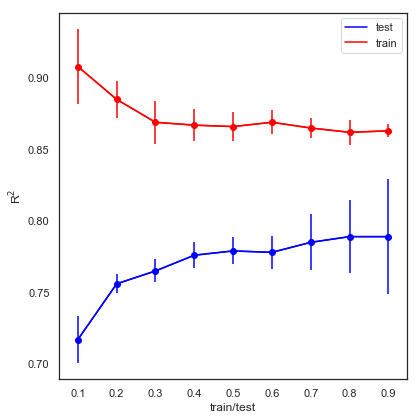

In [123]:
plot_r2_gpr(avg_test_score=avg_test_score_red2, std_test_score=std_test_score_red2, avg_train_score=avg_train_score_red2, std_train_score=std_train_score_red2,filename="./Figures/r2_gpy_reduced_red.png")

test average RMSE=[0.09 0.08 0.08 0.08 0.08 0.08 0.08 0.08 0.08], STD RMSE=[0.   0.   0.   0.   0.   0.   0.   0.01 0.01]
train average RMSE=[0.05 0.06 0.06 0.06 0.06 0.06 0.06 0.06 0.06], STD RMSE=[0.01 0.   0.   0.   0.   0.   0.   0.   0.  ]


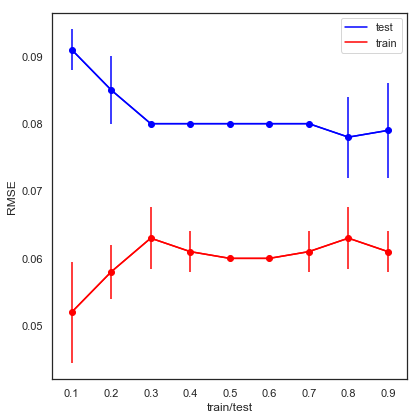

In [124]:
plot_rmse_gpr(avg_test_score=avg_test_score_red2, std_test_score=std_test_score_red2, avg_train_score=avg_train_score_red2, std_train_score=std_train_score_red2,filename="./Figures/rmse_gpy_reduced_red.png")

test average MAE=[0.07 0.06 0.06 0.06 0.06 0.06 0.06 0.06 0.06], STD MAE=[0.   0.   0.   0.   0.   0.   0.   0.   0.01]
train average MAE=[0.04 0.04 0.05 0.05 0.05 0.05 0.05 0.05 0.05], STD MAE=[0.01 0.   0.   0.   0.   0.   0.   0.   0.  ]


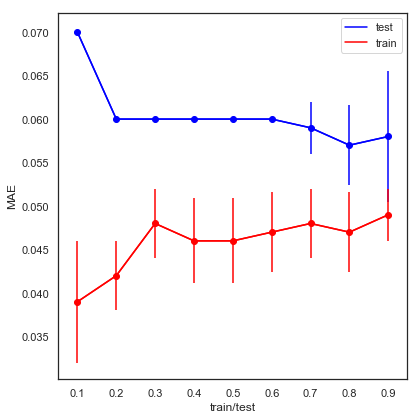

In [125]:
plot_mae_gpr(avg_test_score=avg_test_score_red2, std_test_score=std_test_score_red2, avg_train_score=avg_train_score_red2, std_train_score=std_train_score_red2,filename="./Figures/mae_gpy_reduced_red.png")

# Use 80% data for training and remaining 20% for test

*GyTorch GPR Model with Matern Kernel*

Xdata_bznsn_uncorr

In [145]:
X = Xdata_bznsn_uncorr
y = df_bznsn['Ered(V)']

train_by_test = [0.8]

avg_train_score = np.zeros([len(train_by_test),3])
avg_test_score = np.zeros([len(train_by_test),3])

std_train_score = np.zeros([len(train_by_test),3])
std_test_score = np.zeros([len(train_by_test),3])


for idx,tr_by_te in enumerate(train_by_test):

    repeat=1
    score_test = np.zeros([repeat,3])
    score_train = np.zeros([repeat,3])

    for  count in np.arange(repeat):

        X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=tr_by_te) 
        xtrain, xtest = np.array(X_train), np.array(X_test)
        ytrain, ytest = np.array(y_train), np.array(y_test)


        # scale data
        xtrain, xtest = do_scaling(scaler=StandardScaler(),xtrain=xtrain, xtest=xtest)
        # PCA
        n_PC = 18  # Set number of principle components
        pca = PCA(n_components=n_PC)
            
        xtrain = pca.fit_transform(xtrain) 
        xtest=pca.transform(xtest)

        model, likelihood = gpregression_pytorch(xtrain,ytrain,verbose=False)
        ypred_test, yerr_test = gprediction_pytorch(model,likelihood,xtest)
        ypred_train, yerr_train = gprediction_pytorch(model,likelihood,xtrain)

returning scaled train and test data


C:\Users\jaina\Anaconda3\envs\myenv\lib\site-packages\gpytorch\models\exact_gp.py:275: GPInputWarning: The input matches the stored training data. Did you forget to call model.train()?
  GPInputWarning,


In [146]:
def plot_Ered_gpr(y_true_train,y_pred_train,y_true_test,y_pred_test,y_pred_err_train=None,y_pred_err_test=None,err_bar=False,showfig=True,savefig=False,filename="gpr_pred.png",data=True):
    """
    Return r2,rmse and mae score if data = True
    Show image if showfig=True
    Save image if savefig=True
    """
    from matplotlib import pyplot as plt
    from sklearn.metrics import mean_squared_error as MSE
    from sklearn.metrics import r2_score
    from sklearn.metrics import mean_absolute_error as MAE
    
    mae_train = round(MAE(y_true_train,y_pred_train),2)
    r2_train = round(r2_score(y_true_train,y_pred_train),2)
    rmse_train = round(np.sqrt(MSE(y_true_train,y_pred_train)),2)

    mae_test = round(MAE(y_true_test,y_pred_test),2)
    r2_test = round(r2_score(y_true_test,y_pred_test),2)
    rmse_test = round(np.sqrt(MSE(y_true_test,y_pred_test)),2)

    print(f"(Train: R2 = %0.2f, RMSE = %0.2f, MAE = %0.2f)" %(r2_train,rmse_train,mae_train))    
    print(f"(Test:  R2 = %0.2f, RMSE = %0.2f, MAE = %0.2f)" %(r2_test,rmse_test,mae_test))    
    
    if showfig:
        plt.figure(figsize=(6, 6)) 
        # plt.scatter(y_true,y_pred,color=color,label=label)
        if err_bar*(y_pred_err_train is not None):
            plt.errorbar(y_true_train,y_pred_train,yerr=y_pred_err_train,color="red",fmt='o',label="Train")

        if err_bar*(y_pred_err_test is not None):
            plt.errorbar(y_true_test,y_pred_test,yerr=y_pred_err_test,color="blue",fmt='o',label="Test")

        plt.plot([0.72,2],[0.72,2],color='black')
        
        string="$R^2$ (train) ="+str(r2_train)
        plt.text(0.75,1.7,string)
        string="RMSE (train) ="+str(rmse_train)
        plt.text(0.75,1.65,string)
        
        string="$R^2$ (test) ="+str(r2_test)
        plt.text(0.75,1.60,string)
        string="RMSE (test)="+str(rmse_test)
        plt.text(0.75,1.55,string)
        plt.xlabel('DFT calculated values (V)')
        plt.ylabel('GPR Predicted values (V)')
        plt.xlim([0.7,2])
        plt.ylim([0.7,2])
        plt.yticks(np.arange(0.7,2,0.2))

        plt.xticks(np.arange(0.7,2,0.2))
        plt.legend(loc='lower right') #best
        plt.tight_layout()
        print("Train: min error =", round(y_pred_err_train.min(),2),"max_err", round(y_pred_err_train.max(),2))
        print("Test: min error =", round(y_pred_err_test.min(),2),"max_err", round(y_pred_err_test.max(),2))
        if savefig:
            plt.savefig(filename,dpi=300,bbox_inches='tight')
        plt.show()


    if data:
        return r2_test,rmse_test,mae_test,r2_train,rmse_train,mae_train

(Train: R2 = 0.87, RMSE = 0.06, MAE = 0.04)
(Test:  R2 = 0.80, RMSE = 0.08, MAE = 0.06)
Train: min error = 0.08 max_err 0.12
Test: min error = 0.08 max_err 0.12


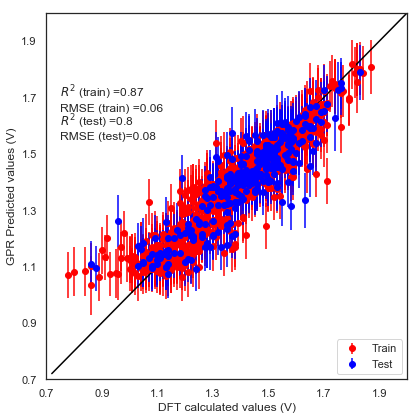

In [147]:
plot_Ered_gpr(y_true_train=ytrain,y_pred_train=ypred_train,y_true_test=y_test,y_pred_test=ypred_test,y_pred_err_train=yerr_train,y_pred_err_test=yerr_test,err_bar=True,showfig=True,savefig=True,filename="./Figures/Ered_predictions_bznsn_GPytorch_18PC_uncorr_feat.png",data=False)

In [148]:
X = Xdata_reduced
y = df_bznsn['Ered(V)']

train_by_test = [0.8]

avg_train_score = np.zeros([len(train_by_test),3])
avg_test_score = np.zeros([len(train_by_test),3])

std_train_score = np.zeros([len(train_by_test),3])
std_test_score = np.zeros([len(train_by_test),3])


for idx,tr_by_te in enumerate(train_by_test):

    repeat=1
    score_test = np.zeros([repeat,3])
    score_train = np.zeros([repeat,3])

    for  count in np.arange(repeat):

        X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=tr_by_te) 
        xtrain, xtest = np.array(X_train), np.array(X_test)
        ytrain, ytest = np.array(y_train), np.array(y_test)


        # scale data
        xtrain, xtest = do_scaling(scaler=StandardScaler(),xtrain=xtrain, xtest=xtest)
        # PCA
        n_PC = 10  # Set number of principle components
        pca = PCA(n_components=n_PC)
            
        xtrain = pca.fit_transform(xtrain) 
        xtest=pca.transform(xtest)

        model, likelihood = gpregression_pytorch(xtrain,ytrain,verbose=False)
        ypred_test, yerr_test = gprediction_pytorch(model,likelihood,xtest)
        ypred_train, yerr_train = gprediction_pytorch(model,likelihood,xtrain)

returning scaled train and test data


C:\Users\jaina\Anaconda3\envs\myenv\lib\site-packages\gpytorch\models\exact_gp.py:275: GPInputWarning: The input matches the stored training data. Did you forget to call model.train()?
  GPInputWarning,


(Train: R2 = 0.86, RMSE = 0.06, MAE = 0.05)
(Test:  R2 = 0.81, RMSE = 0.07, MAE = 0.05)
Train: min error = 0.08 max_err 0.11
Test: min error = 0.08 max_err 0.12


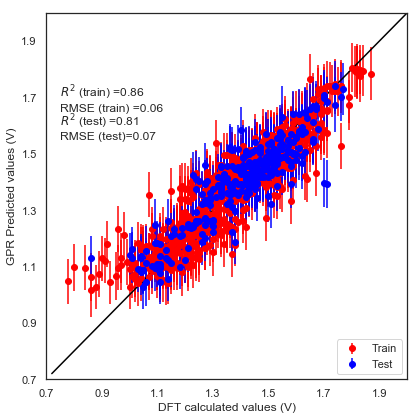

In [149]:
plot_Ered_gpr(y_true_train=ytrain,y_pred_train=ypred_train,y_true_test=y_test,y_pred_test=ypred_test,y_pred_err_train=yerr_train,y_pred_err_test=yerr_test,err_bar=True,showfig=True,savefig=True,filename="./Figures/Ered_predictions_bznsn_GPytorch_10PC_reduced_feat.png",data=False)